In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Loading some samples of data with label `3`

In [78]:
data = pd.read_csv('./train.csv/train.csv')

# load 100 images with label 3
data_3 = data[data['label'] == 3].iloc[:100]

# Computing K-Nearest Neighbors

In [79]:

def compute_k_nearest_neighbors(sample, new_sample, k):
    distances = np.zeros(len(sample)) 
   
    # computing the manhattan distance between the new sample and all the samples in the dataset
    for i in range(len(sample)):
        distances[i] = np.sum(np.abs(sample[i] - new_sample))
        
    # getting indices of the from k smallest distances array
    return np.argsort(distances)[:k]


# Producing synthetic data on the basis of the nearest neighbors and SMOTE algorithm

In [80]:

def populate_synthetic_data(sample, k, to_be_produced):
    num_samples = sample.shape[0]

    height = width = int(math.sqrt(sample.shape[1]))
    
    for i in range(num_samples):
        # computing the k nearest neighbors for each sample
        nearest_neighbours = compute_k_nearest_neighbors(sample, sample[i], k)
        
        fig, axs = plt.subplots(to_be_produced, 3, figsize=(8, to_be_produced * 4))

        for j in range(to_be_produced):
            
            # randomly select a nearest neighbor
            nearest_neighbour_index = np.random.randint(0, k)
            
            diff =  sample[nearest_neighbours[nearest_neighbour_index]] - sample[i] 
            gap = np.random.rand()
            synthetic_image = sample[nearest_neighbours[nearest_neighbour_index]] + (gap * diff)
            
            # Plot original image
            axs[j, 0].imshow(sample[i].reshape((height, width)), cmap='gray')
            axs[j, 0].set_title('Original Image')
            axs[j, 0].axis('off')

            # Plot nearest neighbor
            axs[j, 1].imshow(sample[nearest_neighbours[nearest_neighbour_index]].reshape((height, width)), cmap='gray')
            axs[j, 1].set_title('Nearest Neighbor Image')
            axs[j, 1].axis('off')

            # Plot synthetic image
            axs[j, 2].imshow(synthetic_image.reshape((height, width)),cmap='gray')
            axs[j, 2].set_title('Synthetic Image')
            axs[j, 2].axis('off')
        
        plt.tight_layout()
        plt.show()


# SMOTE

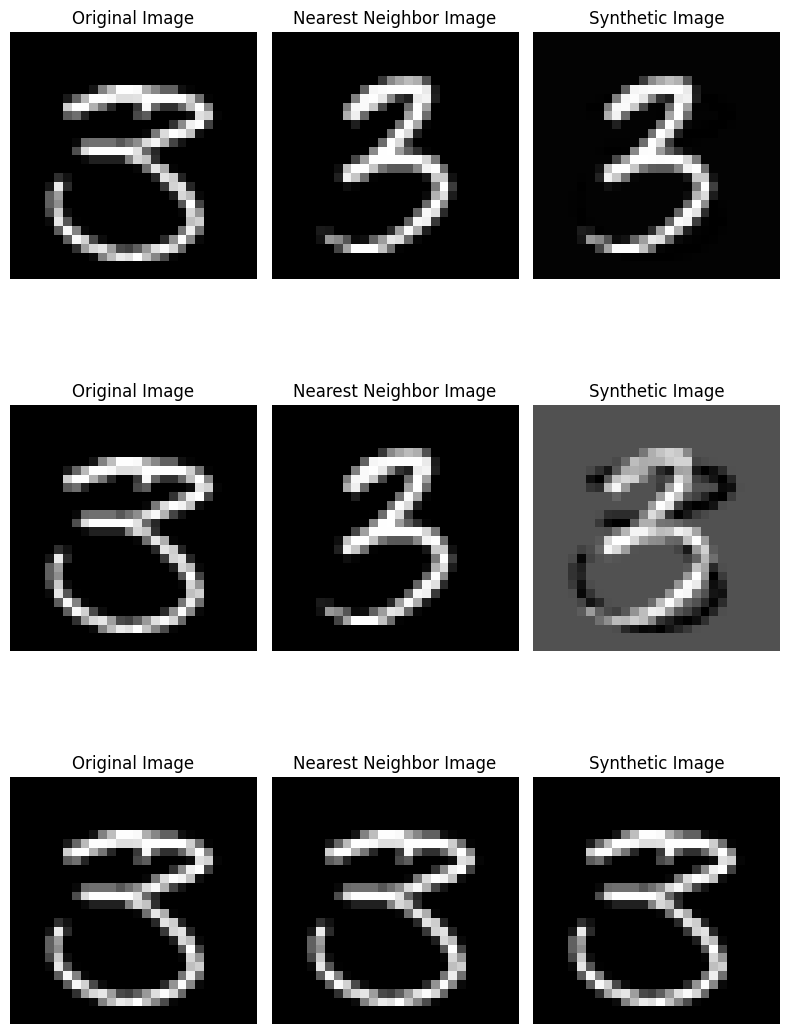

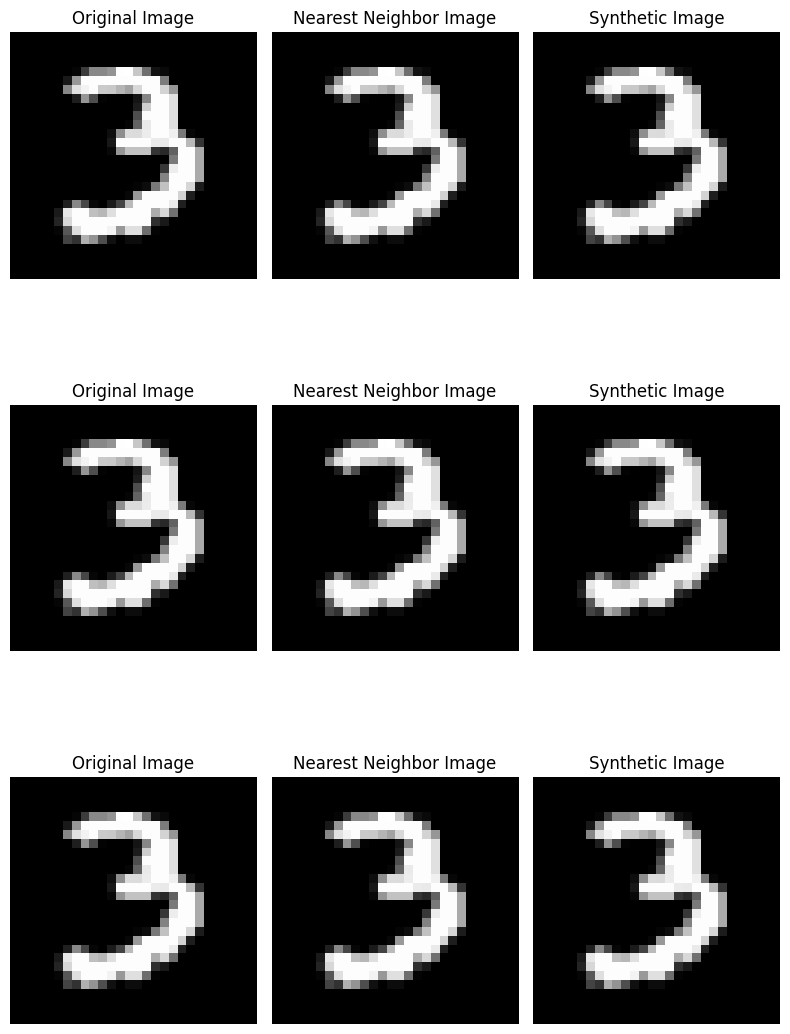

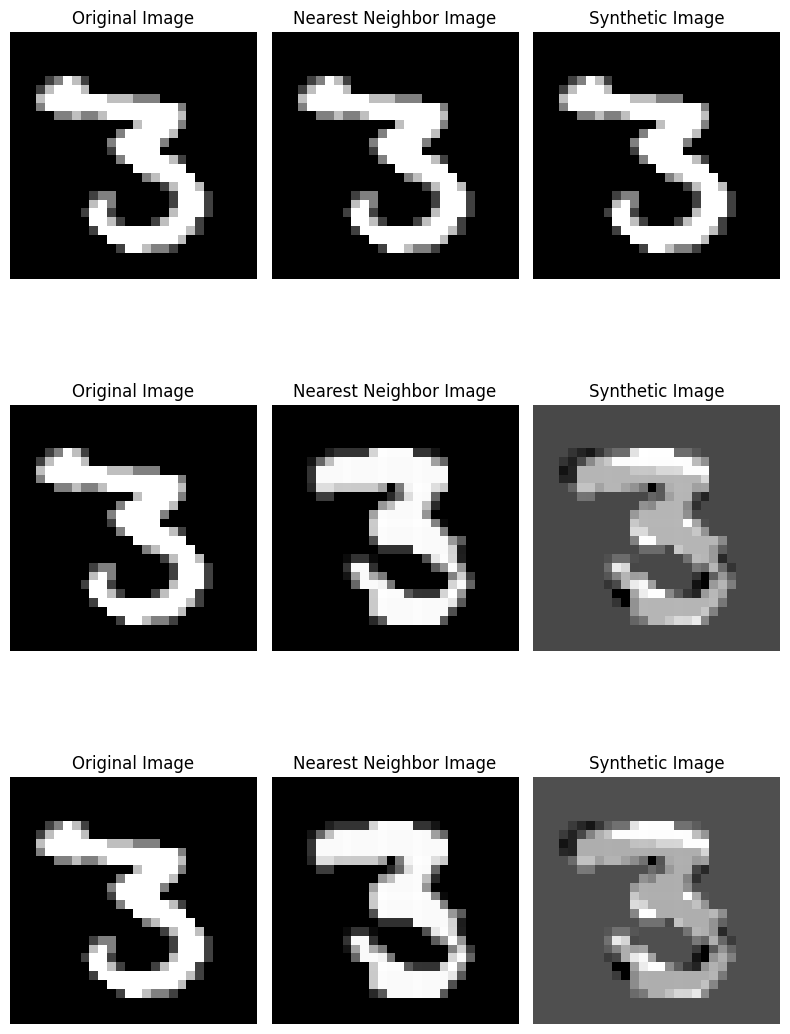

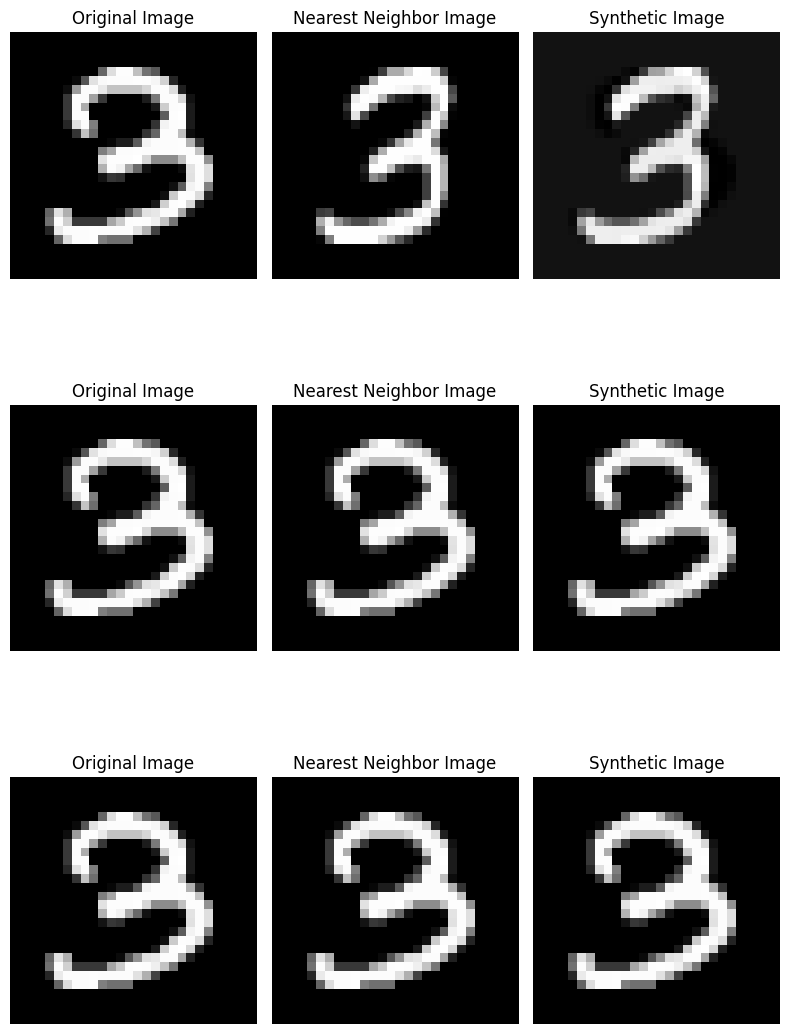

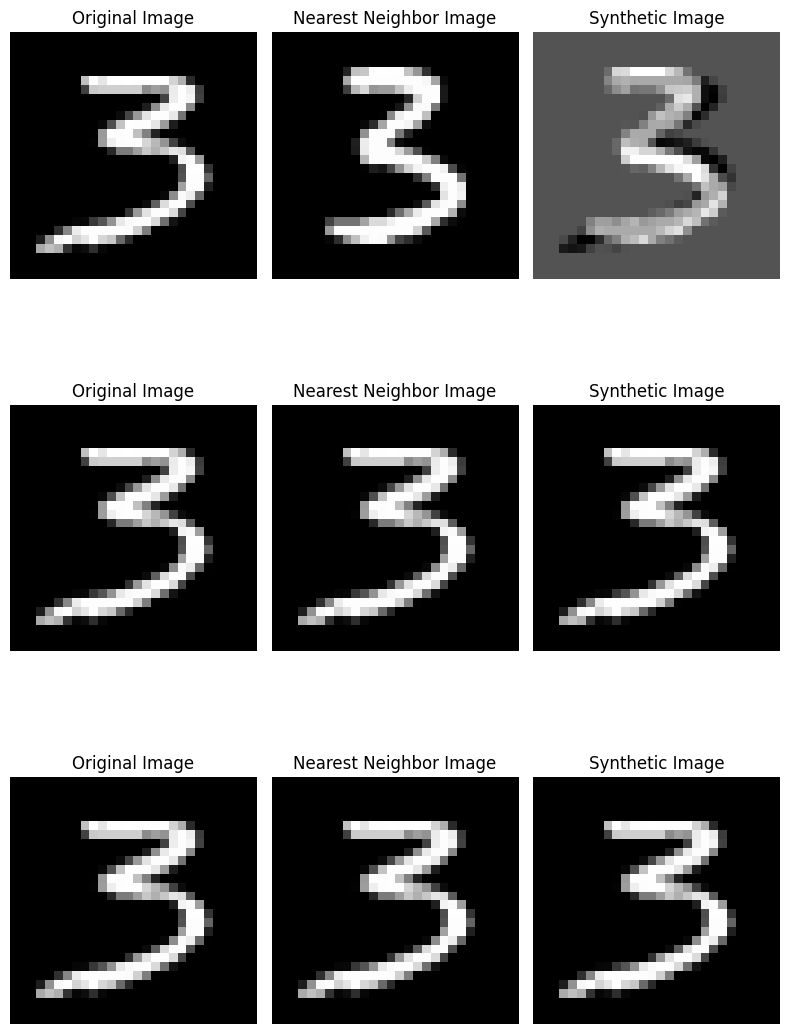

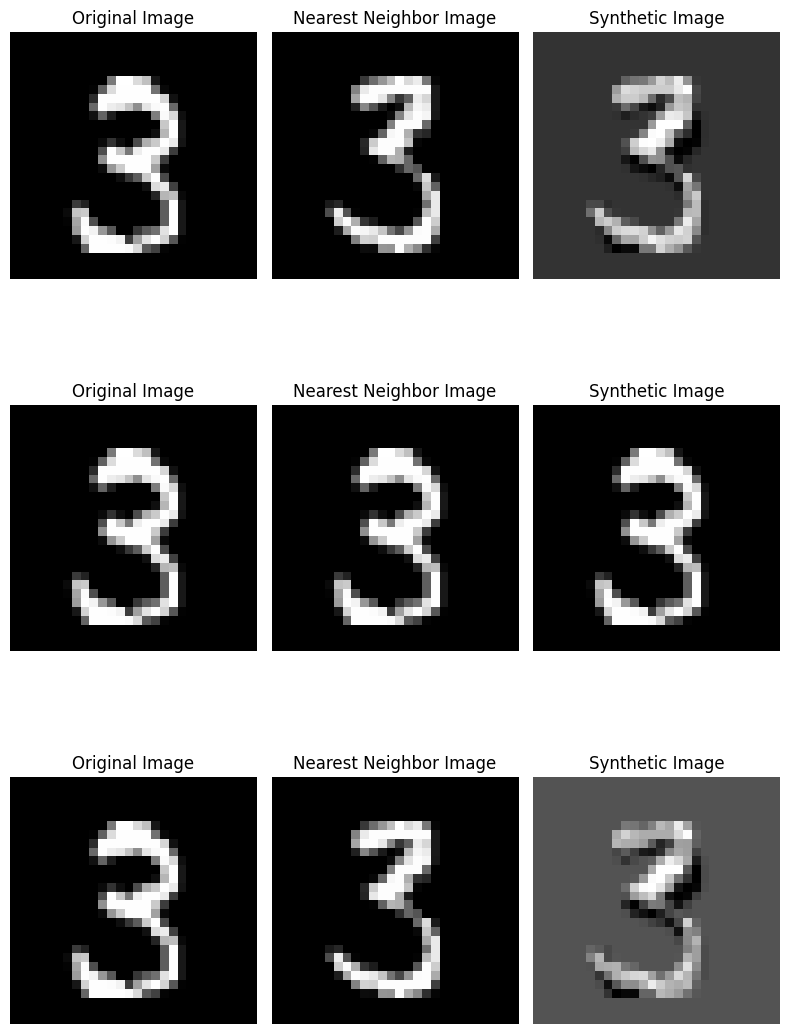

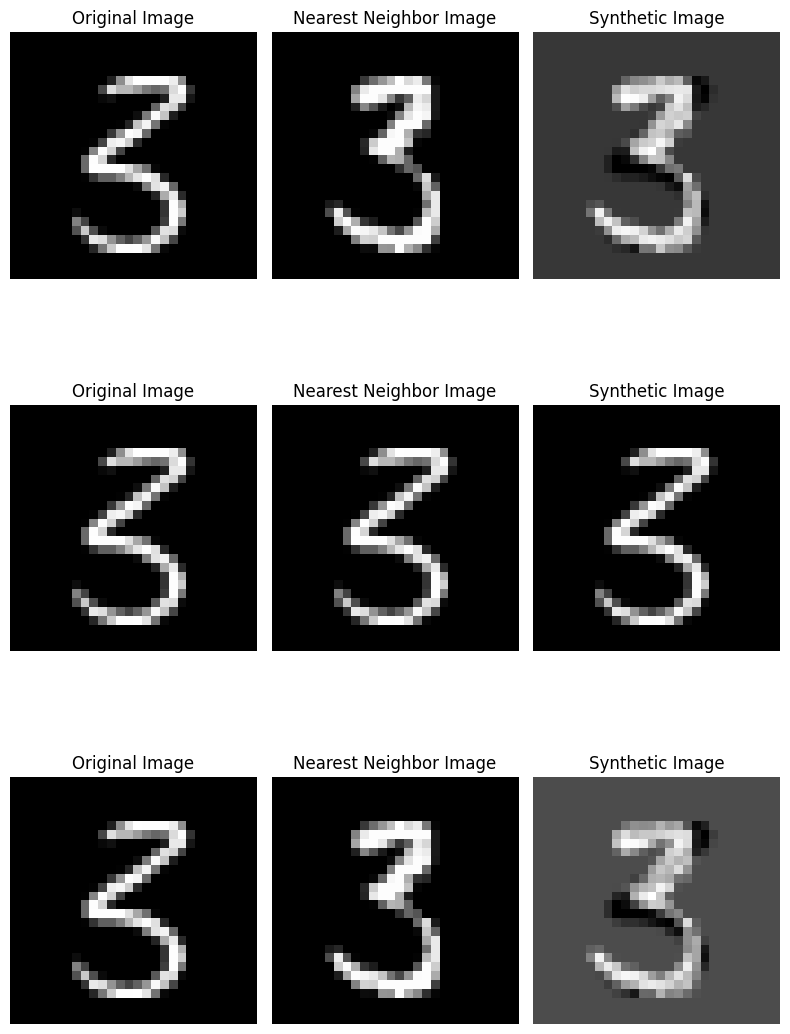

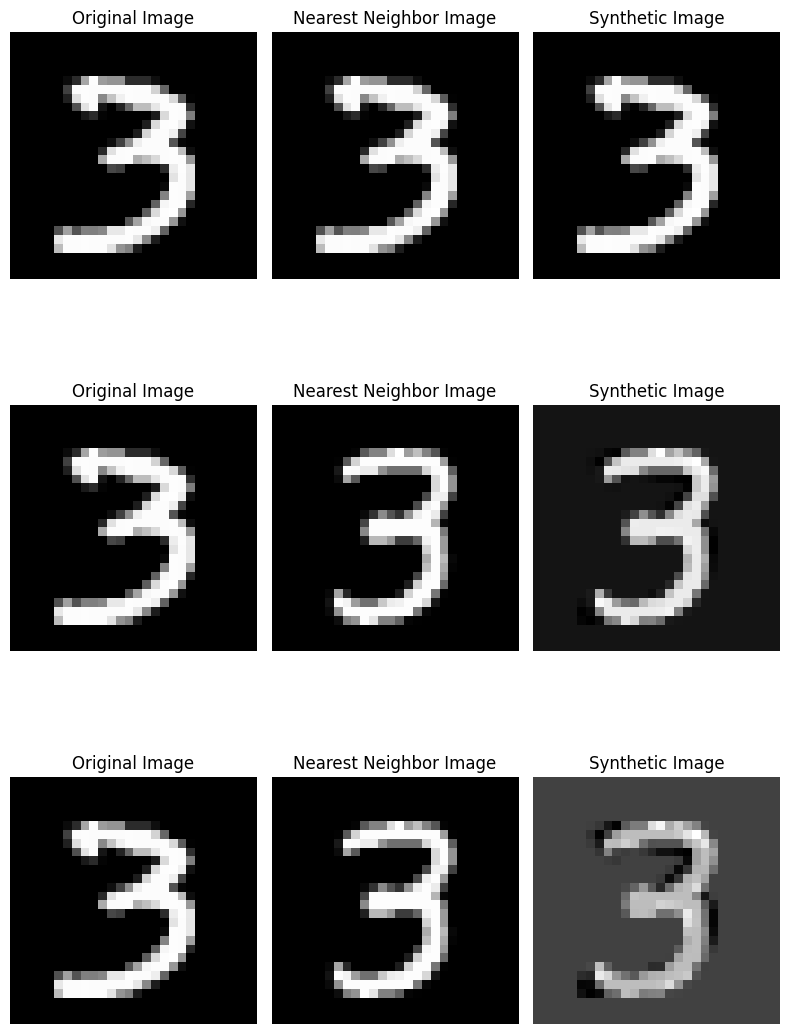

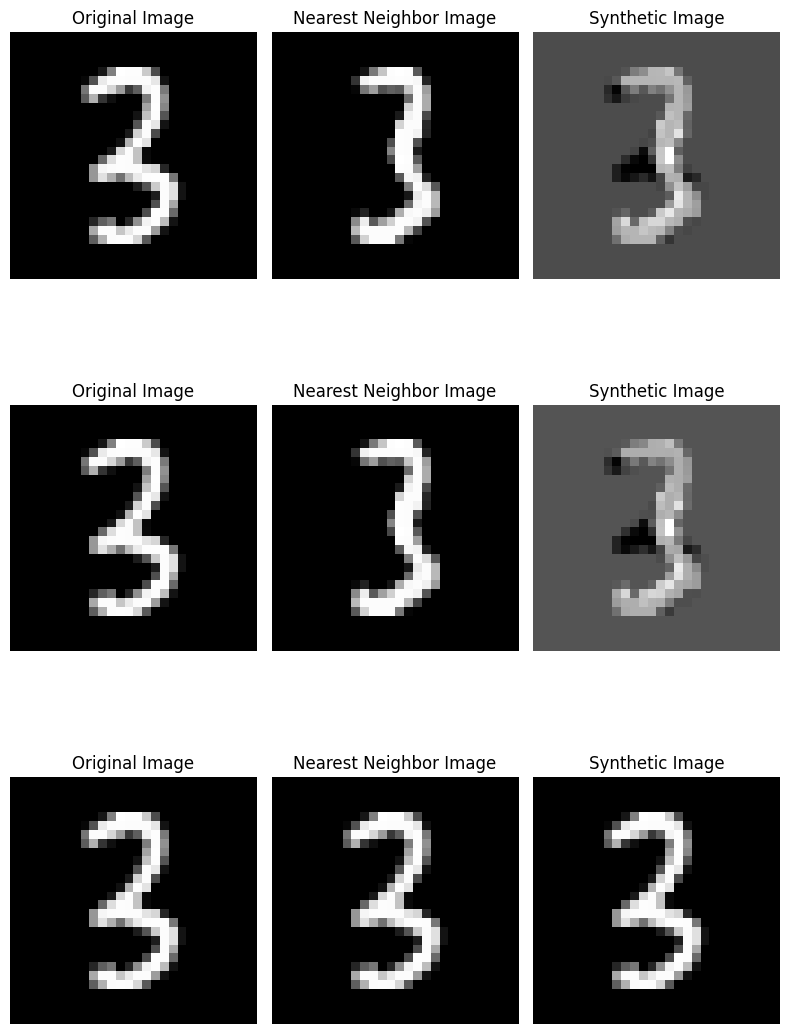

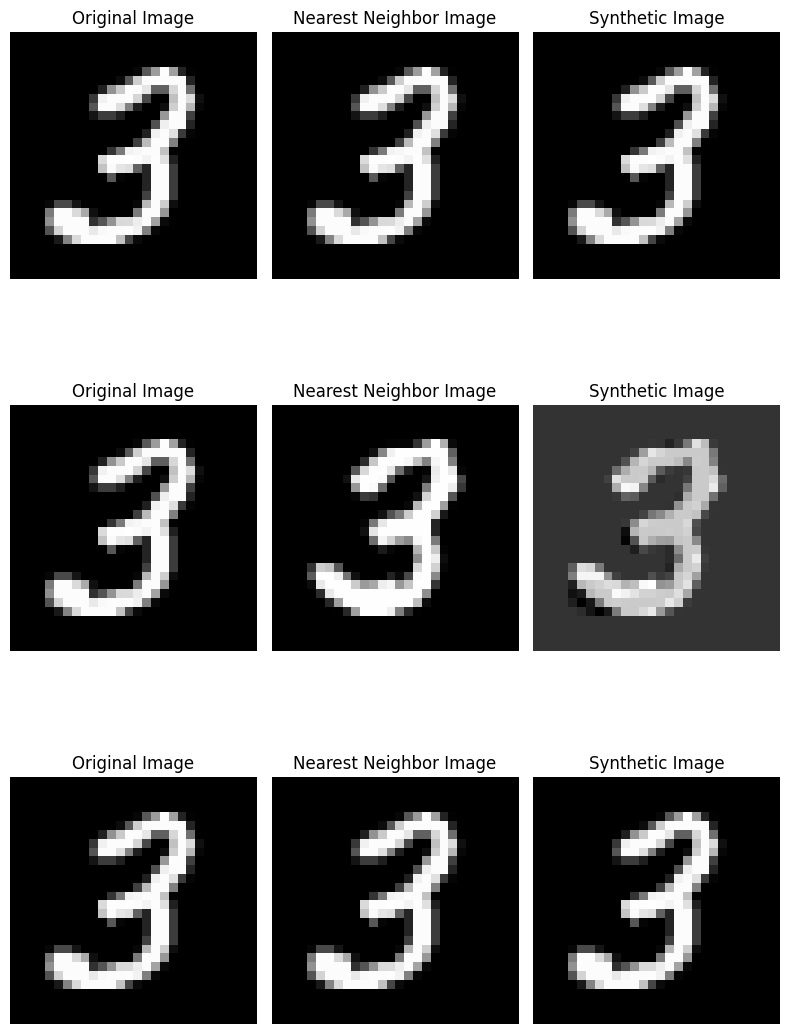

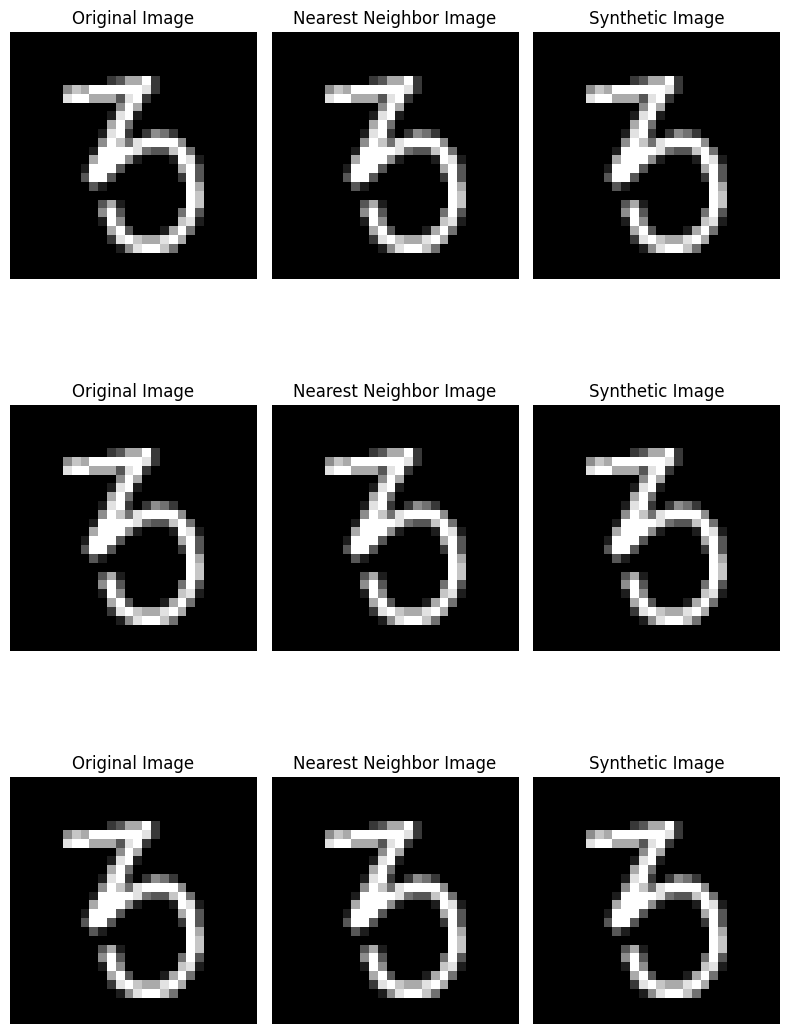

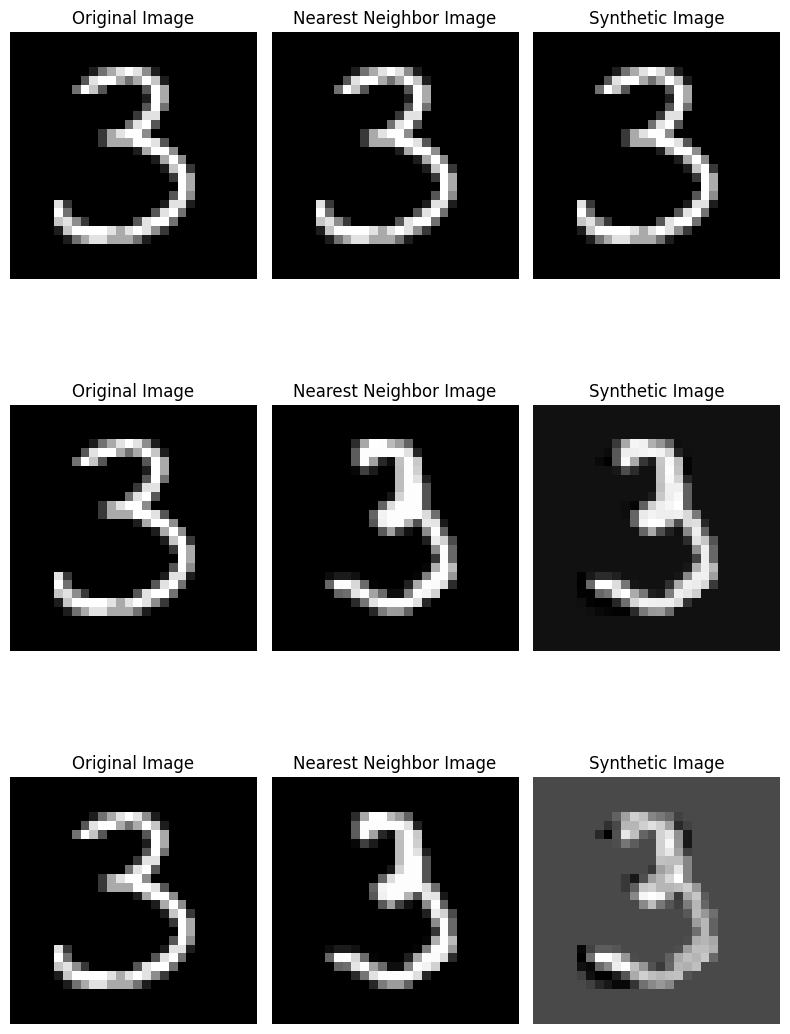

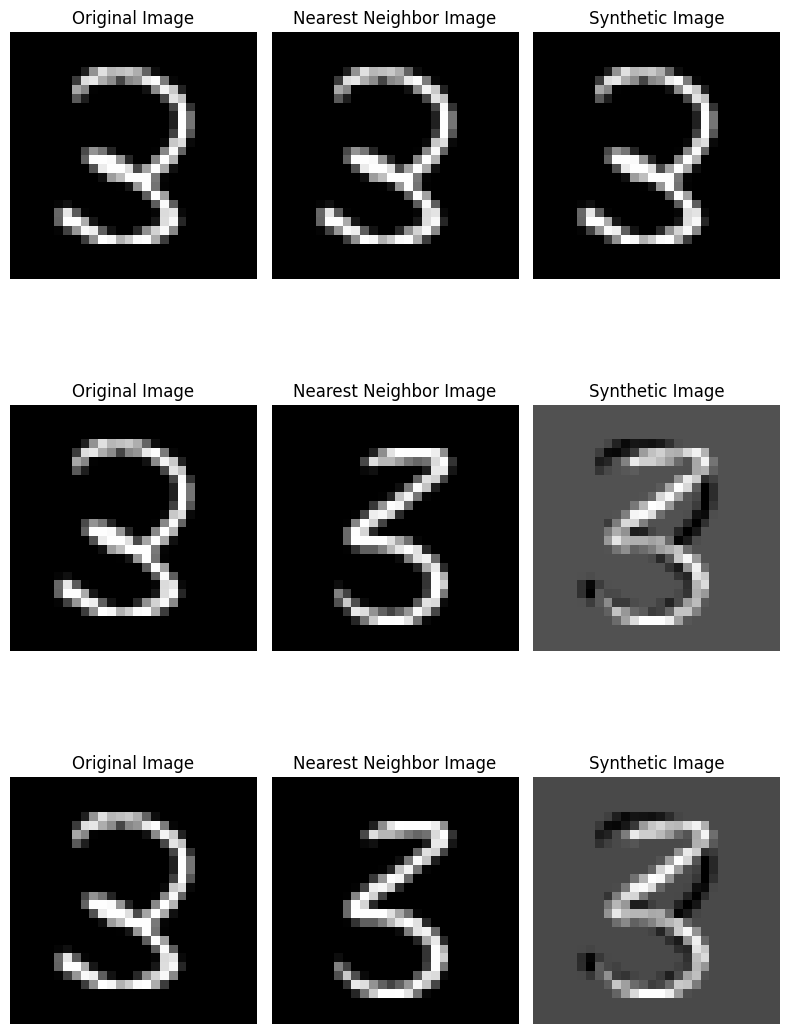

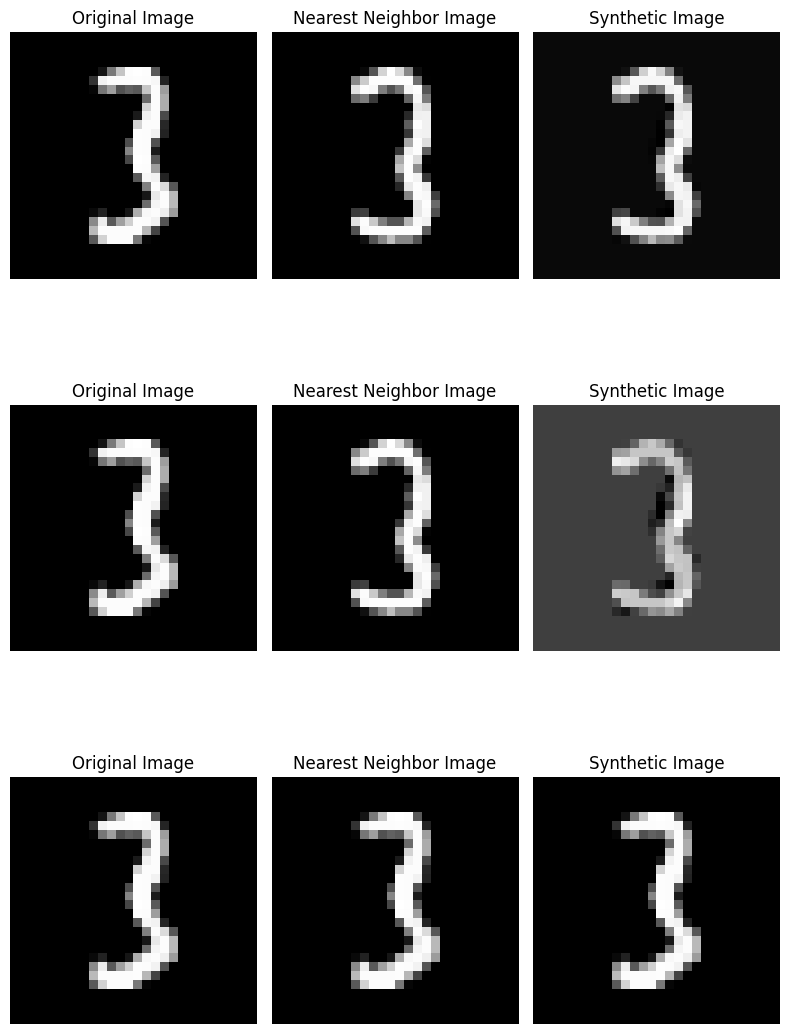

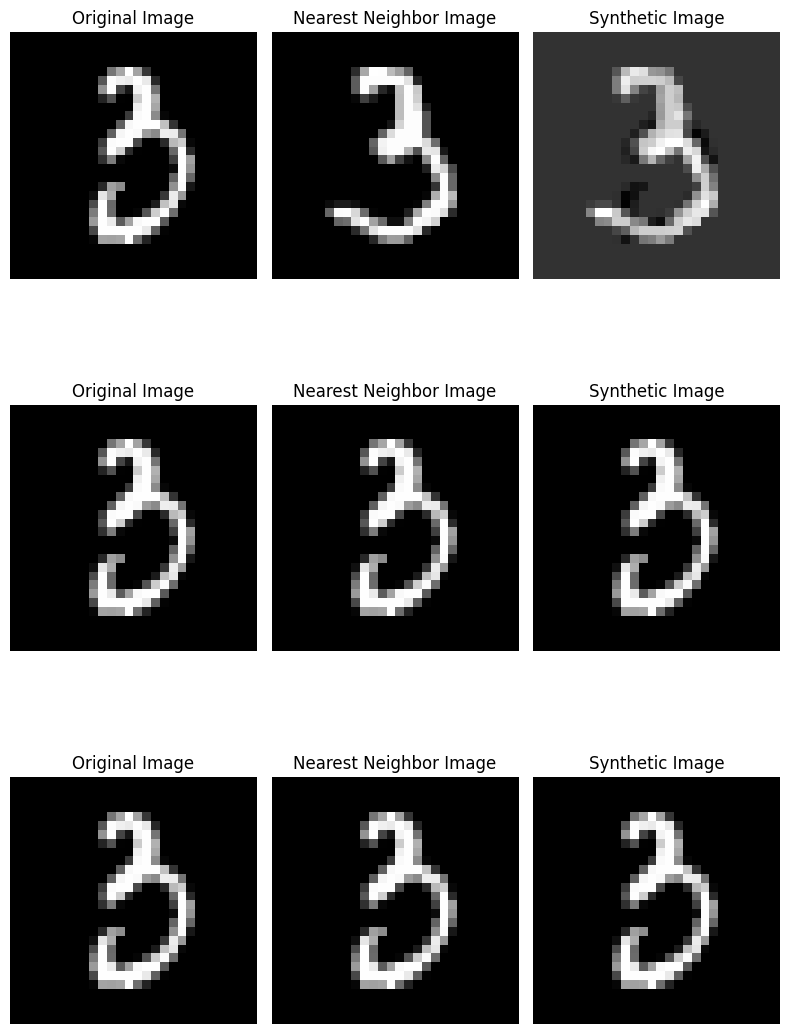

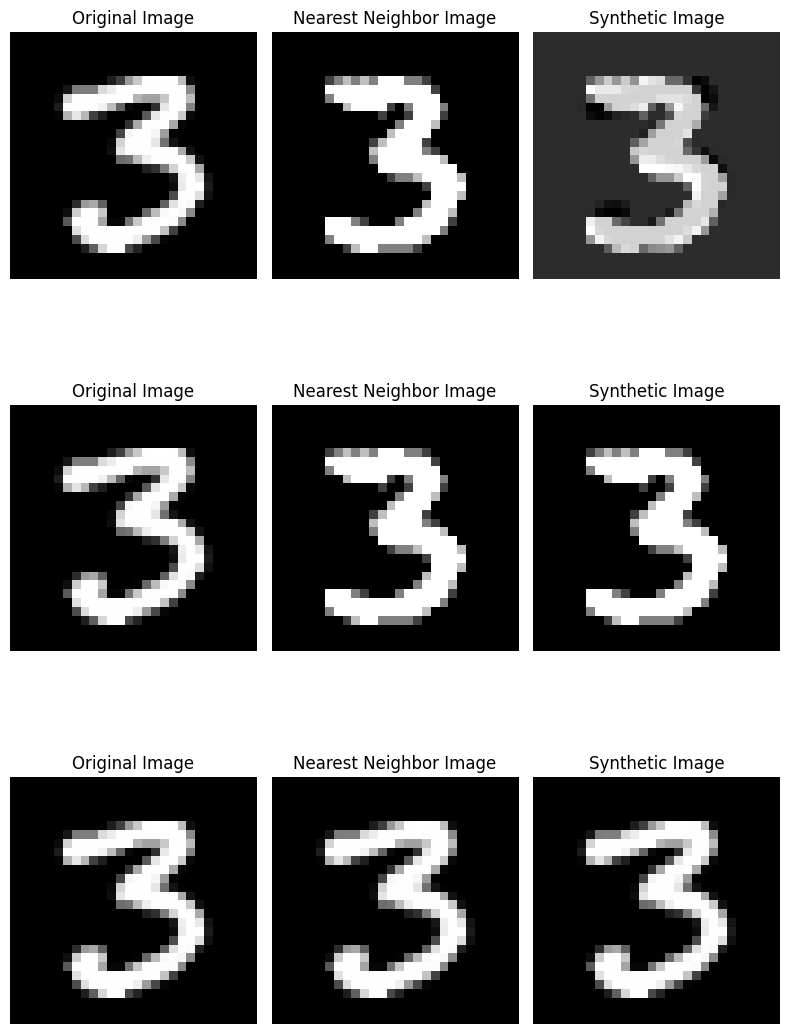

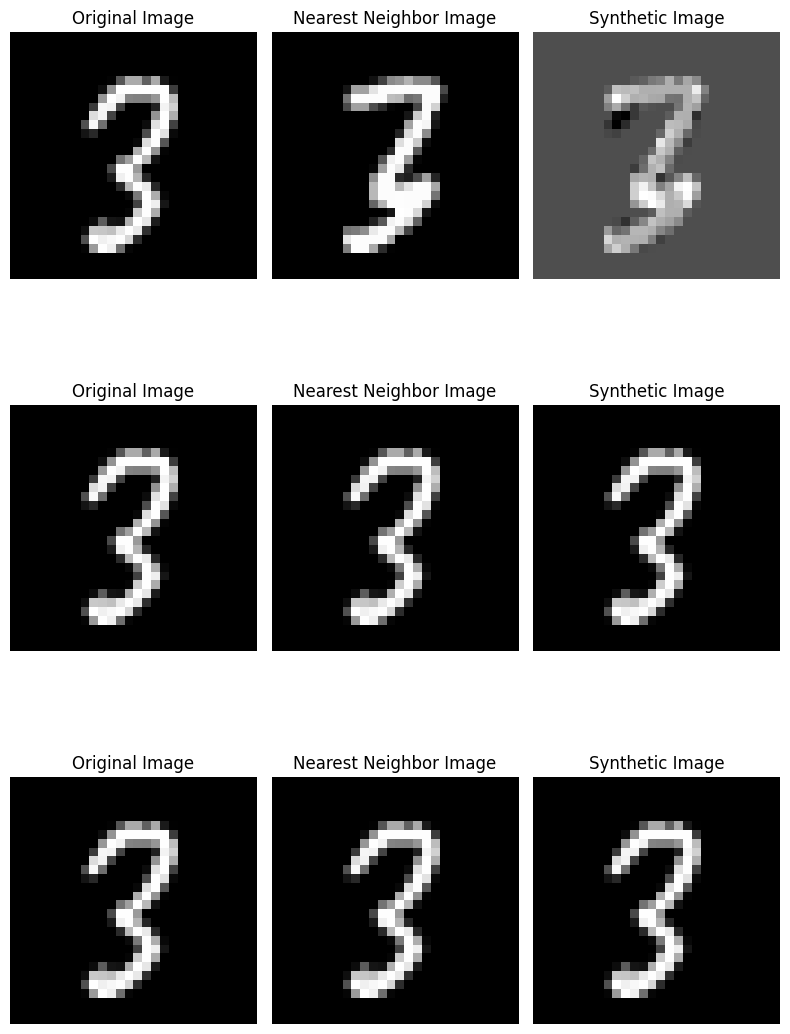

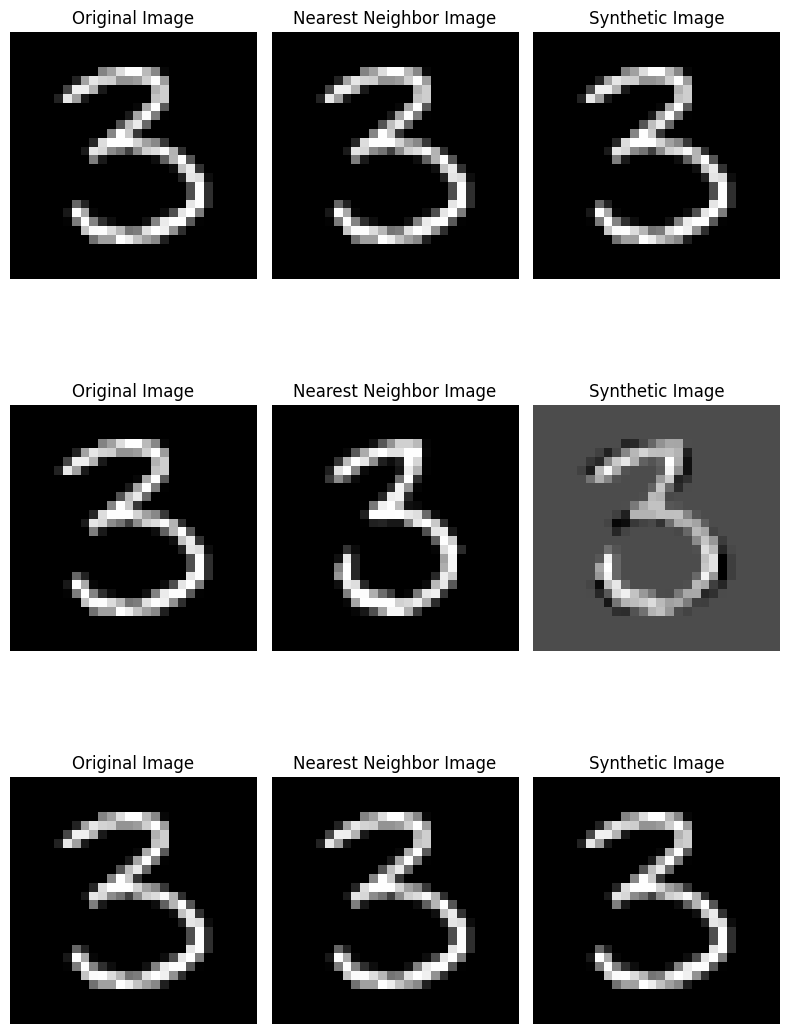

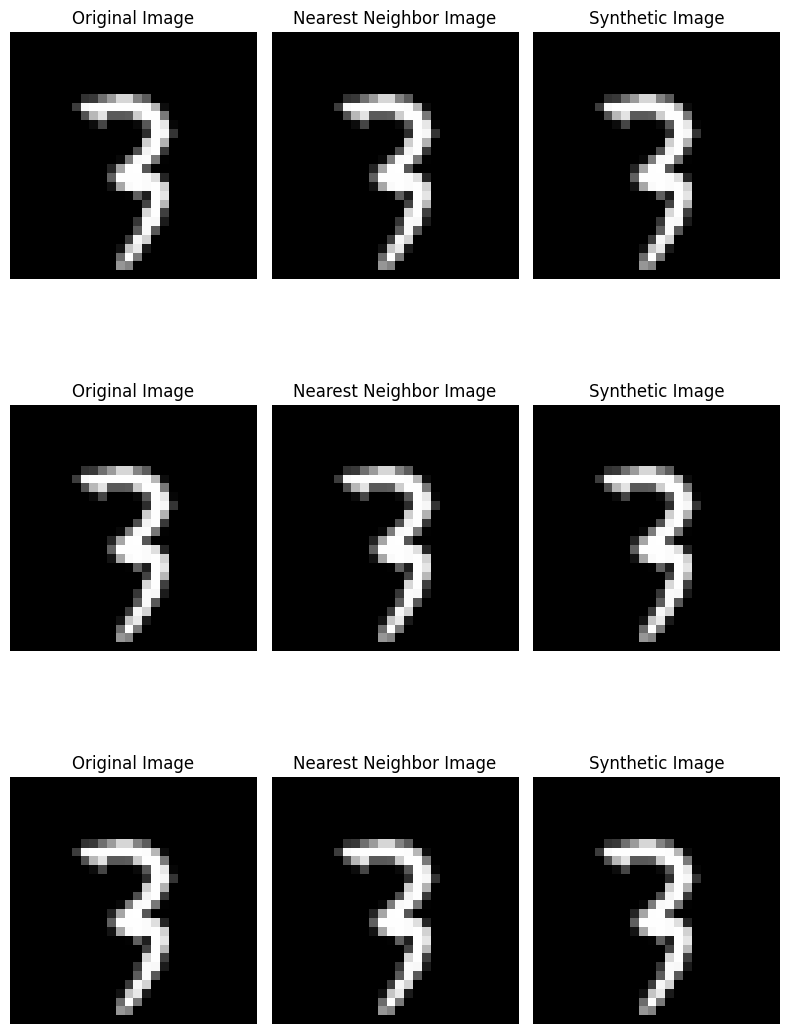

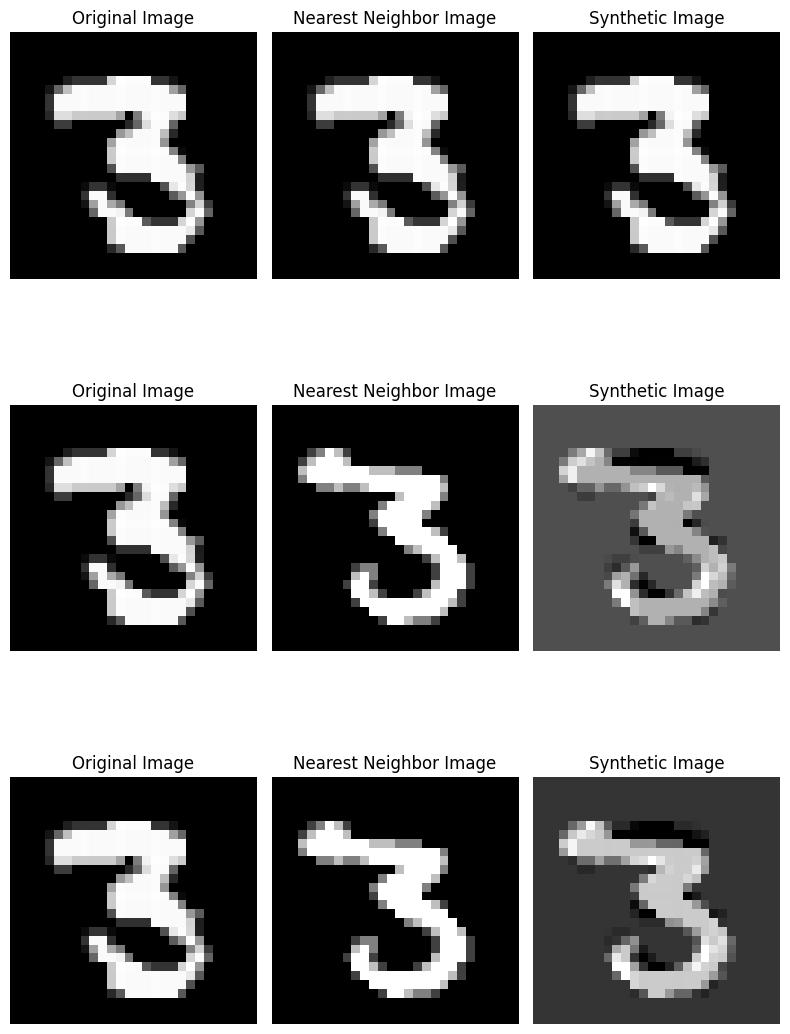

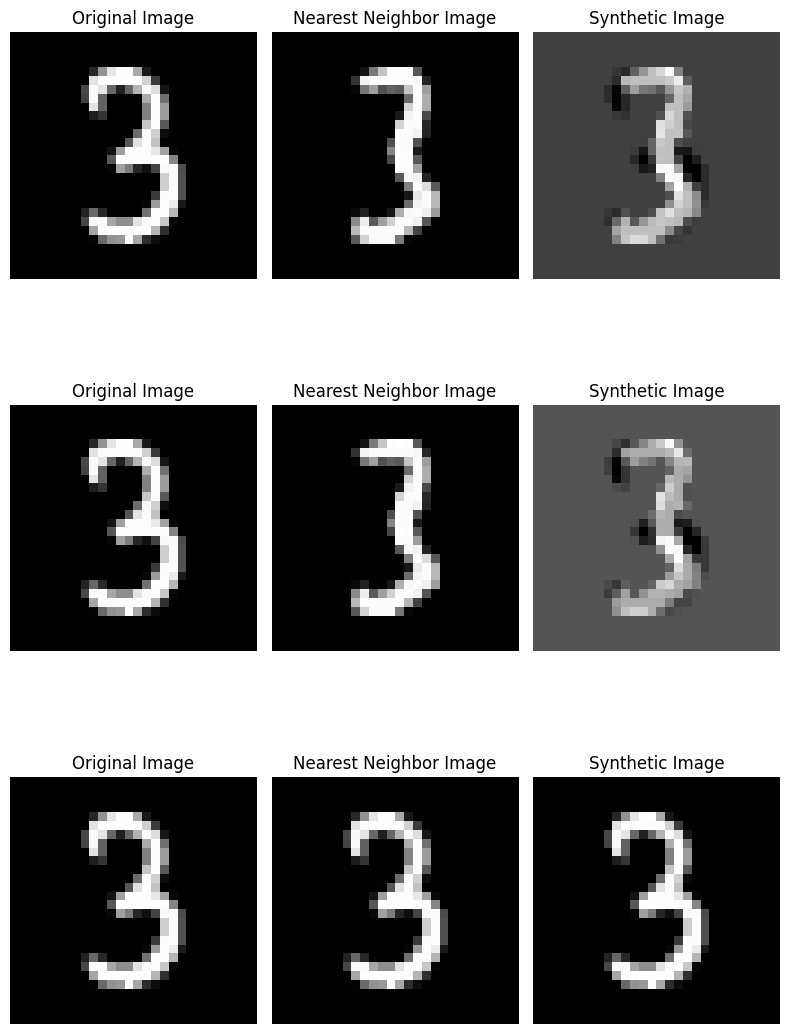

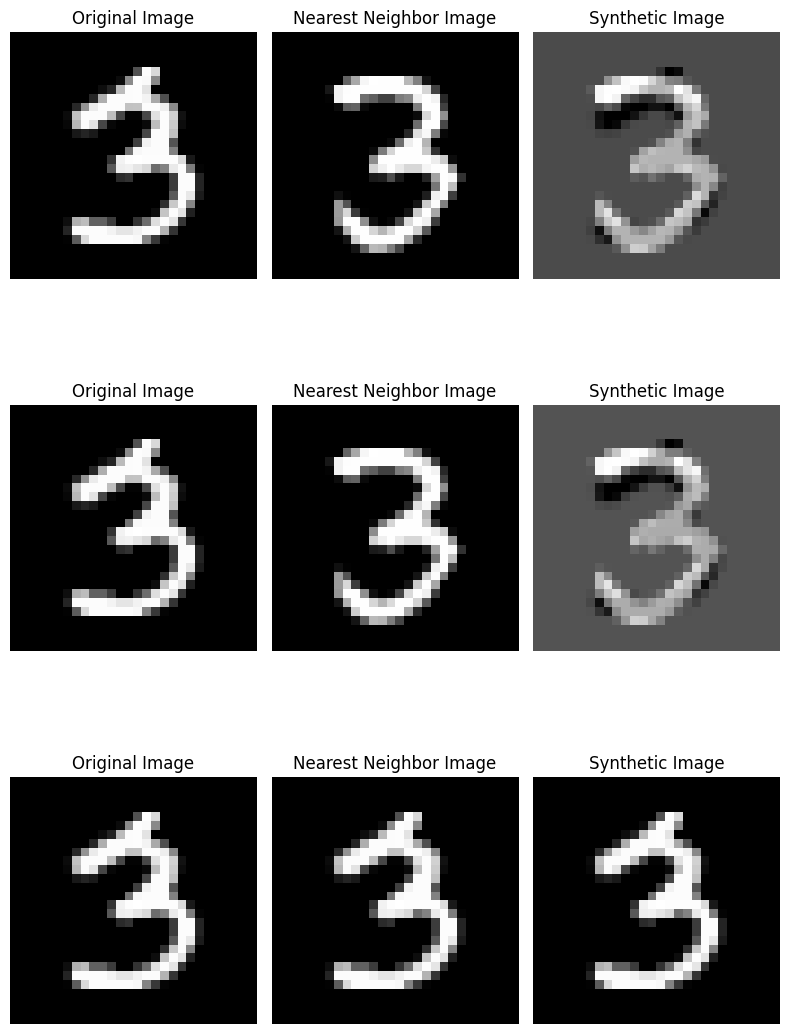

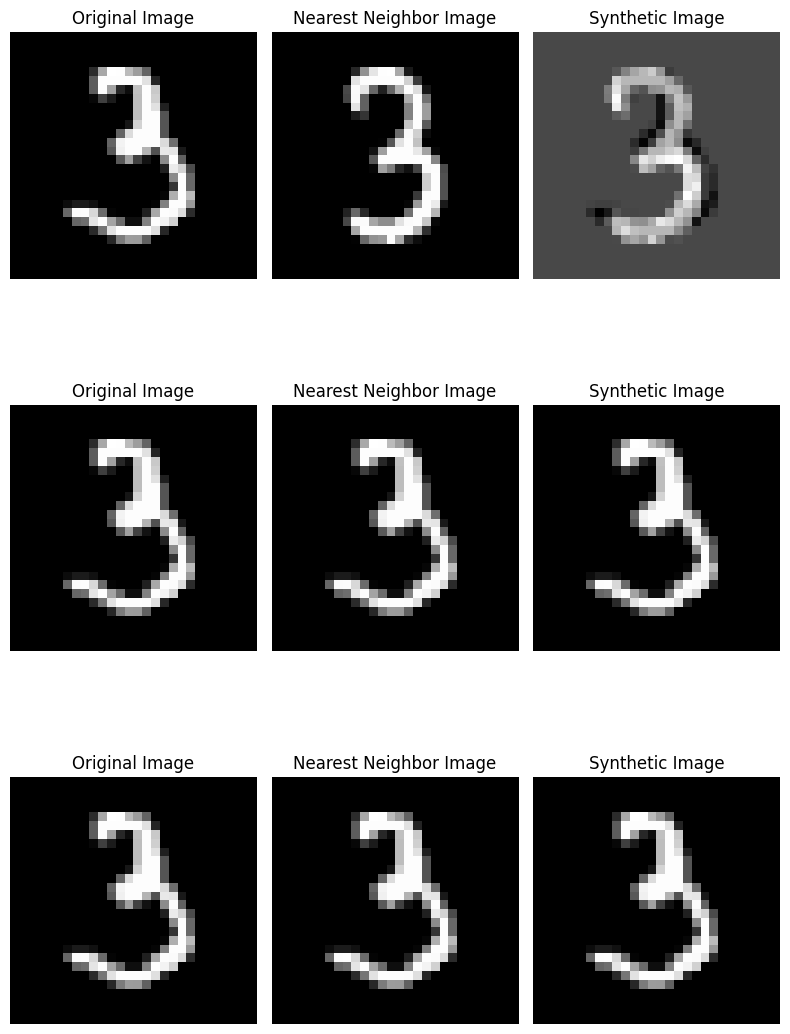

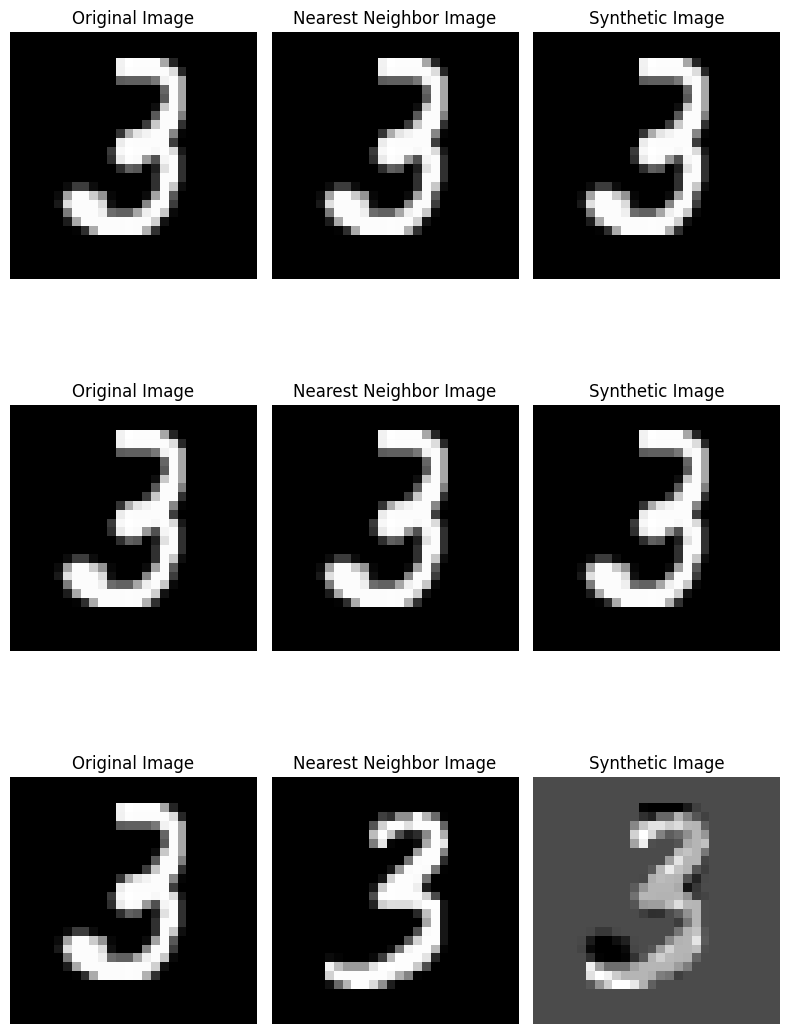

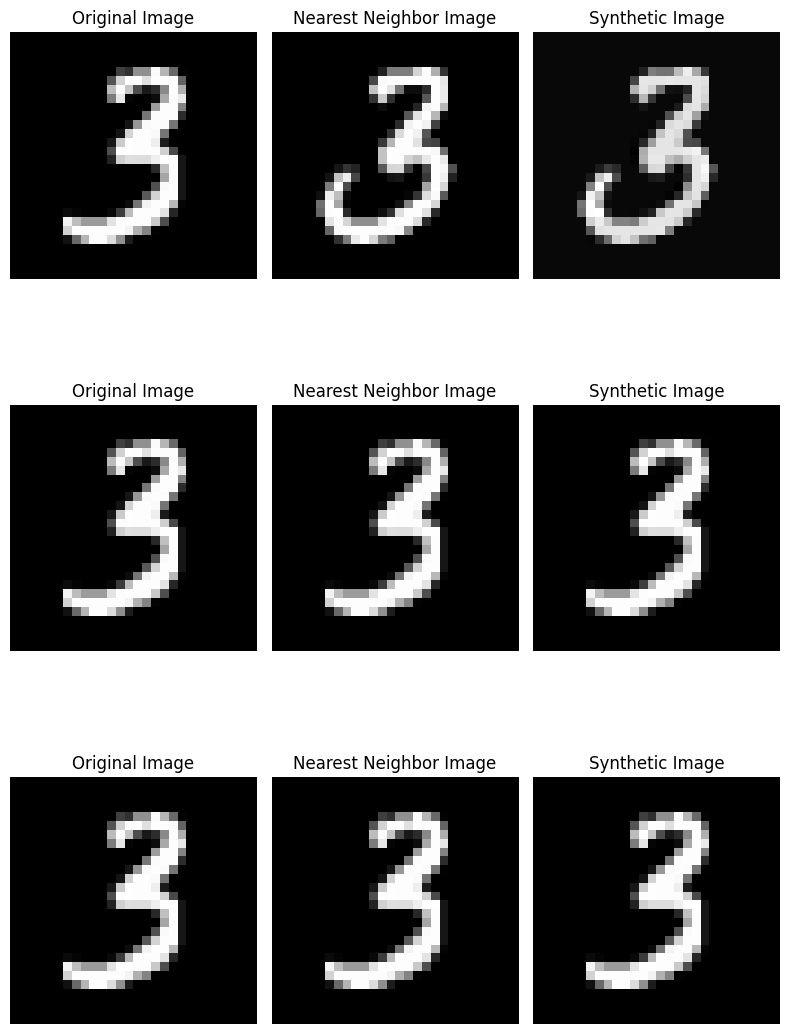

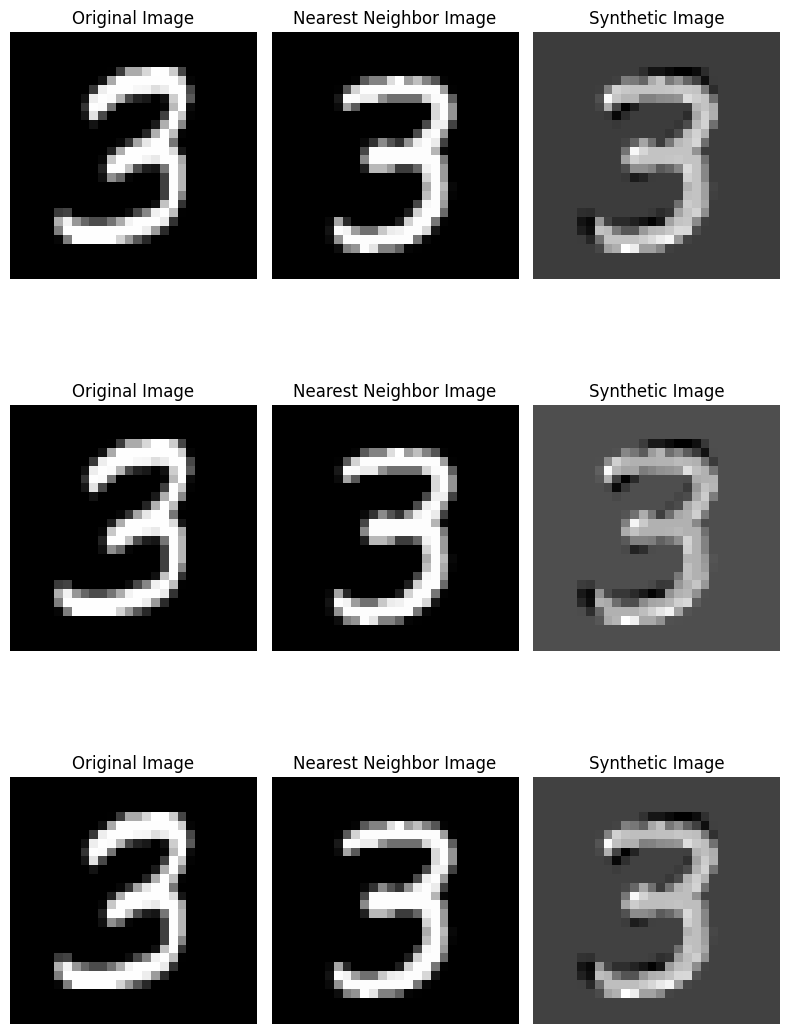

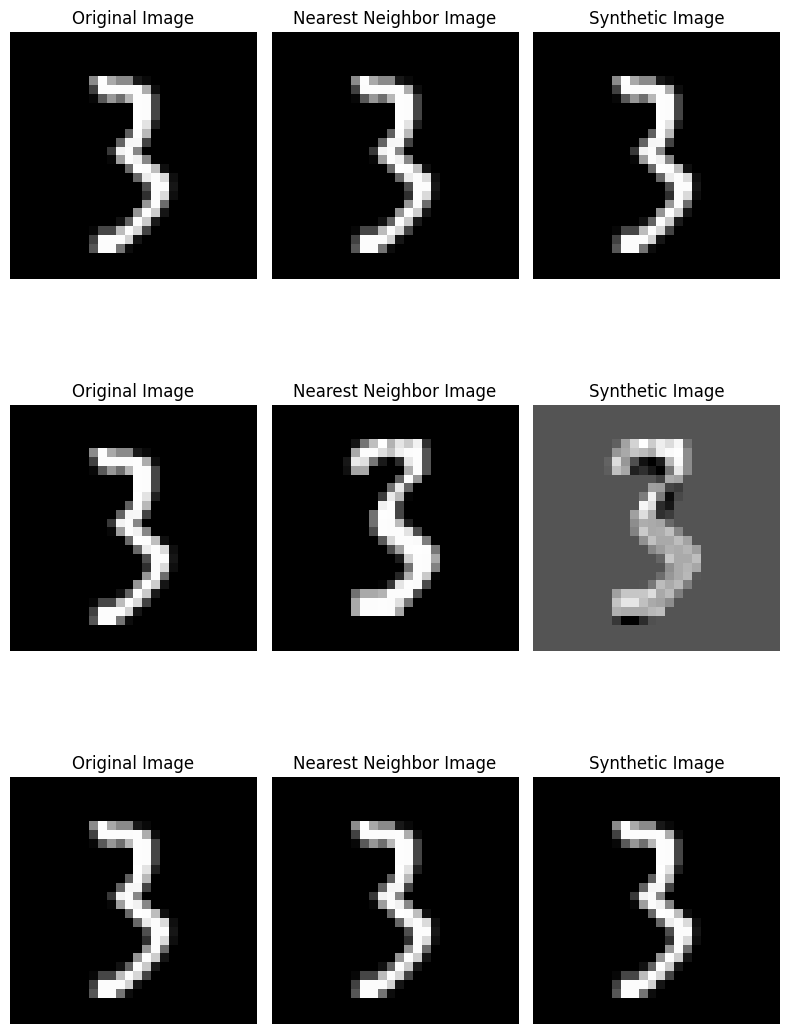

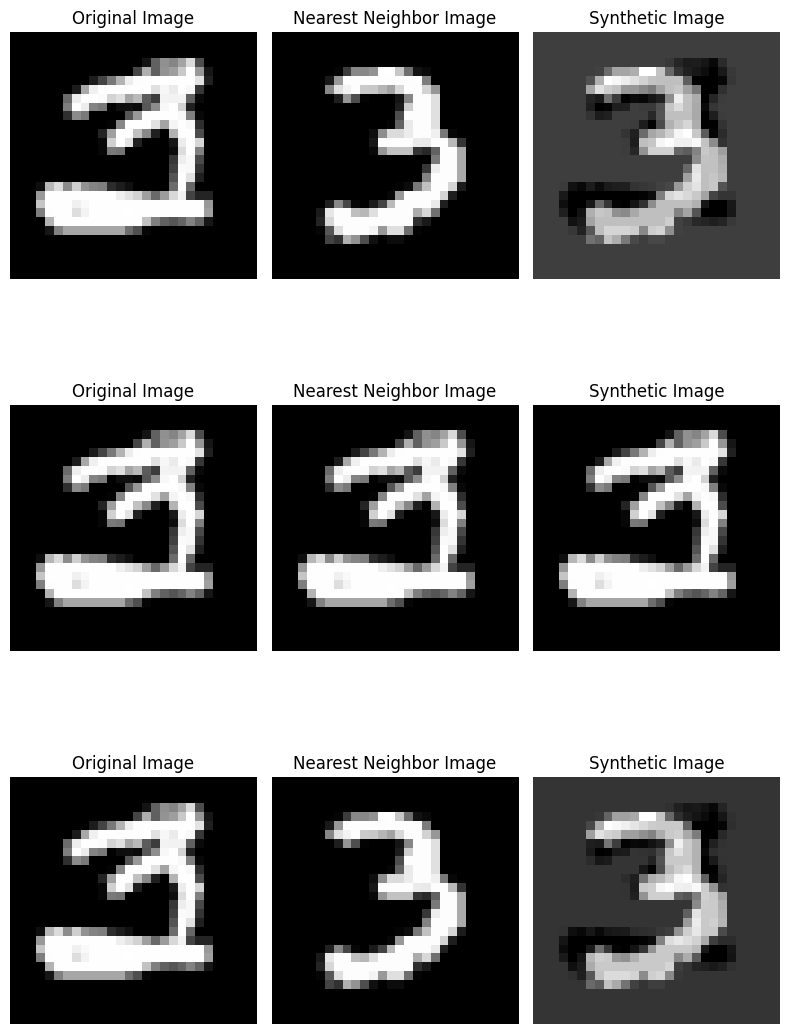

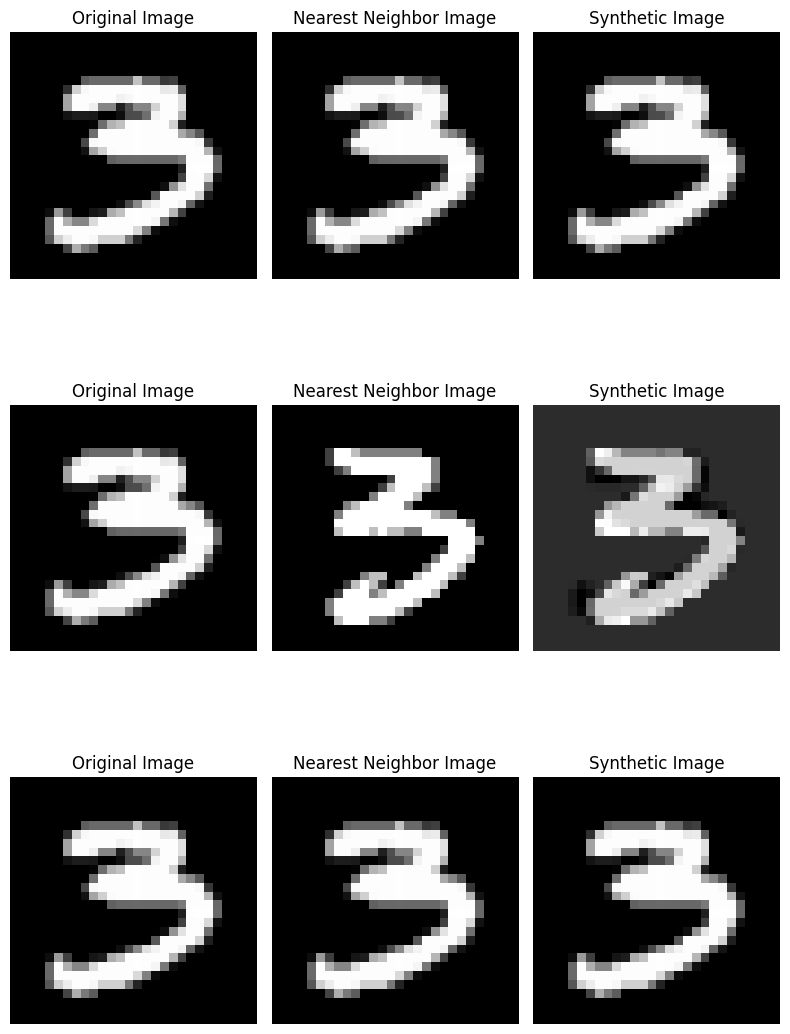

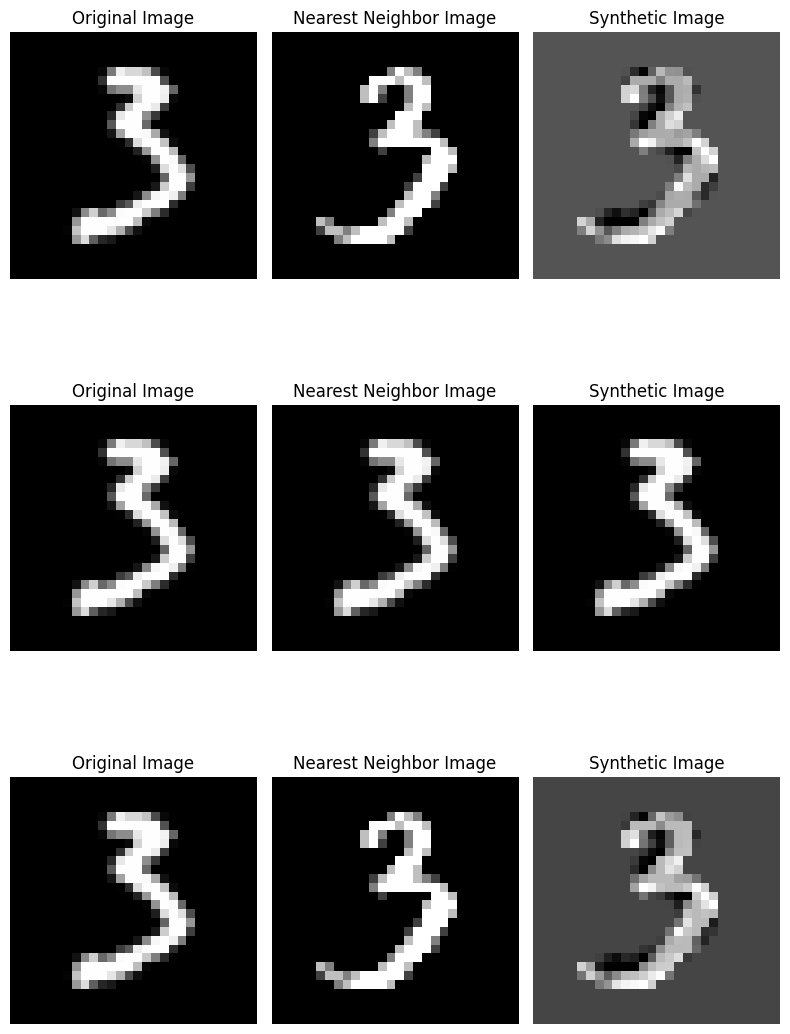

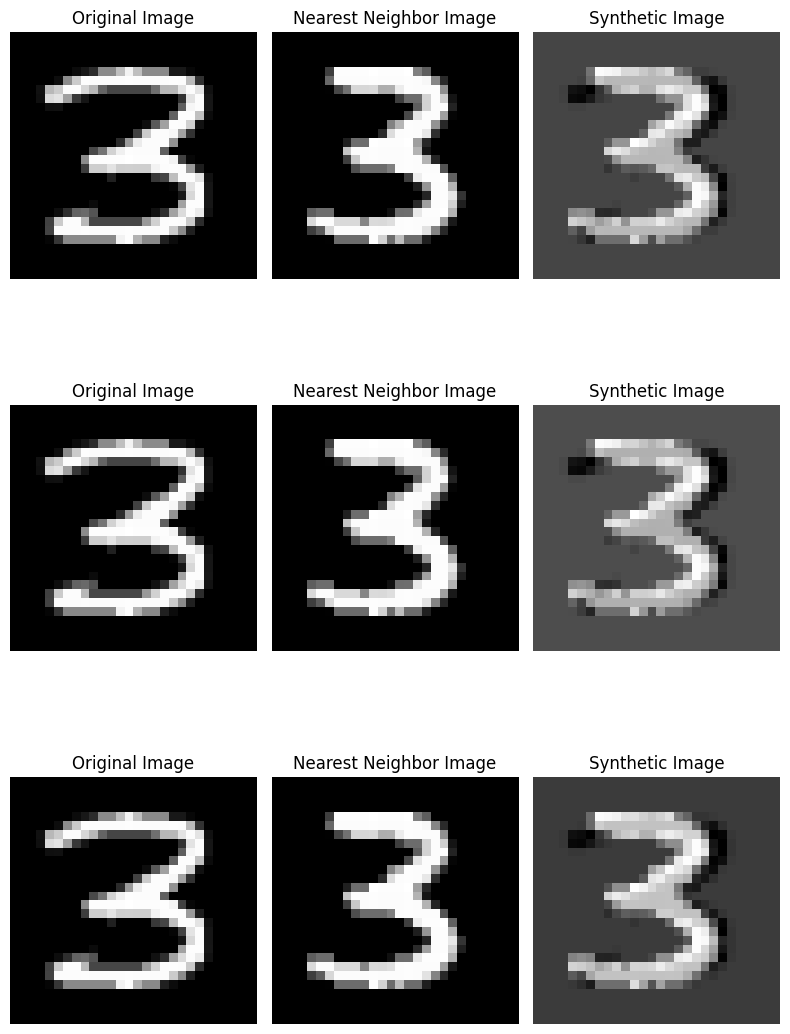

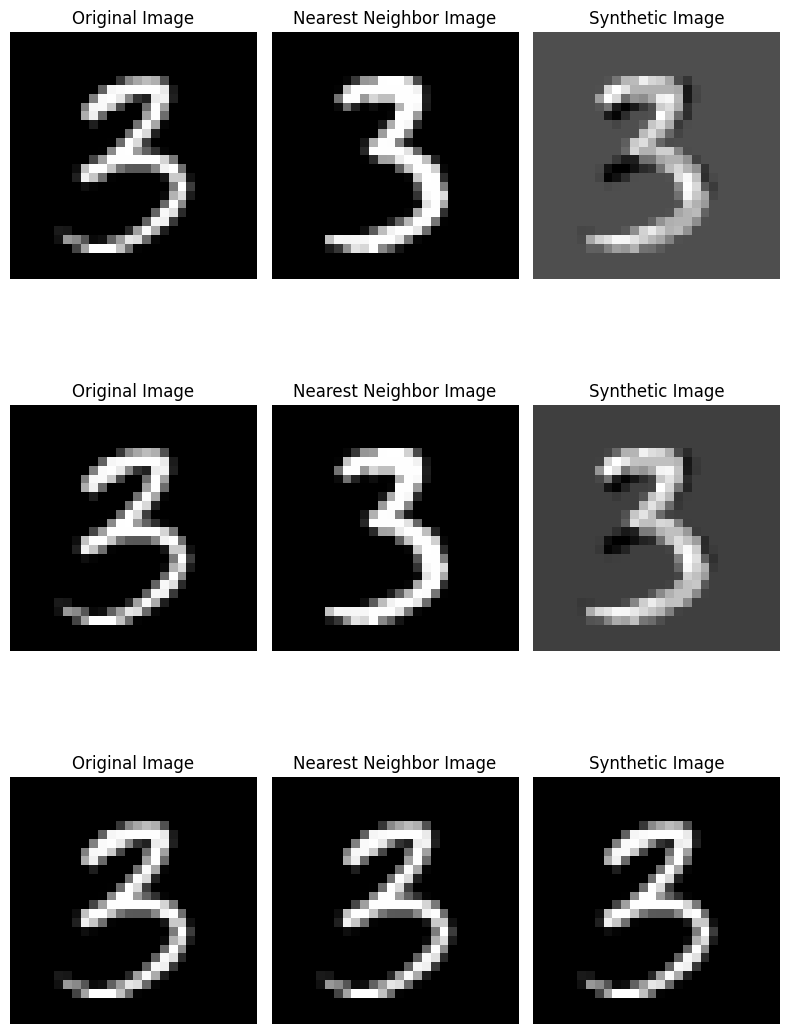

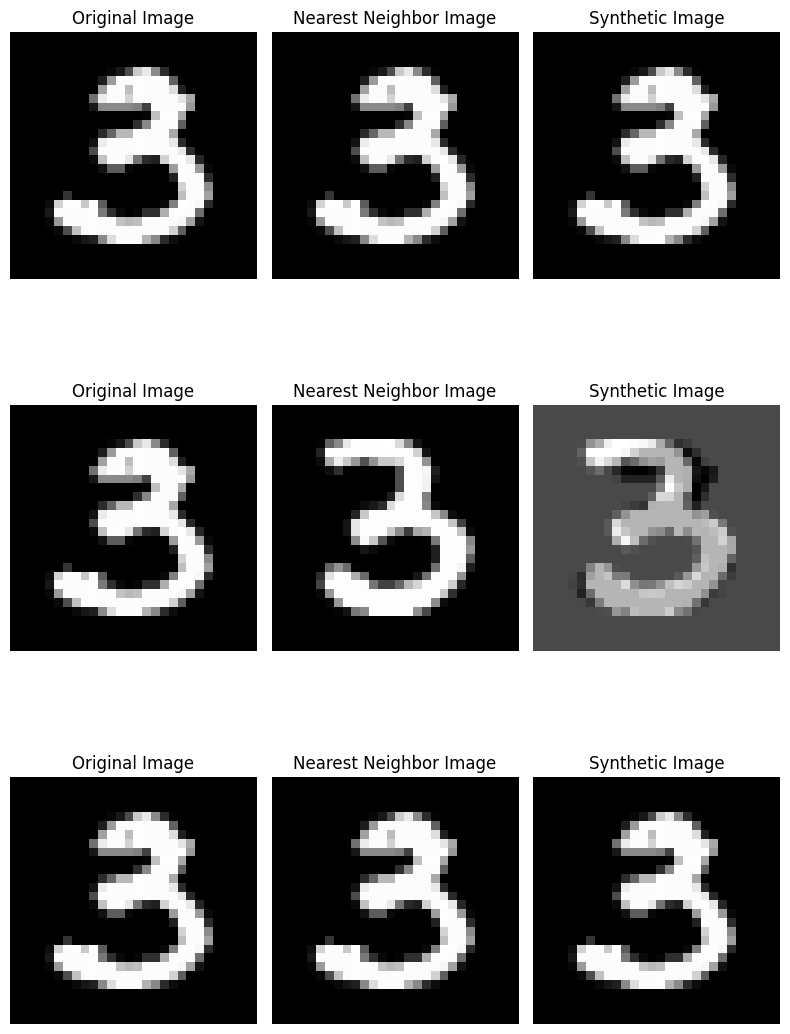

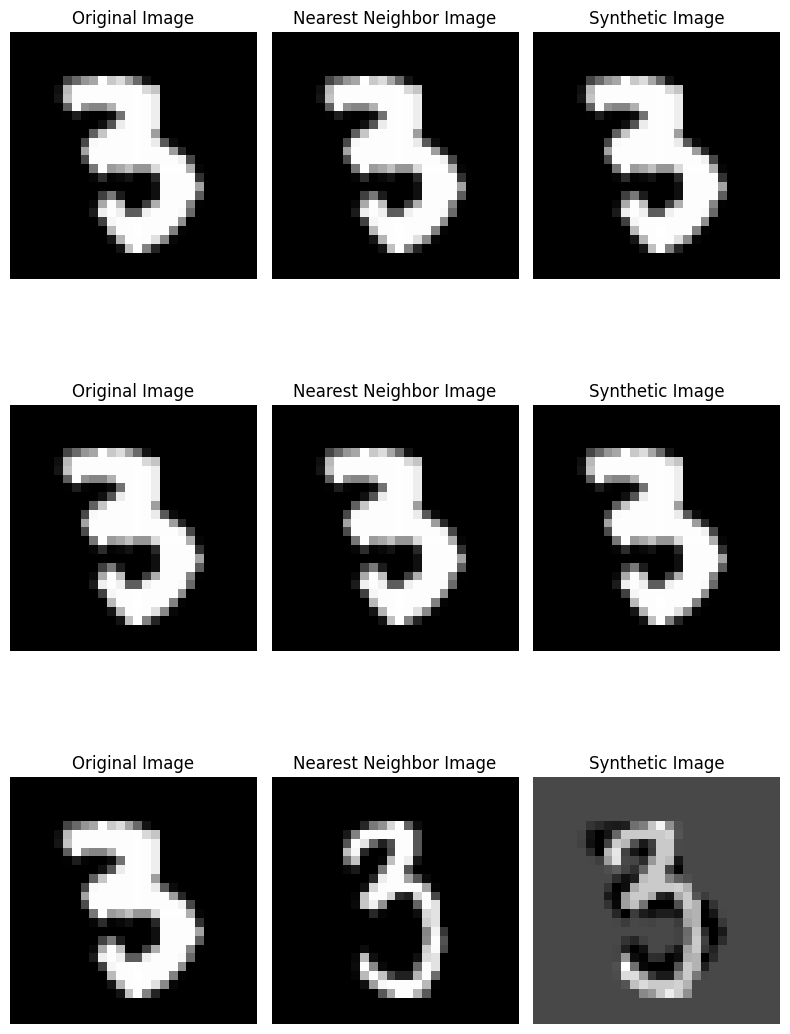

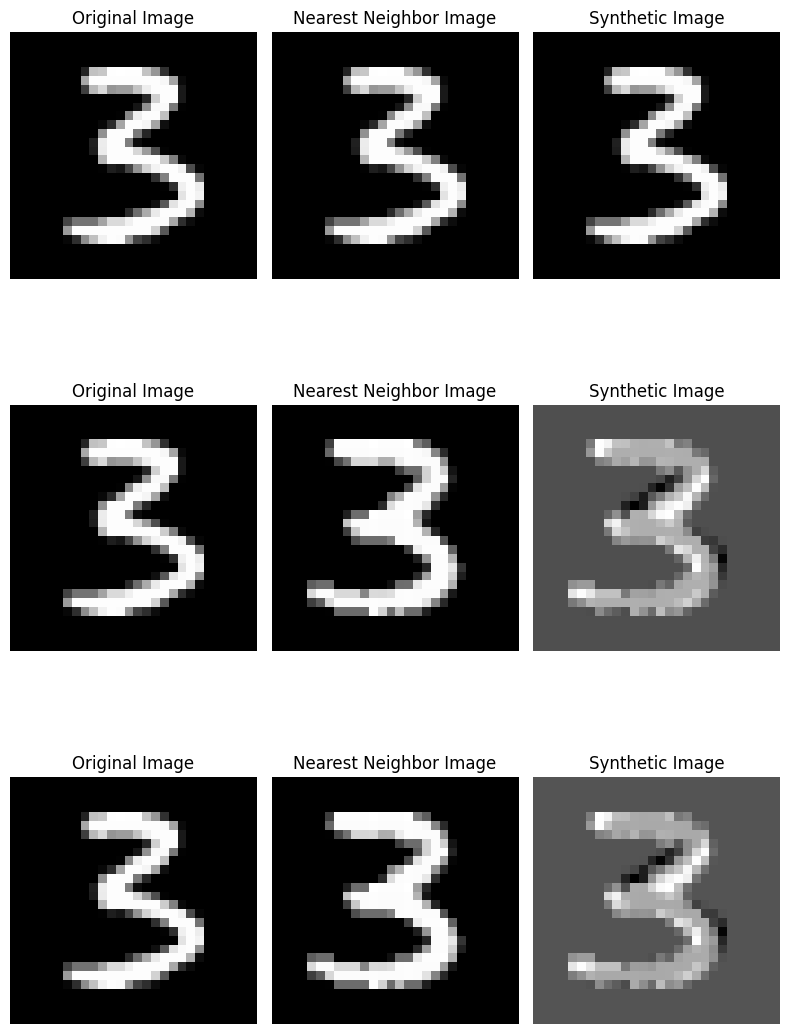

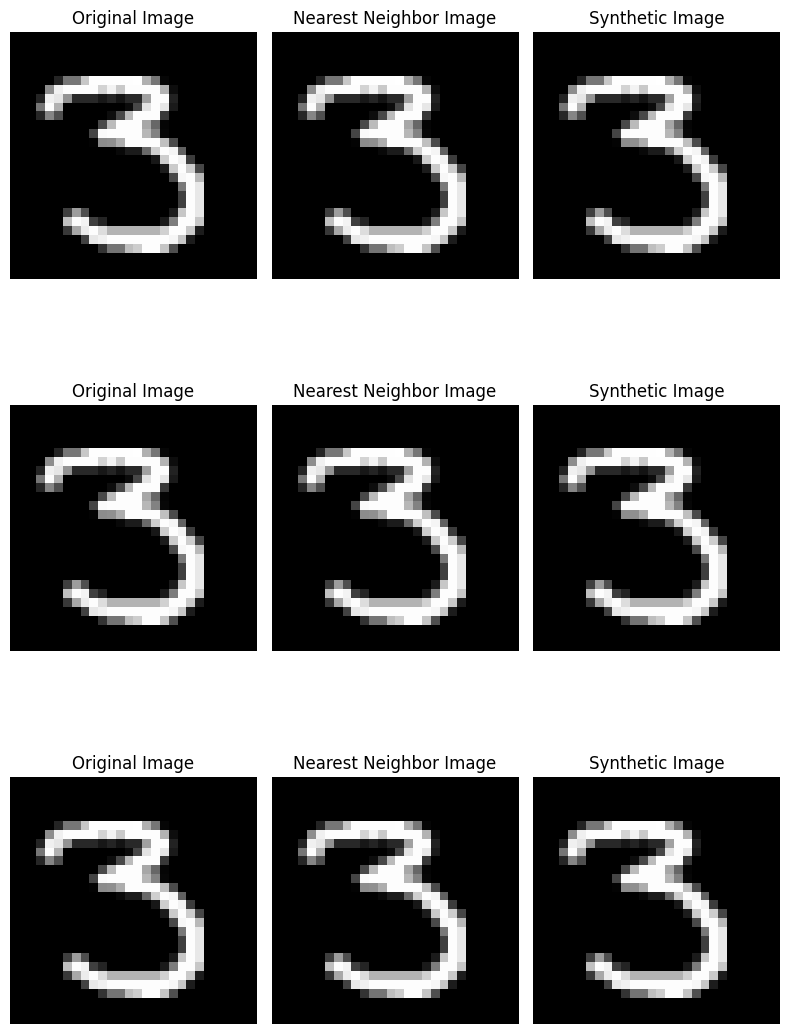

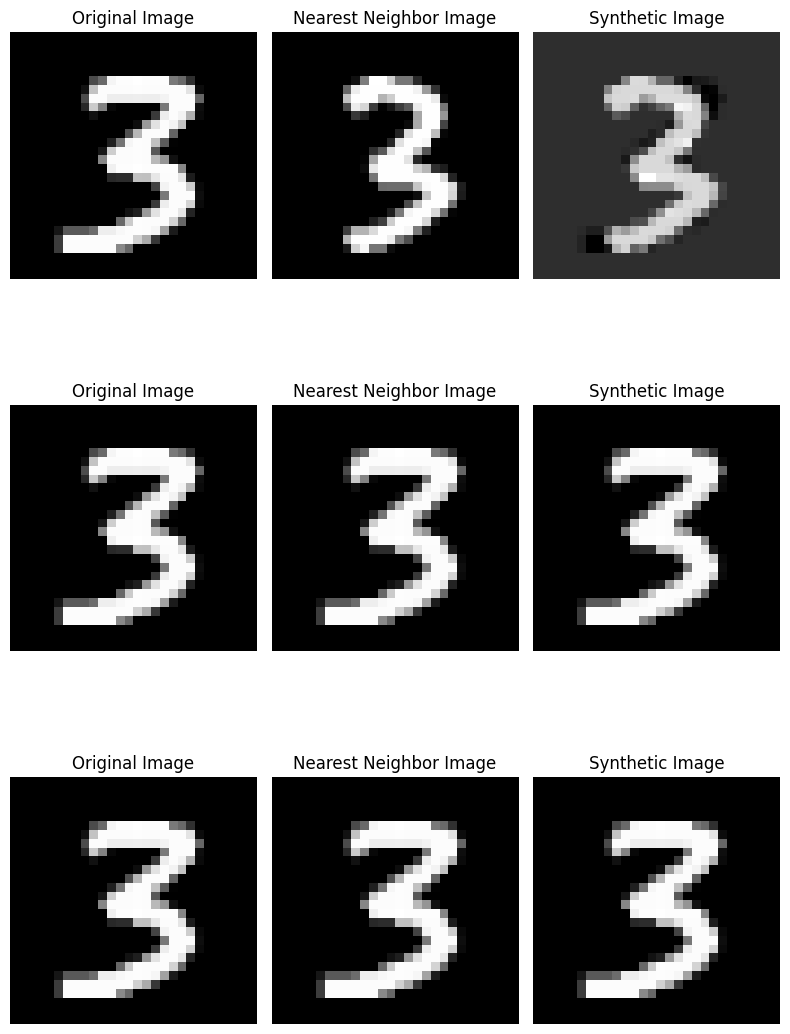

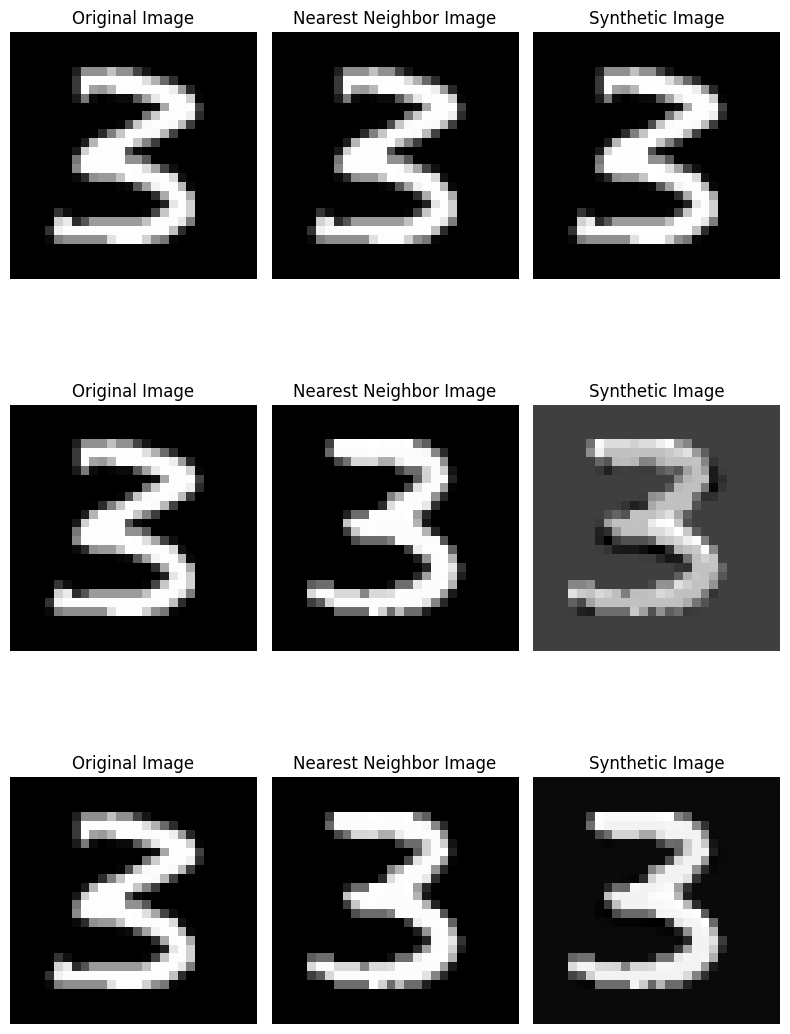

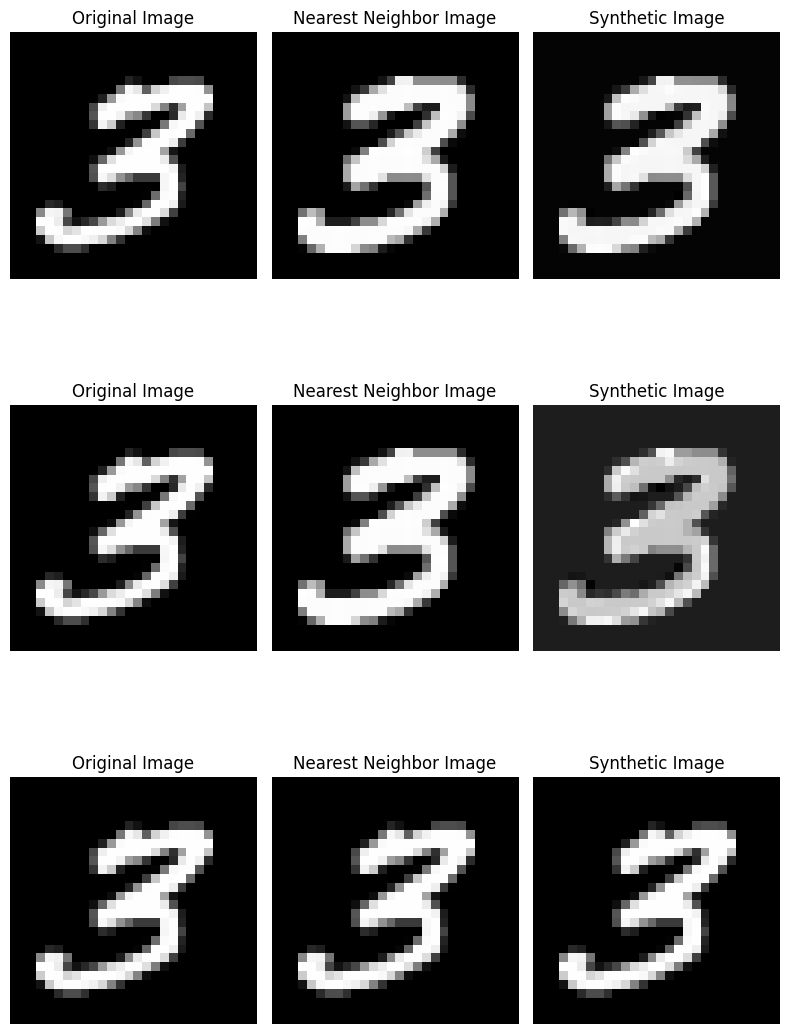

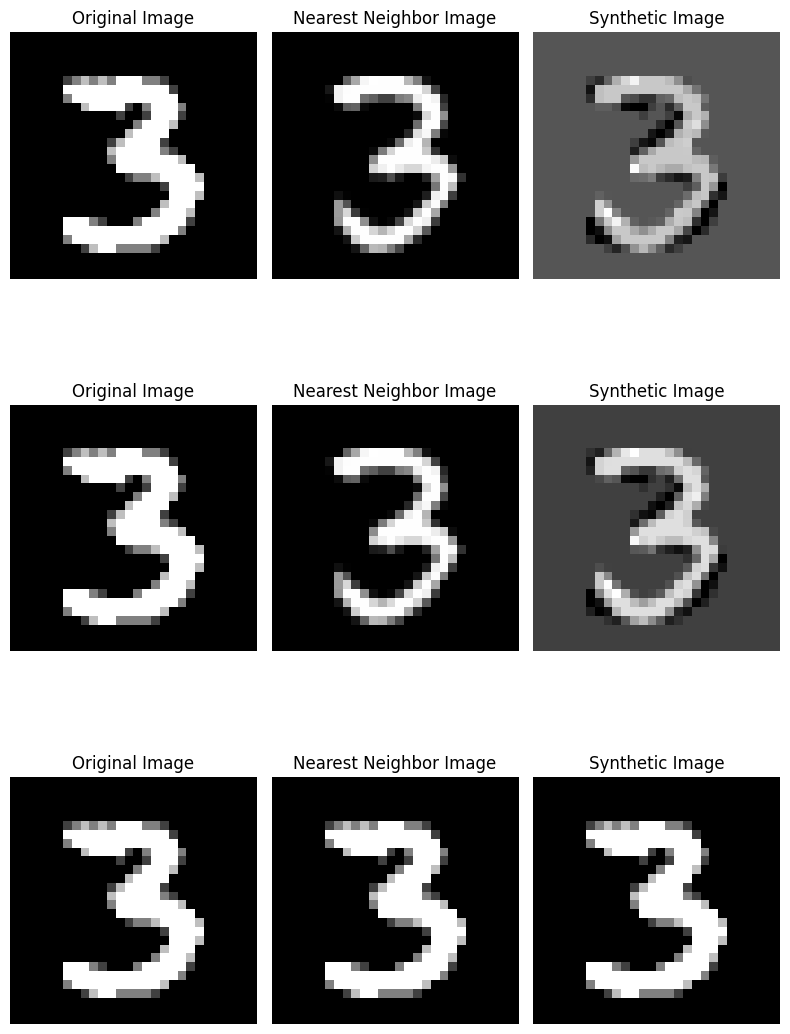

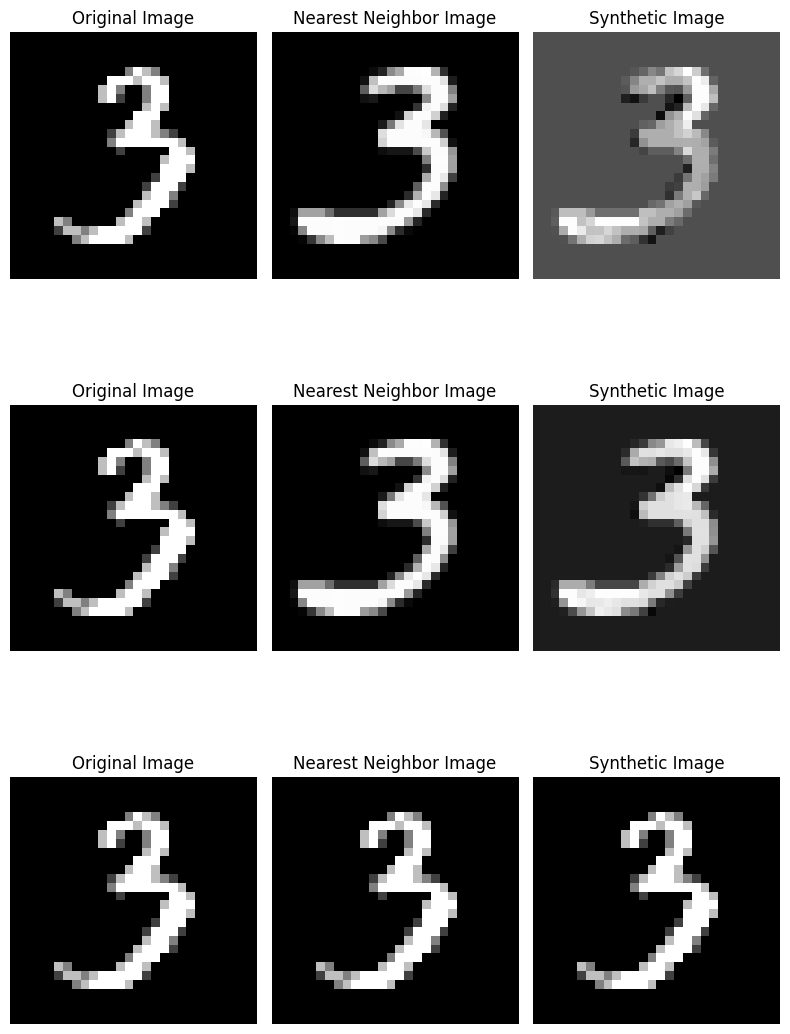

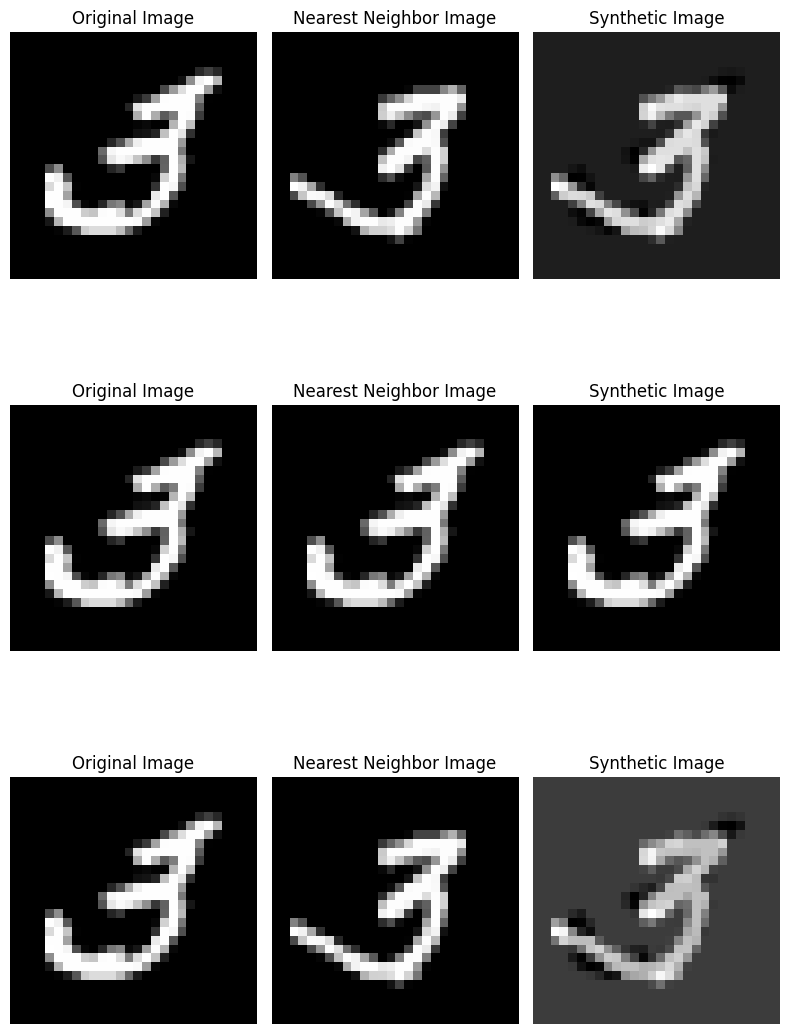

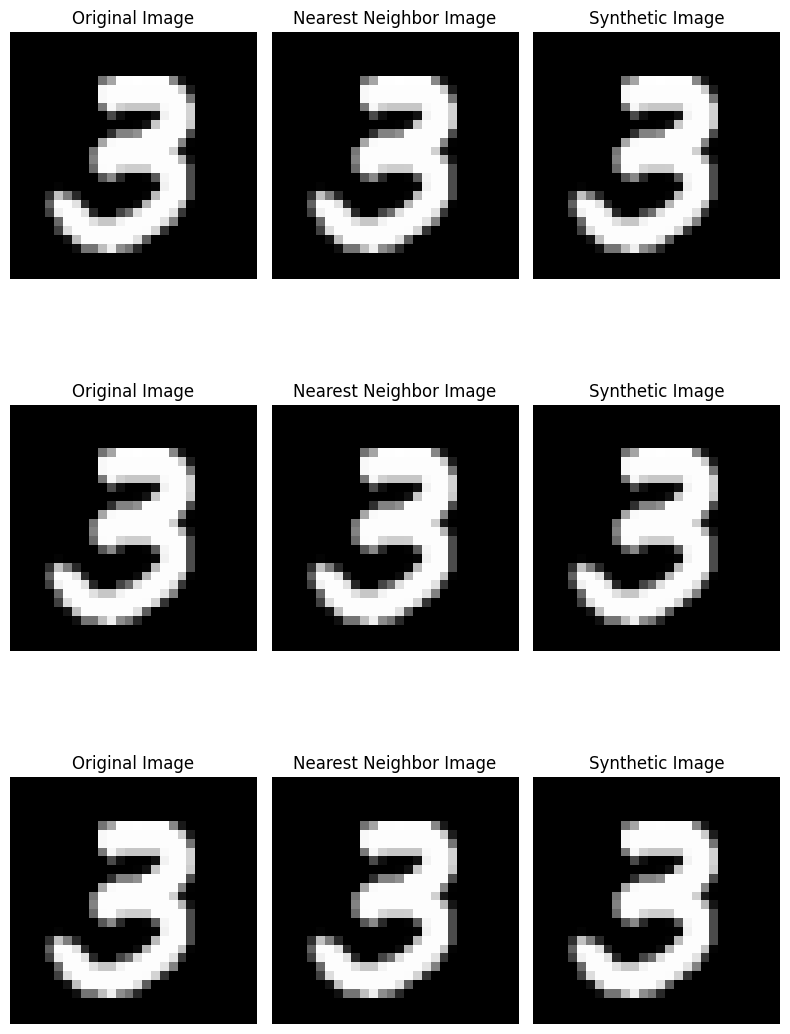

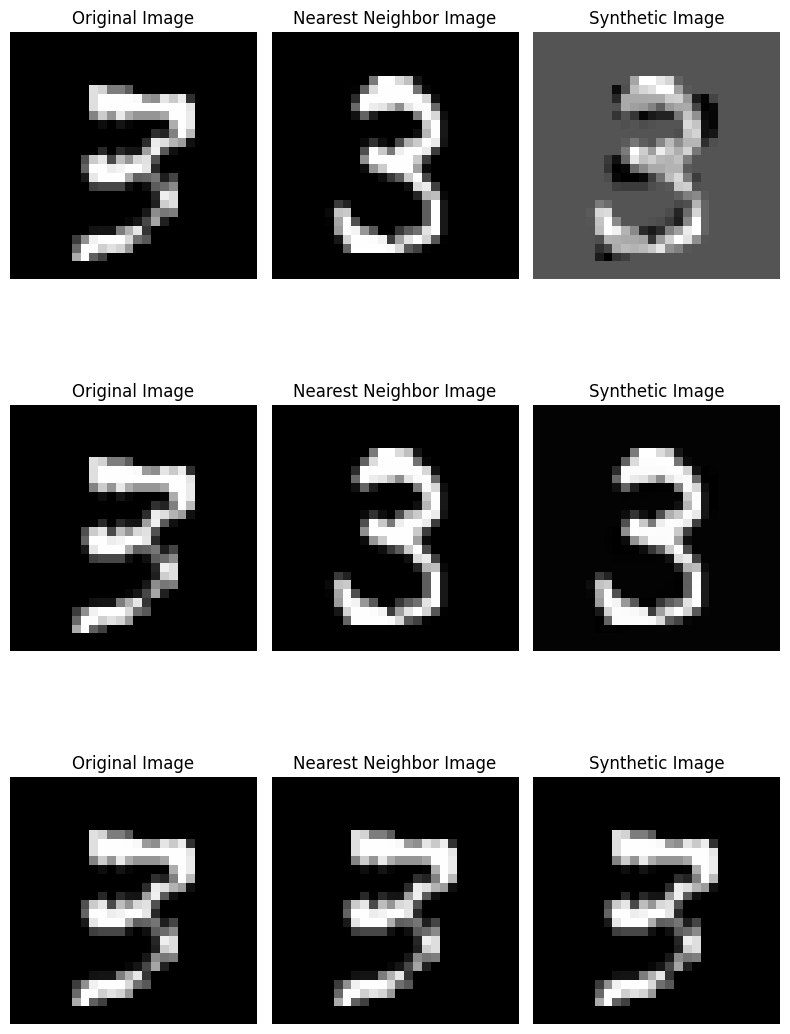

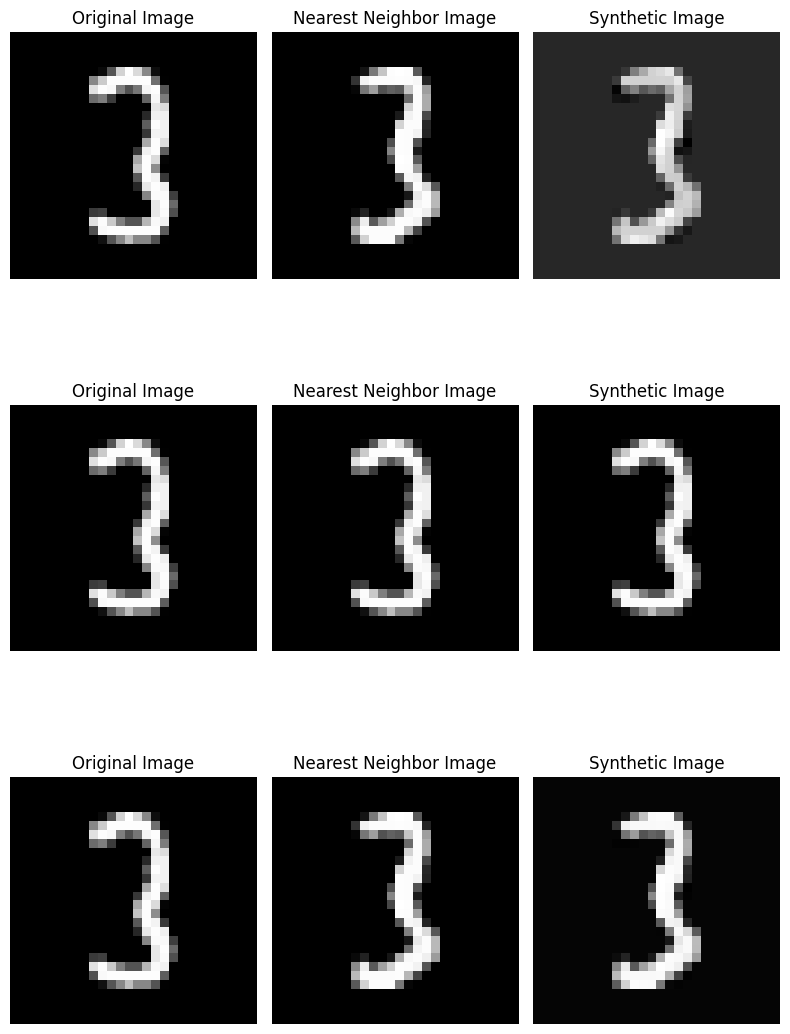

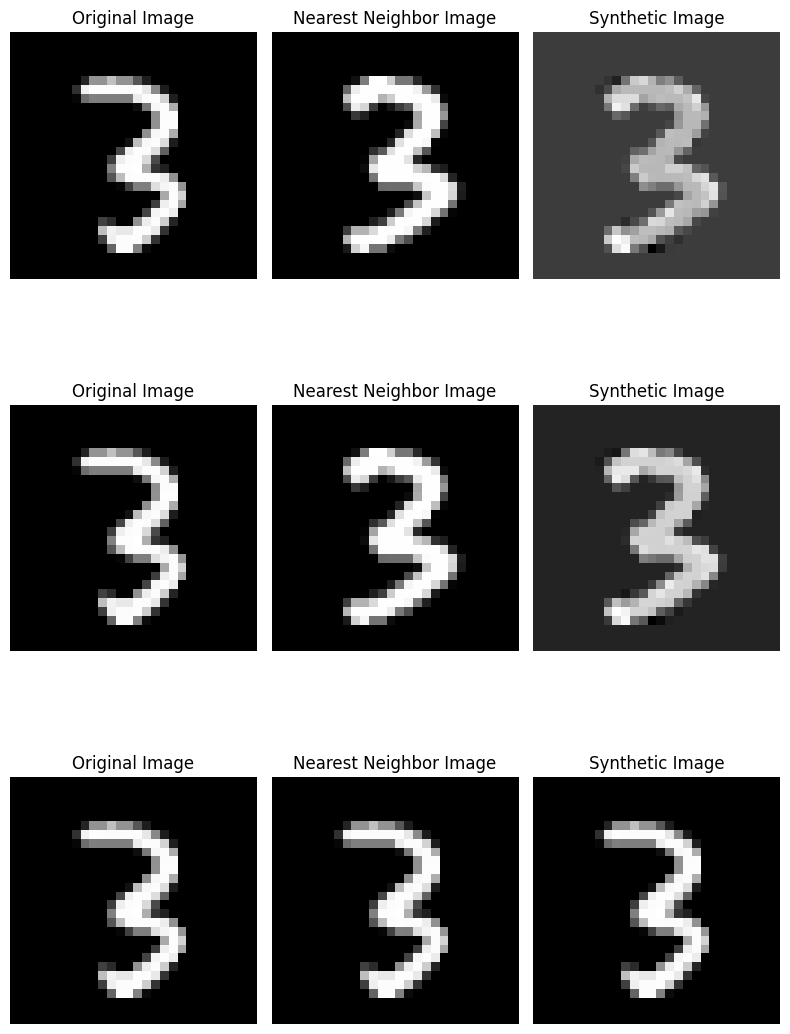

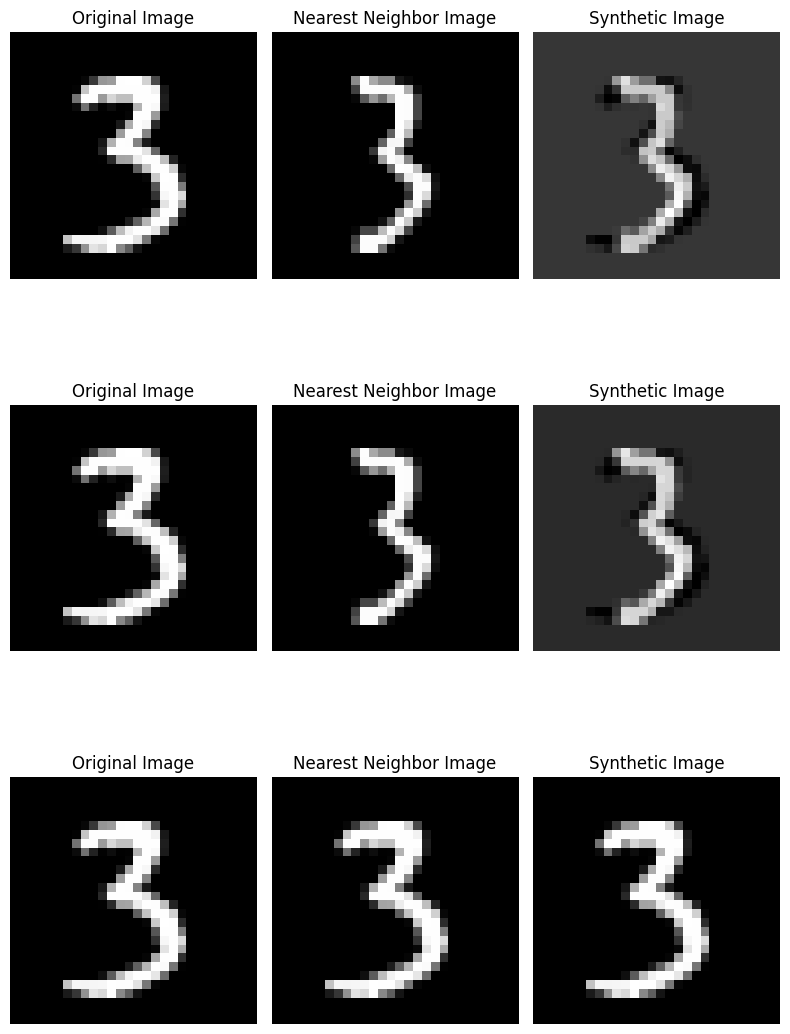

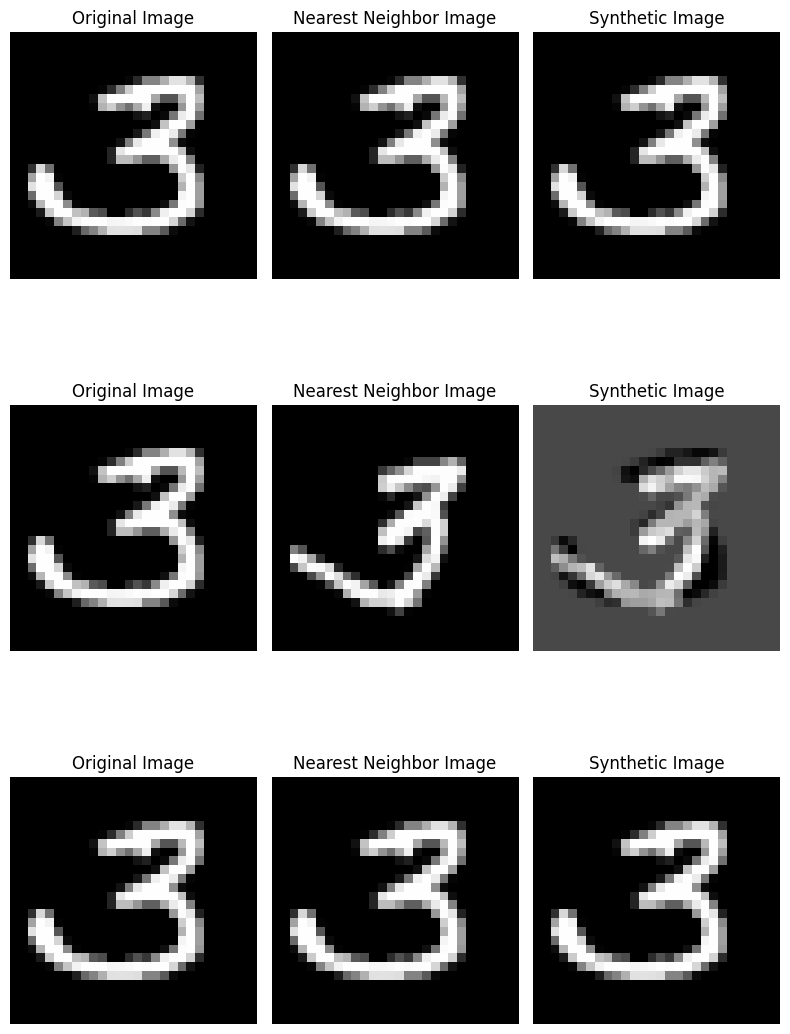

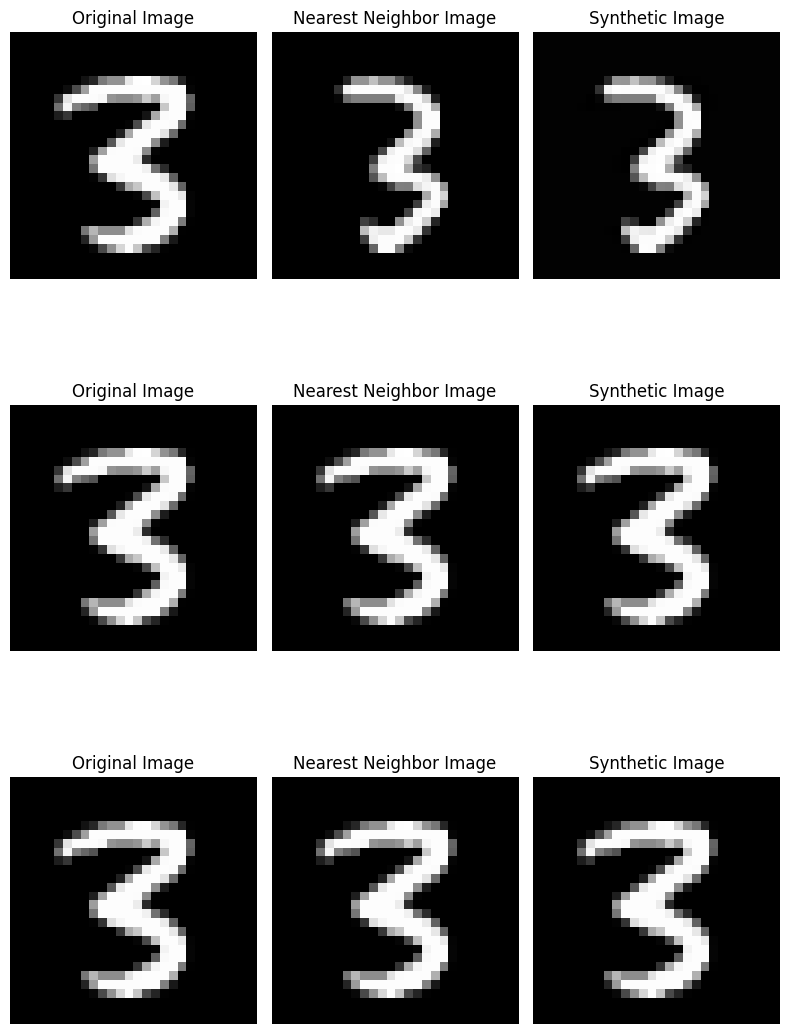

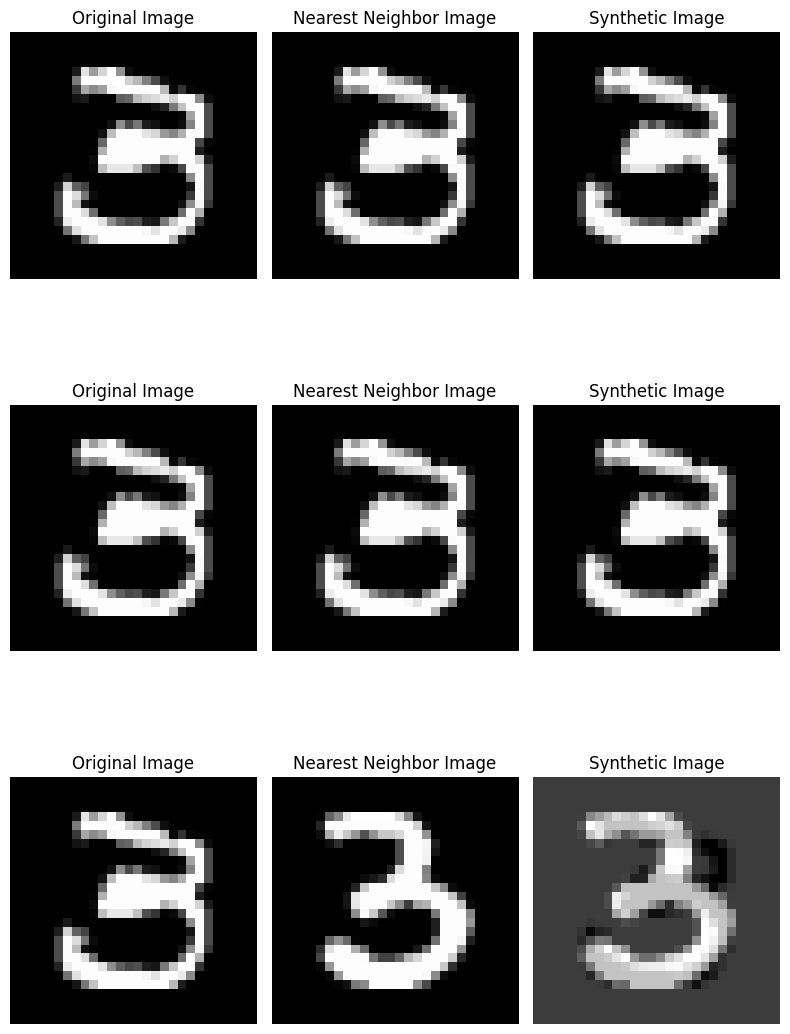

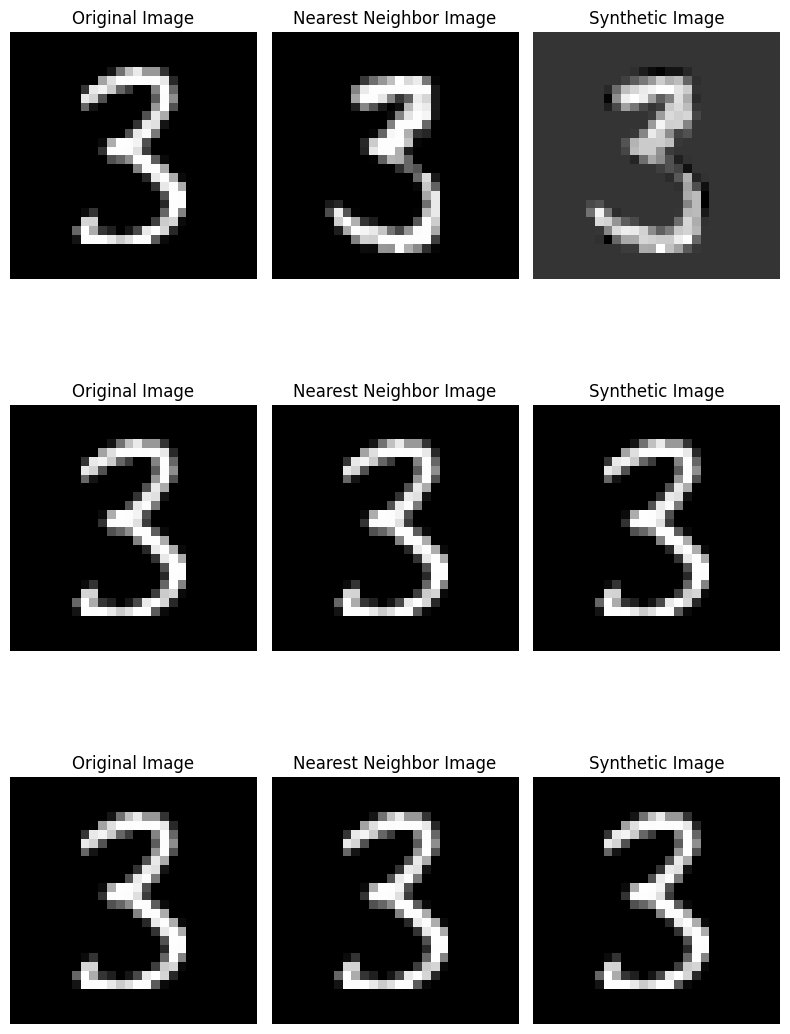

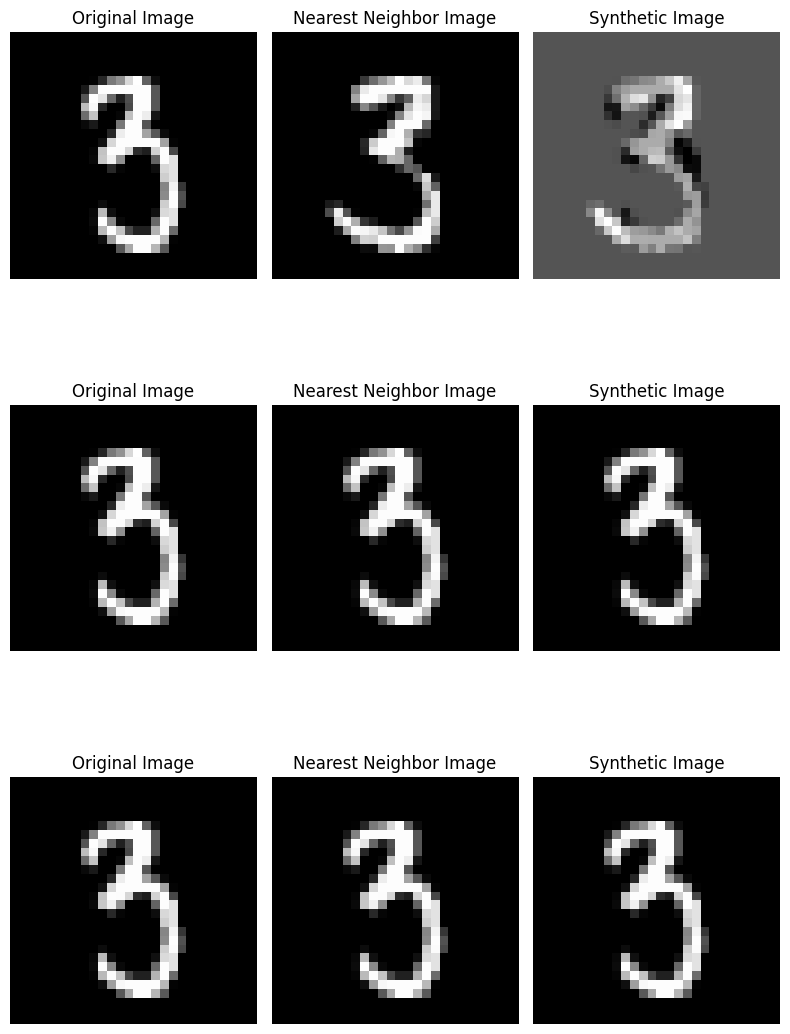

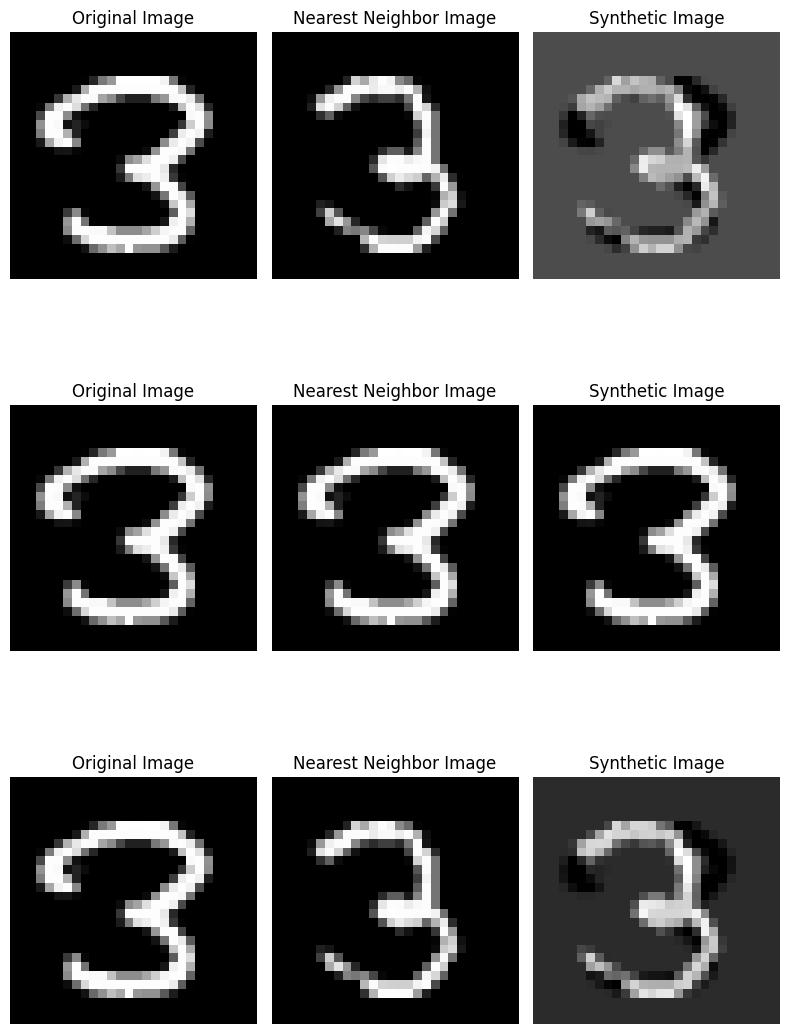

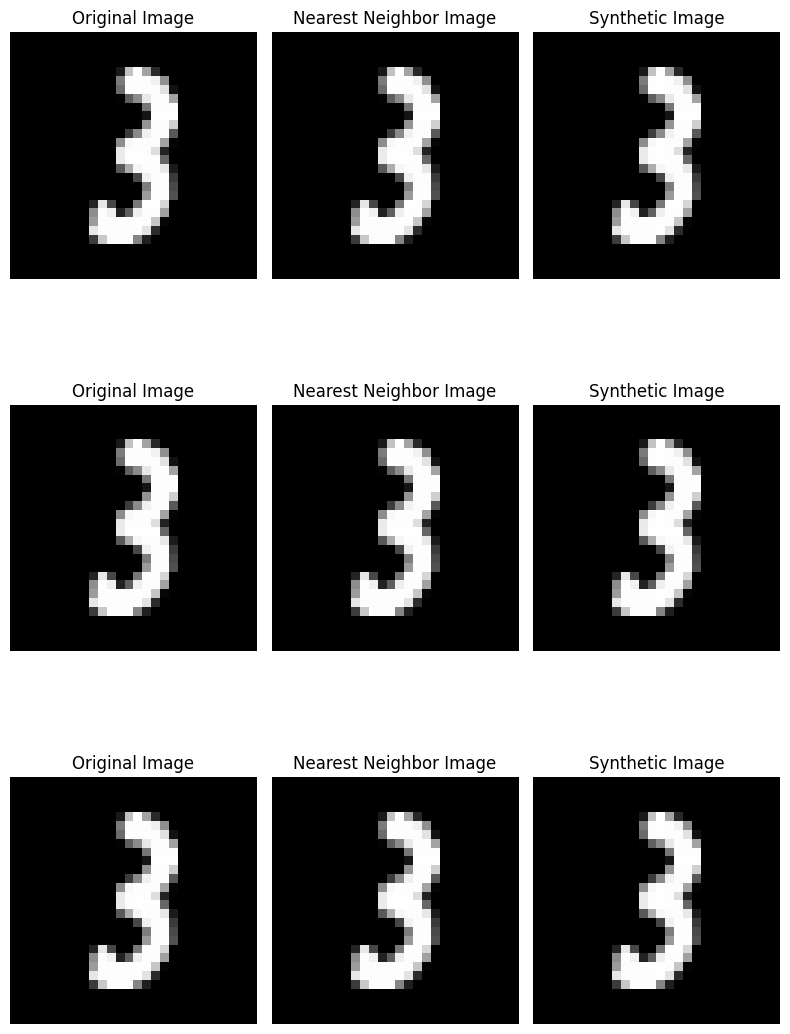

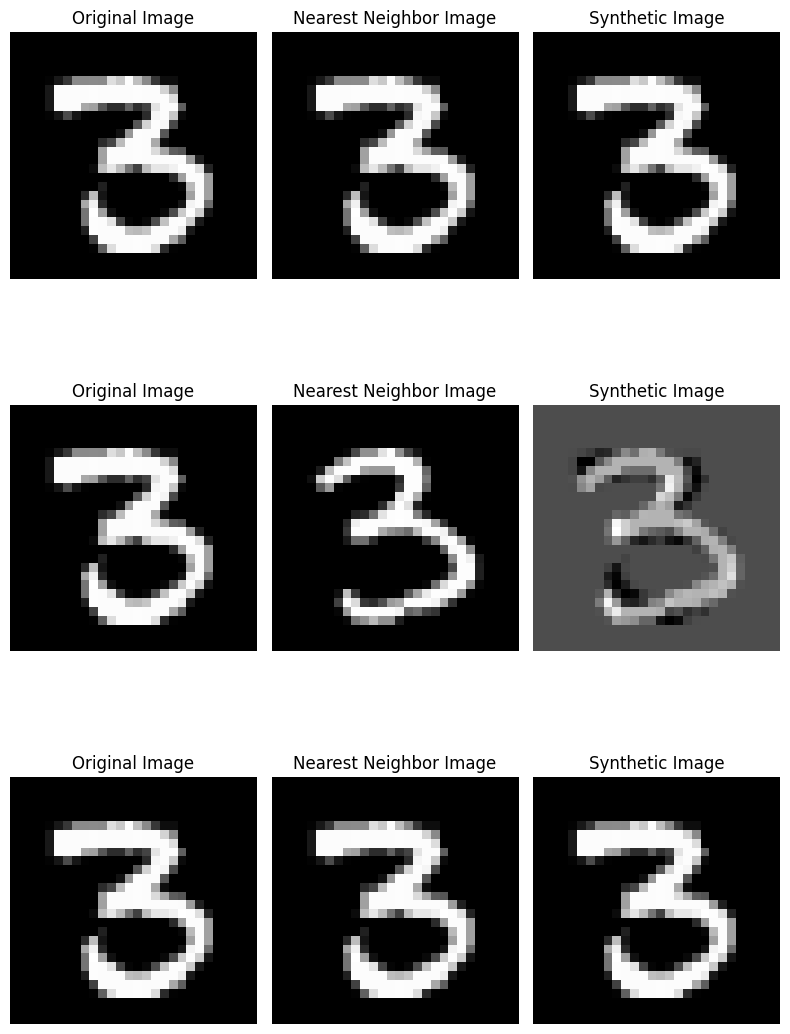

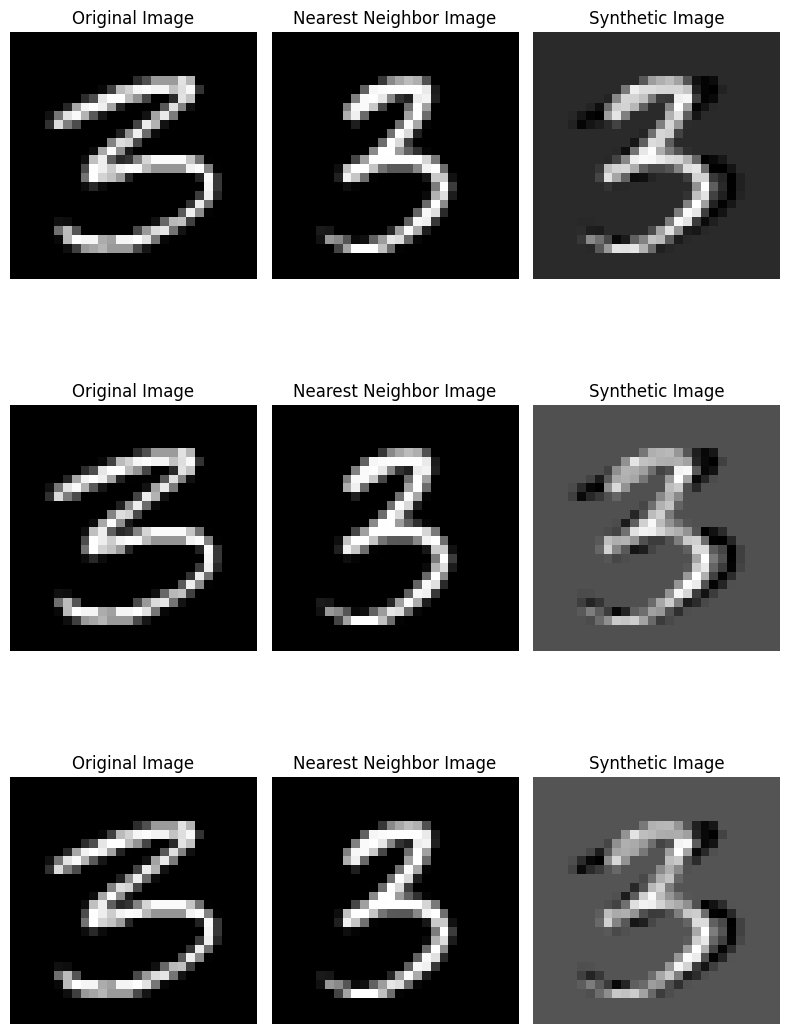

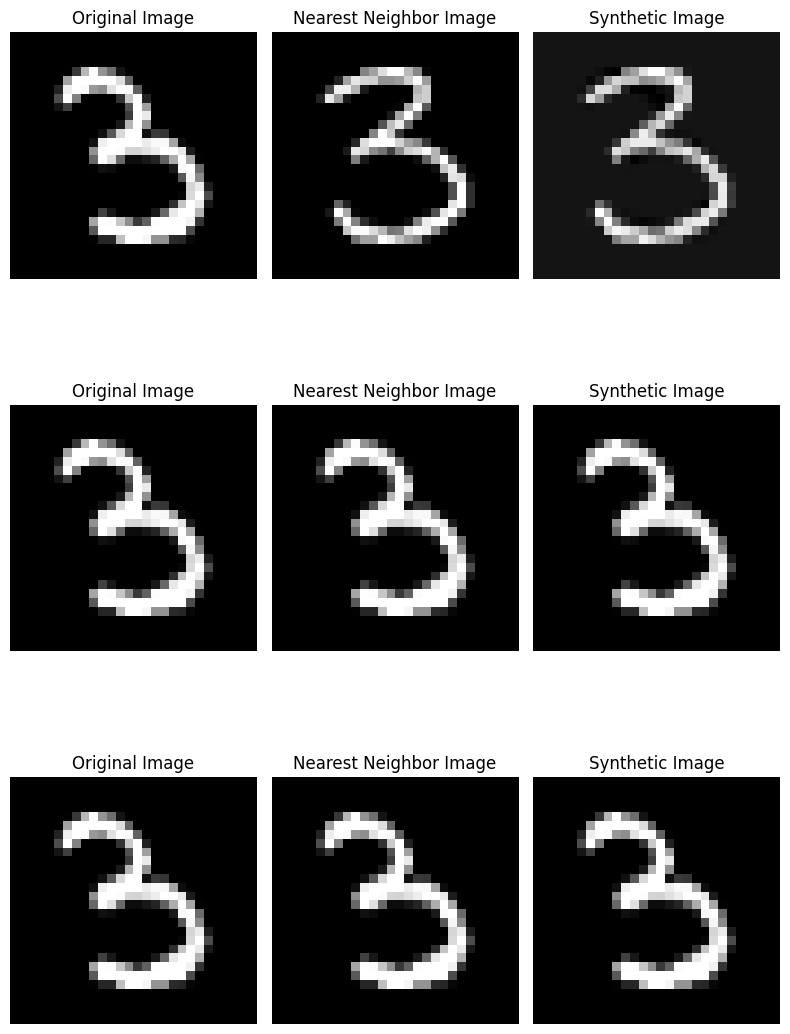

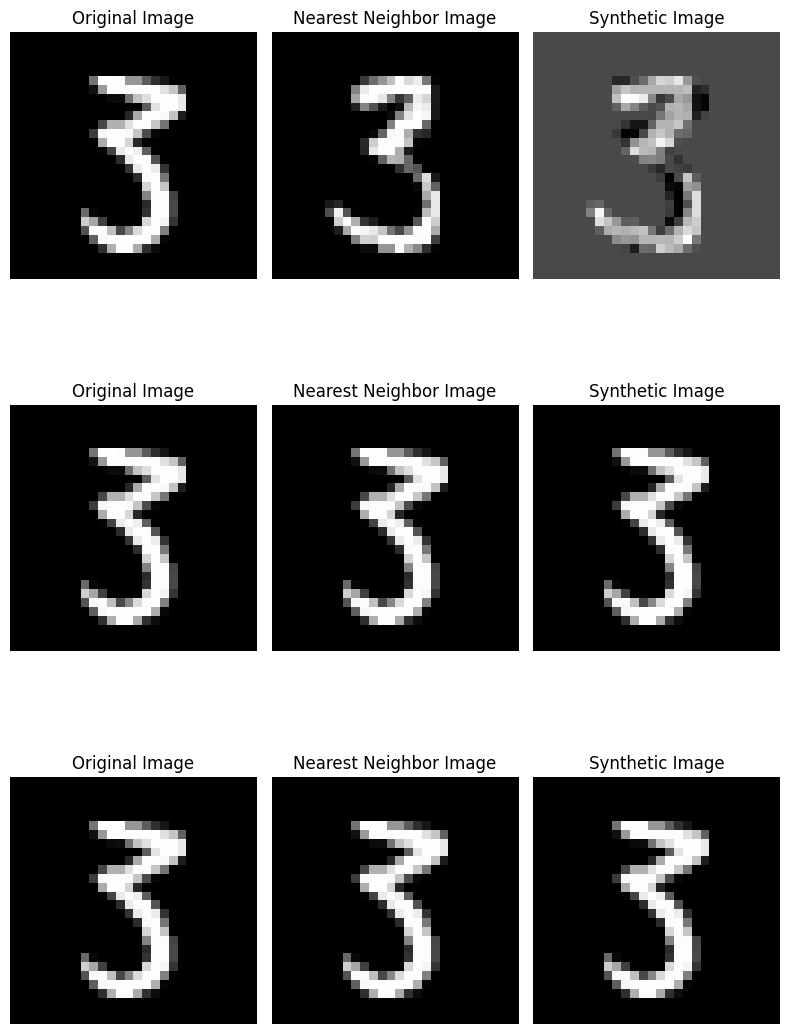

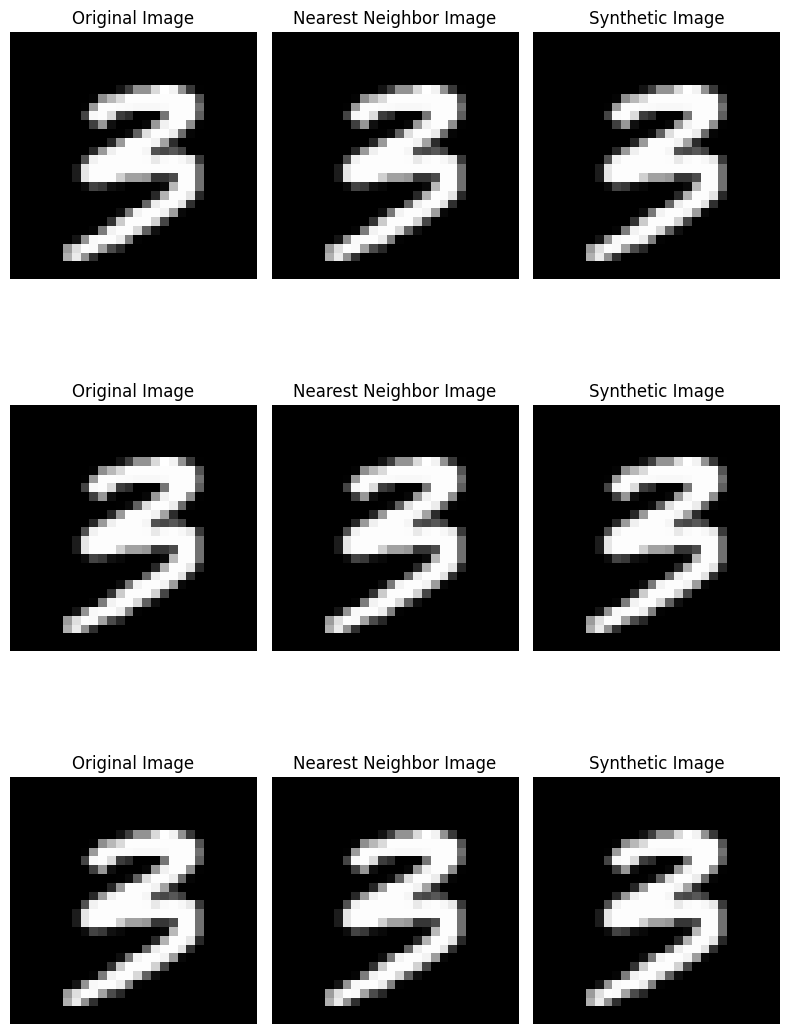

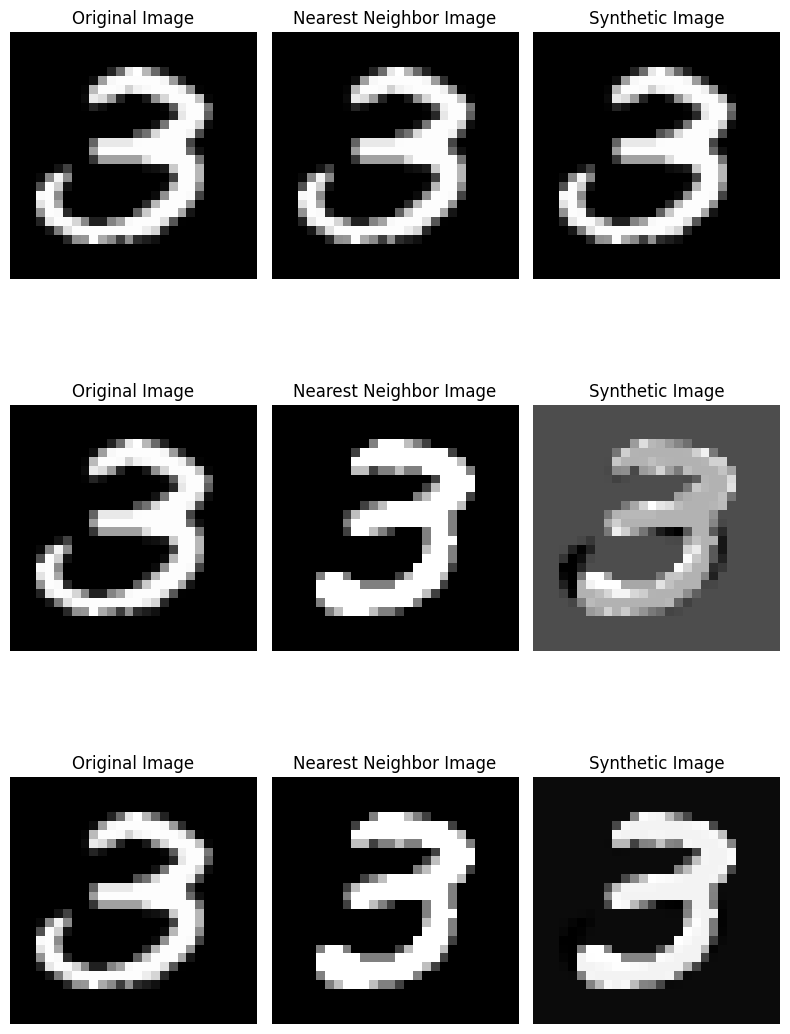

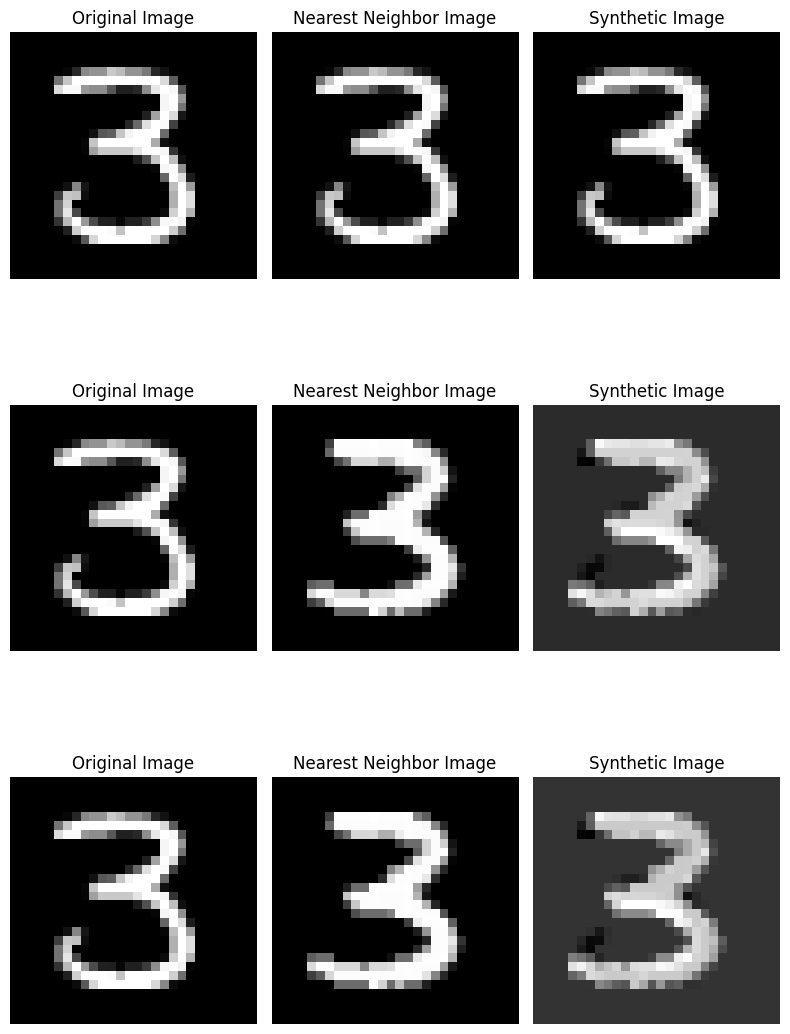

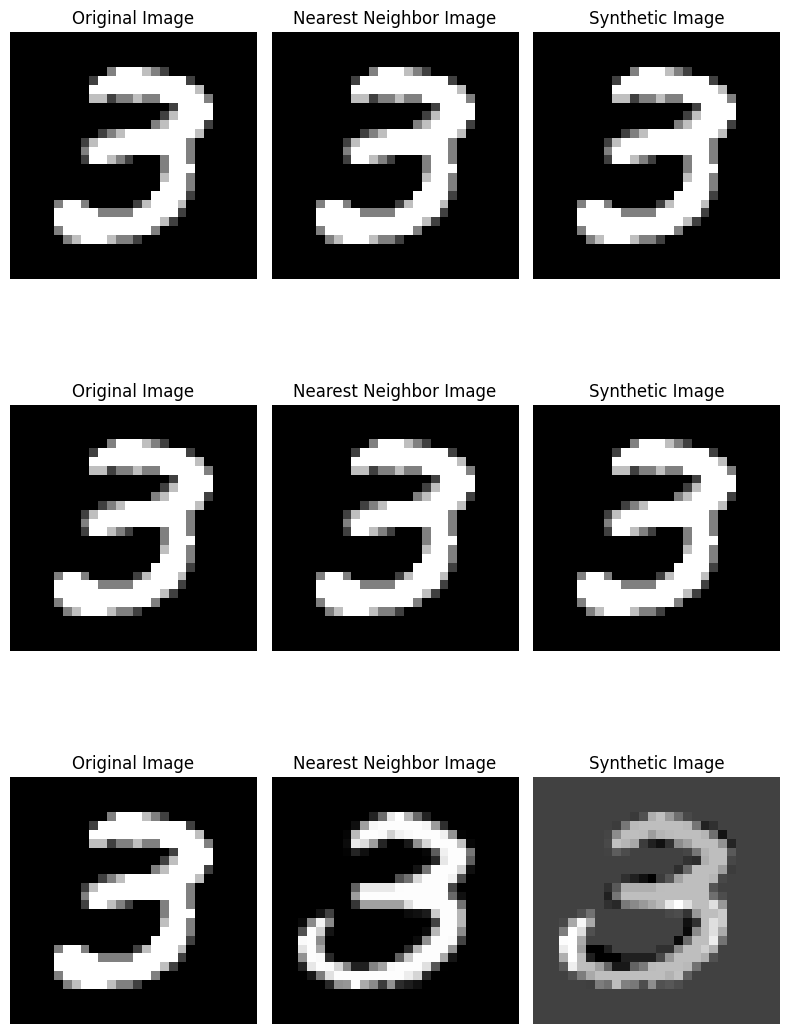

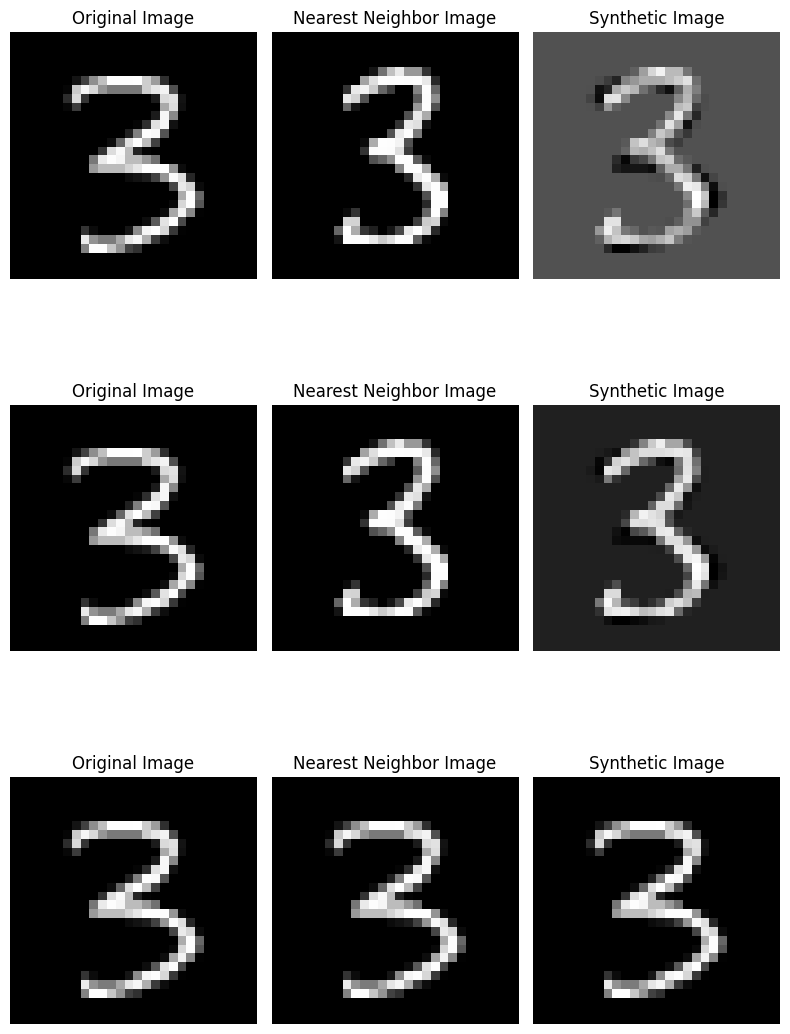

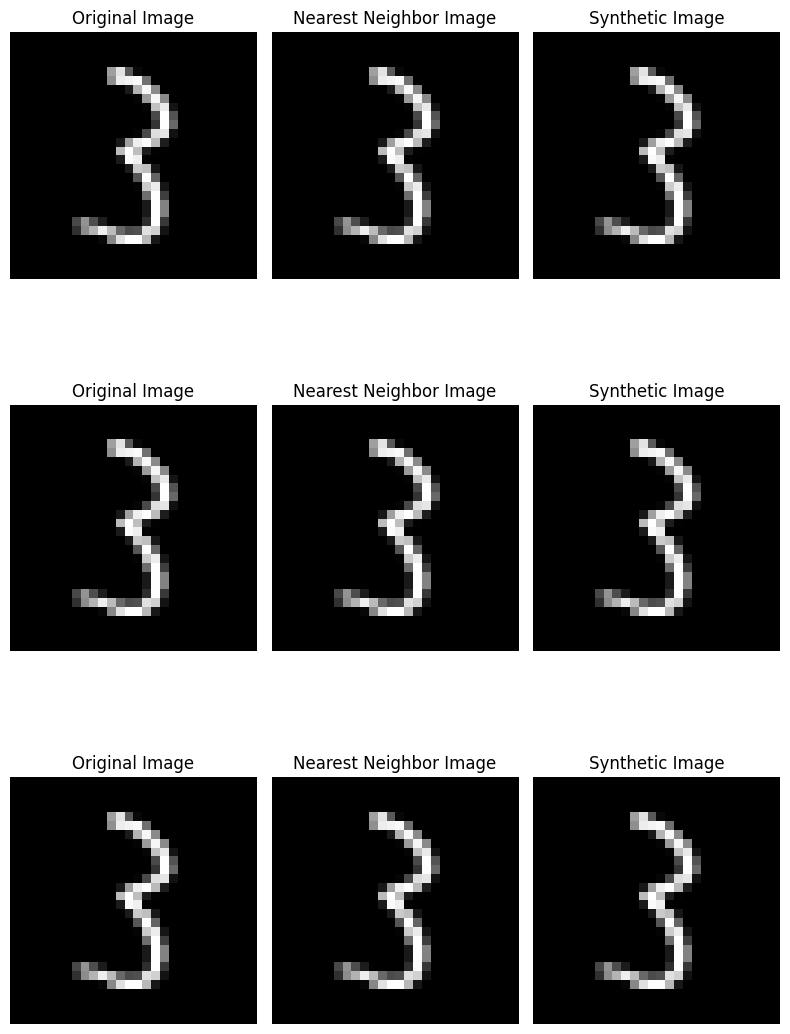

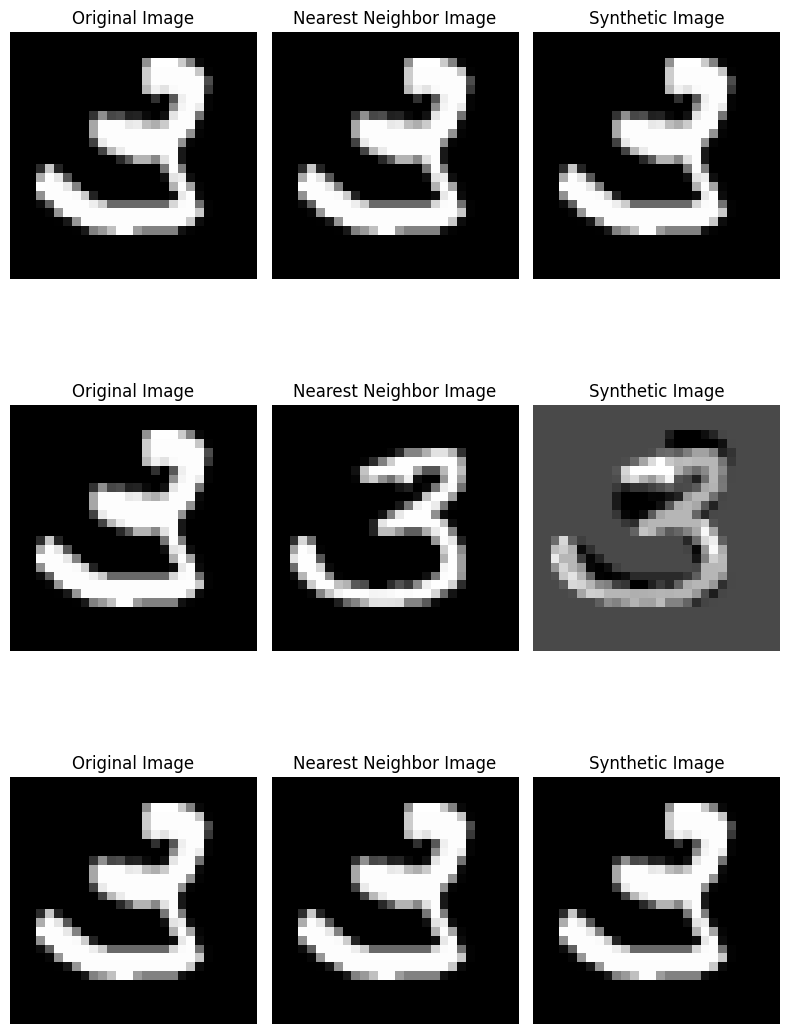

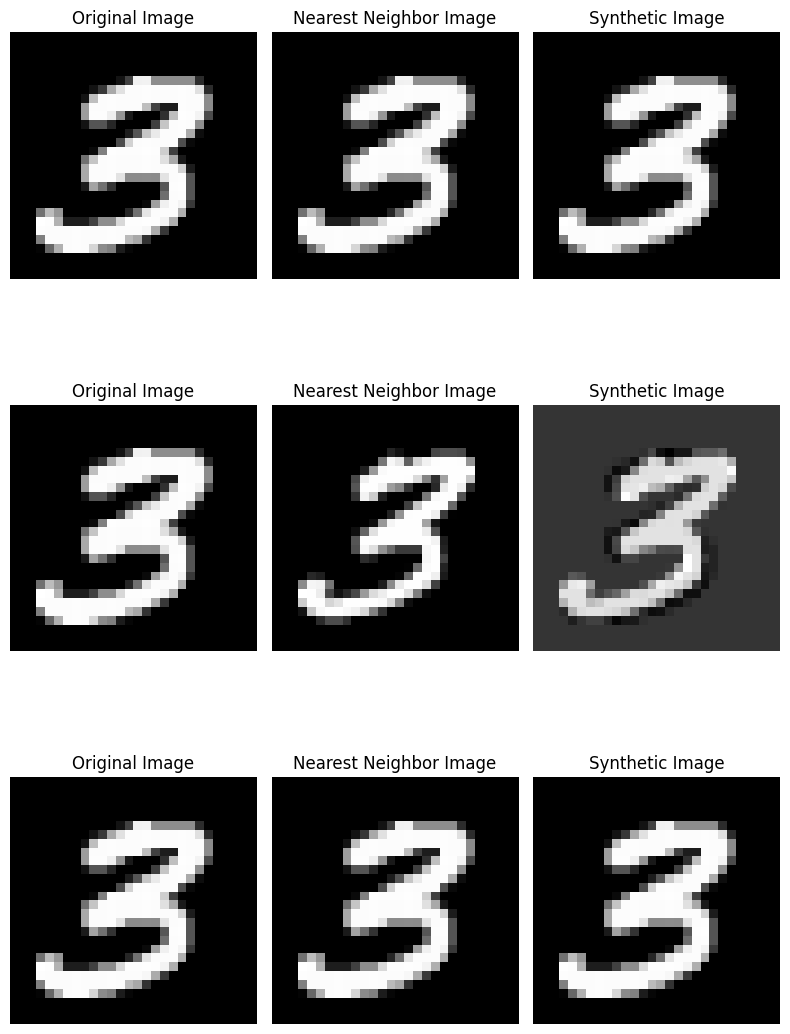

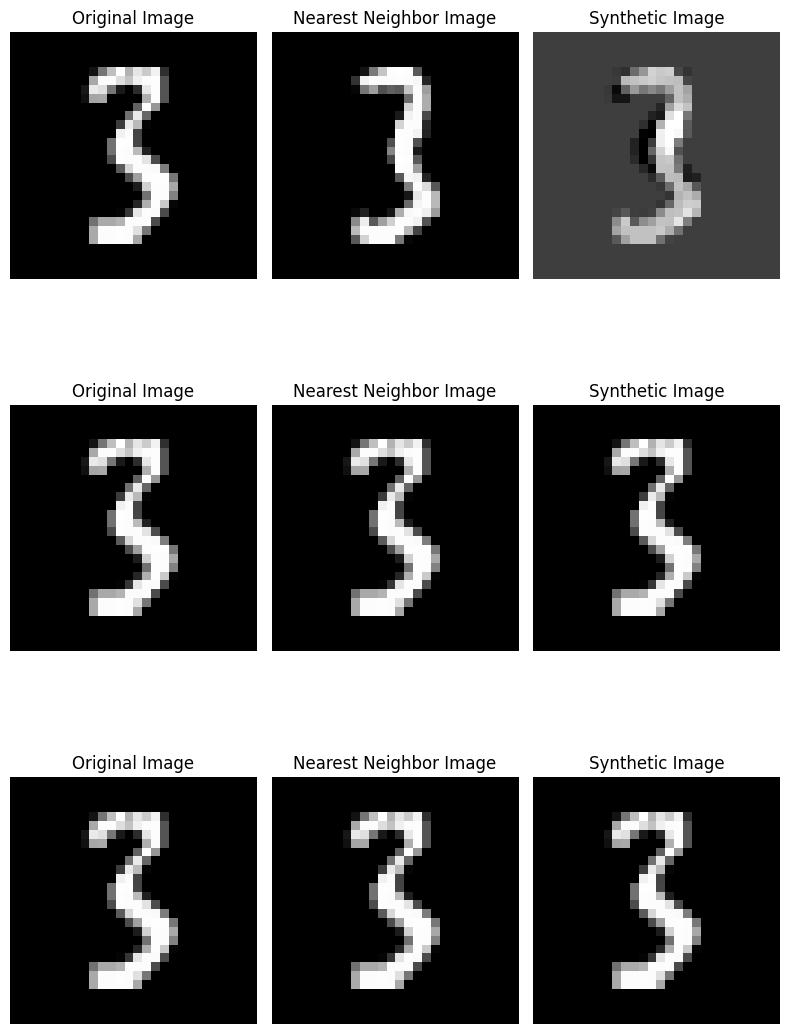

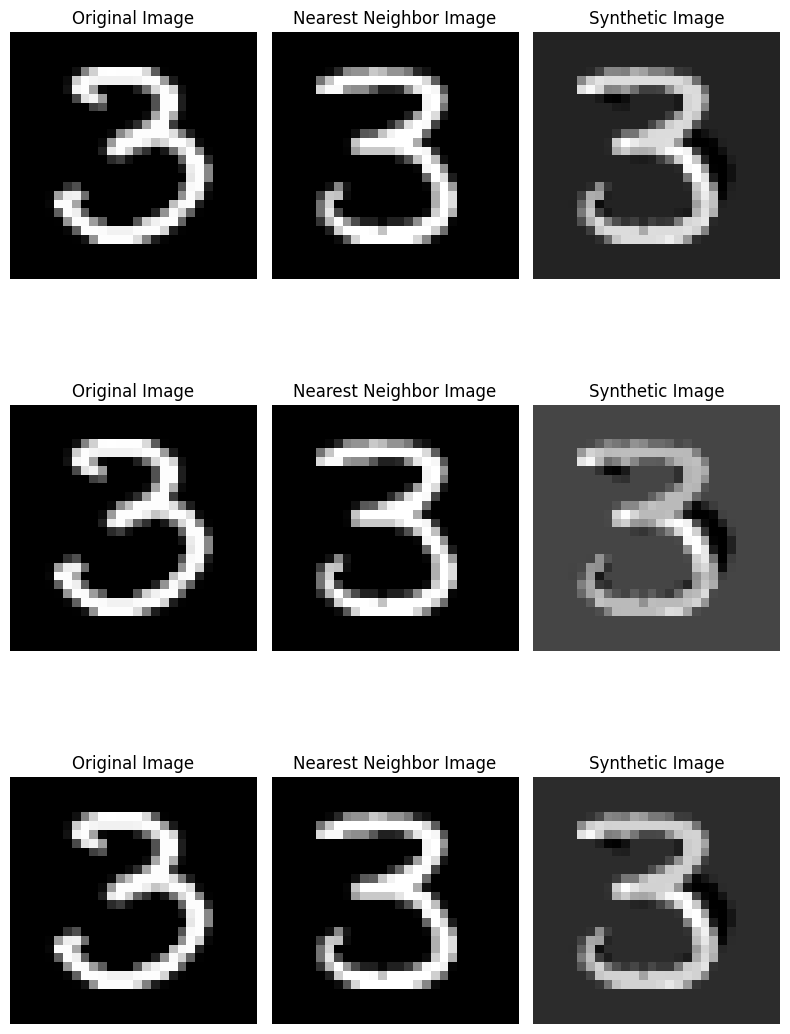

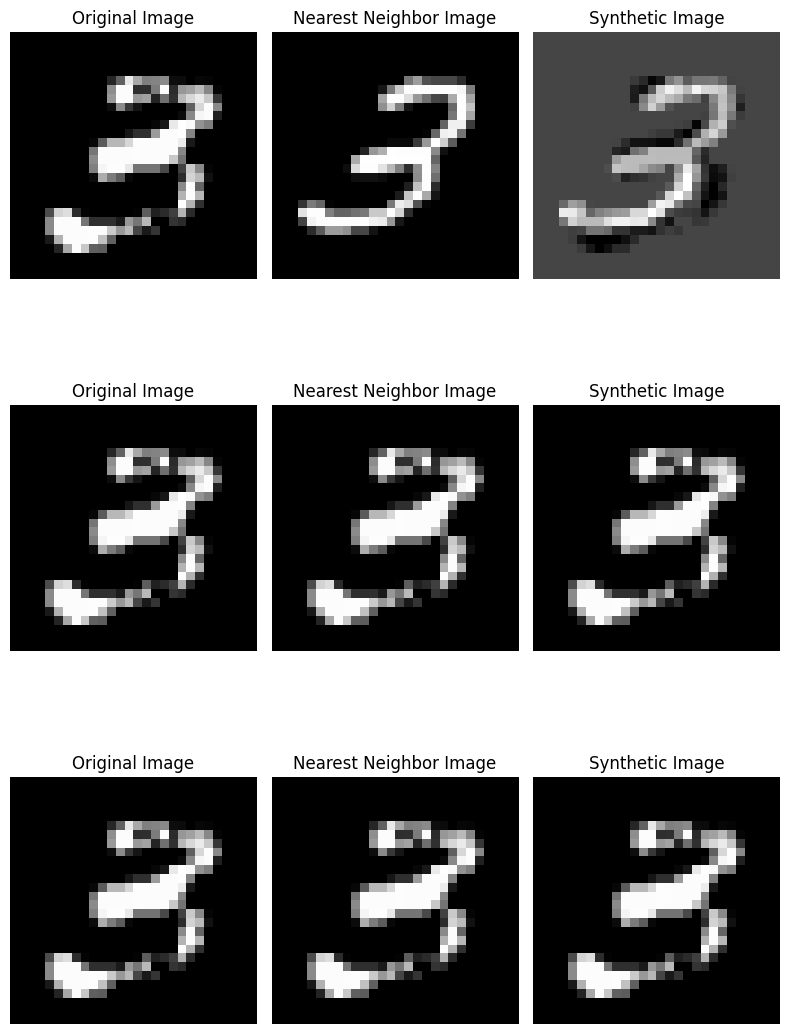

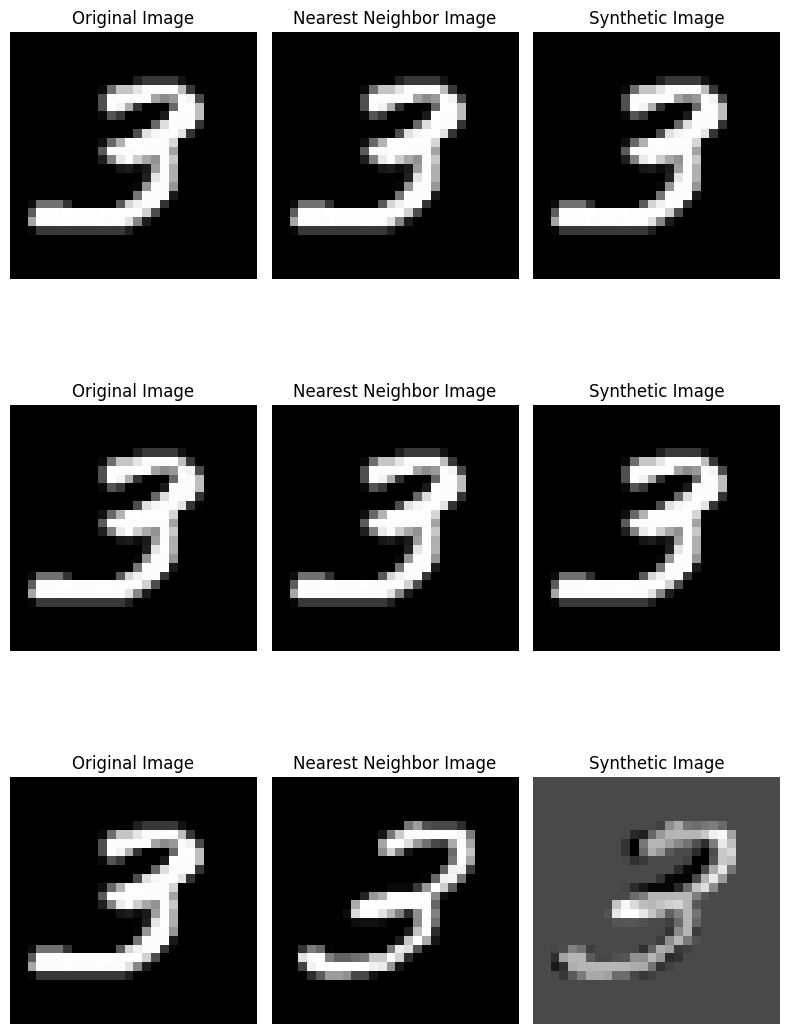

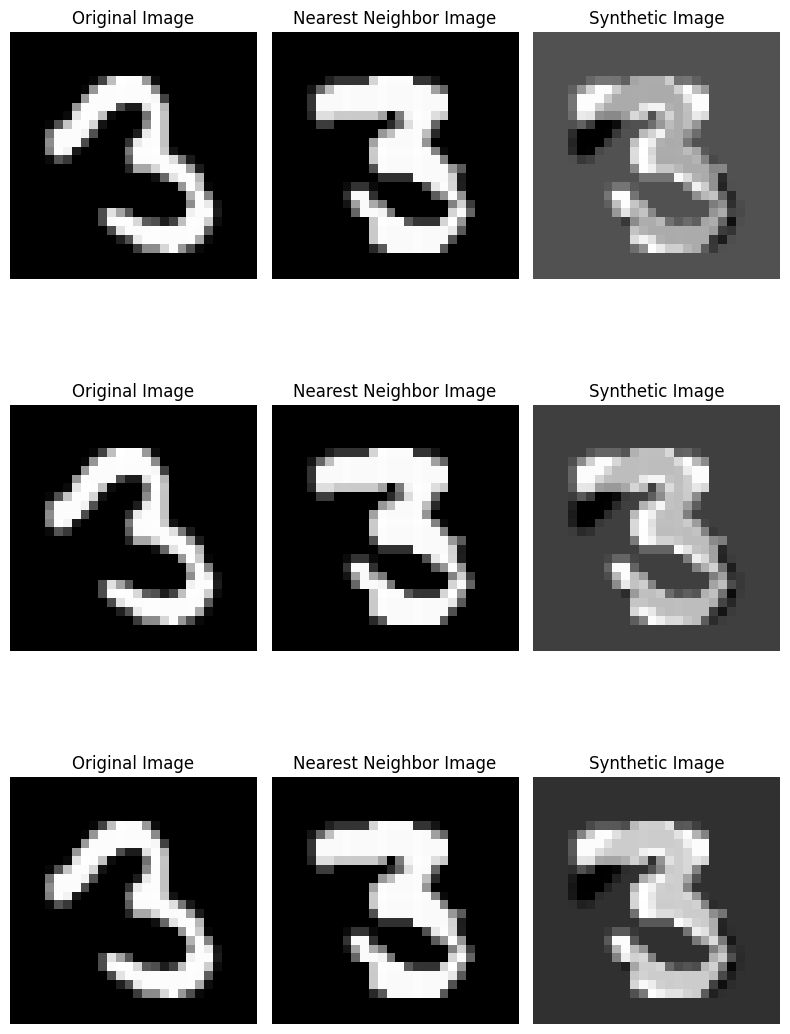

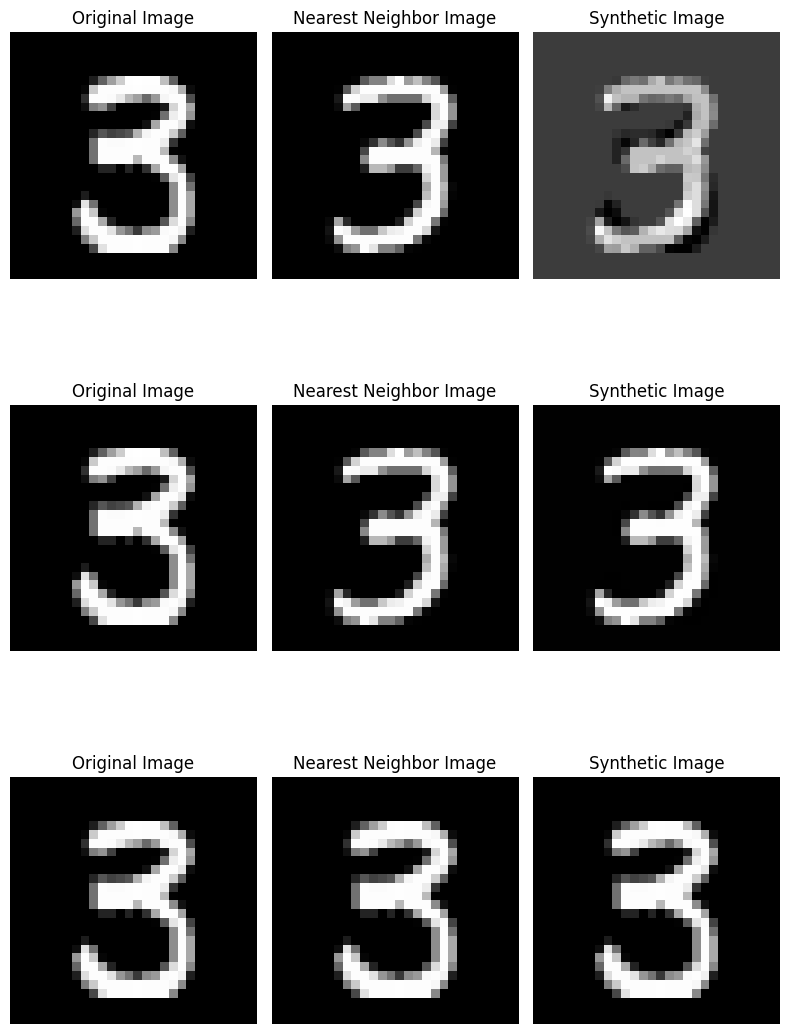

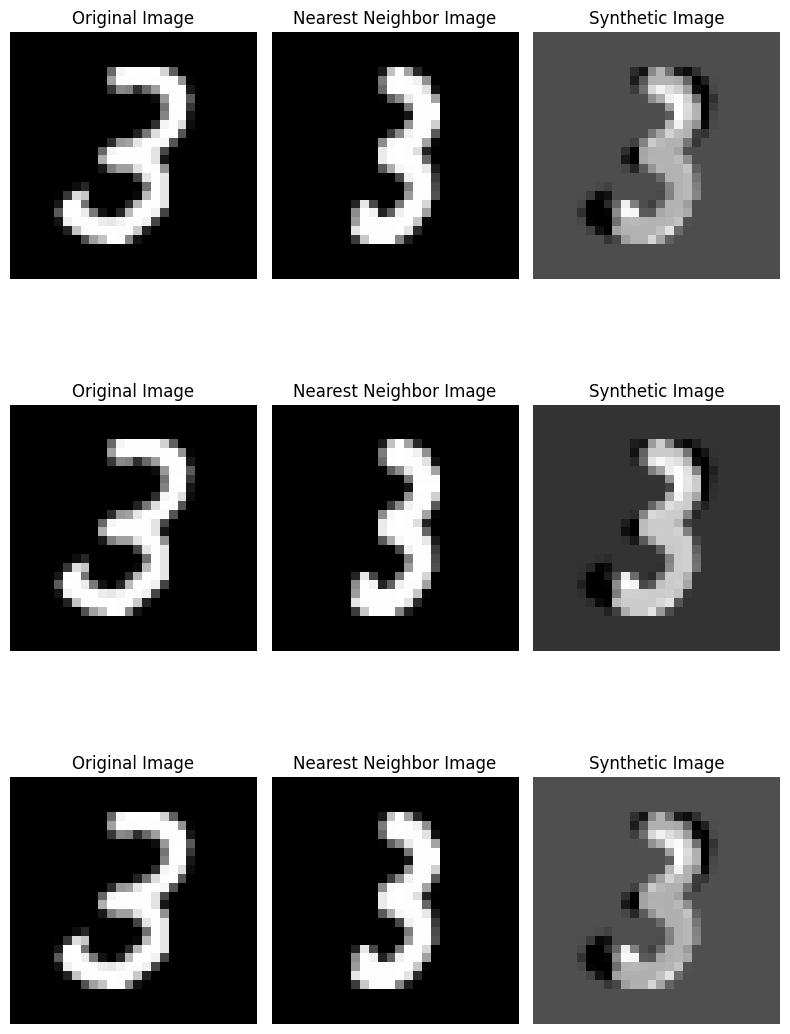

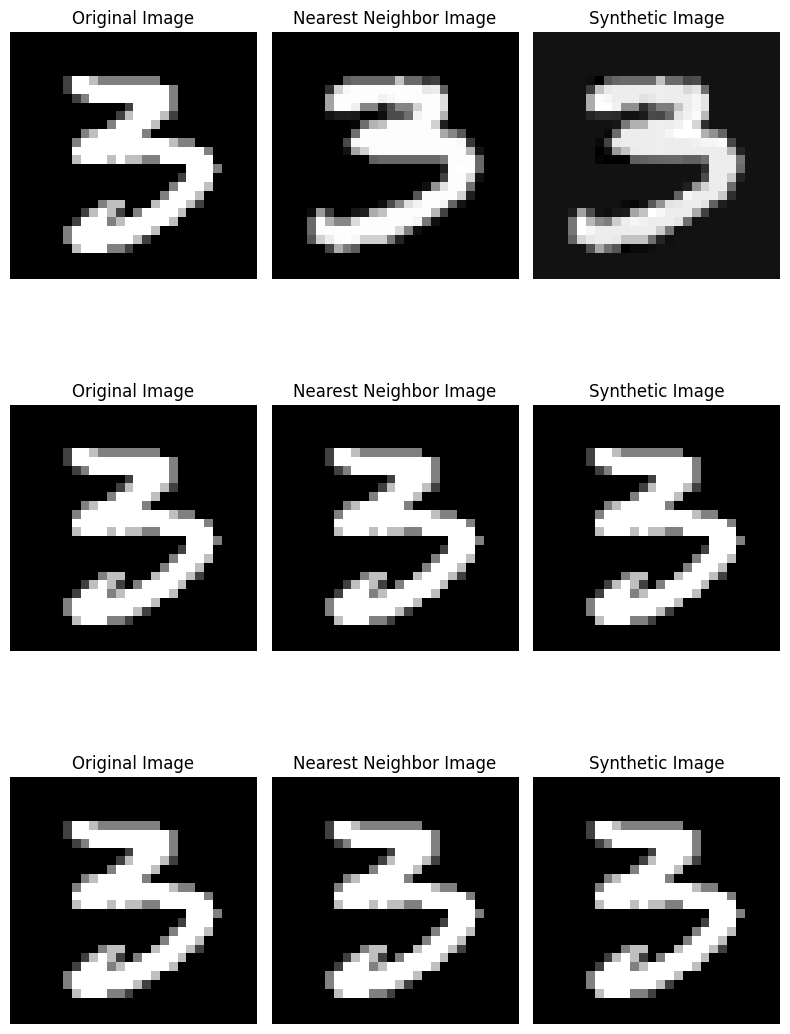

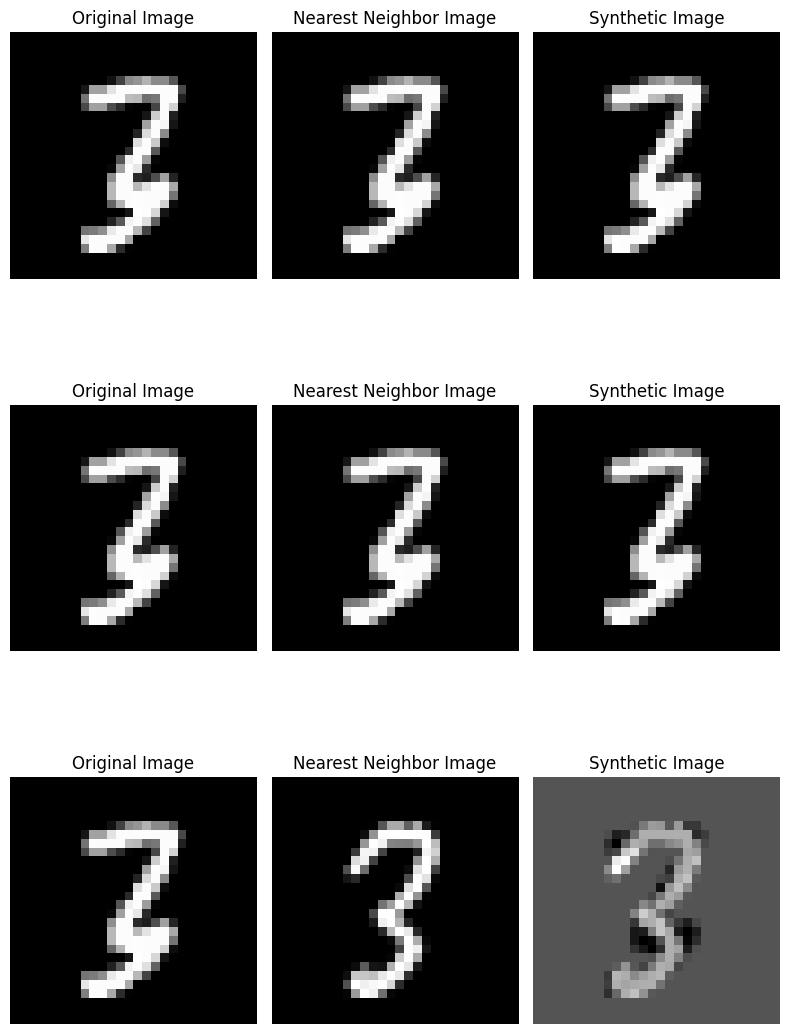

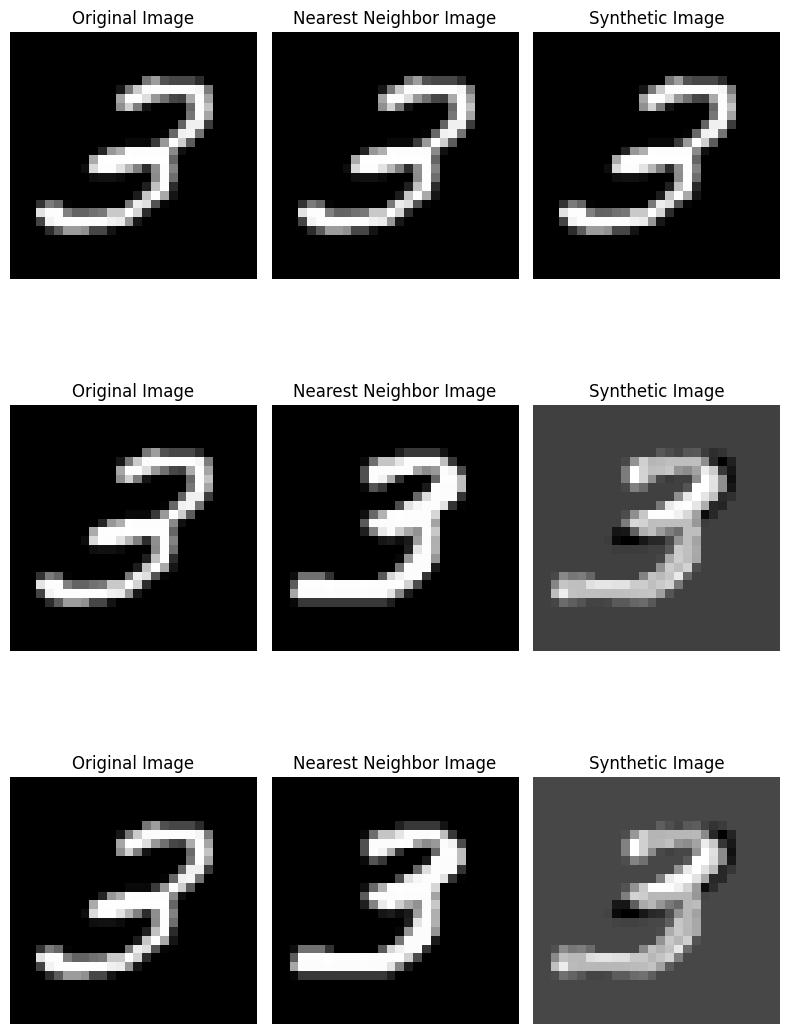

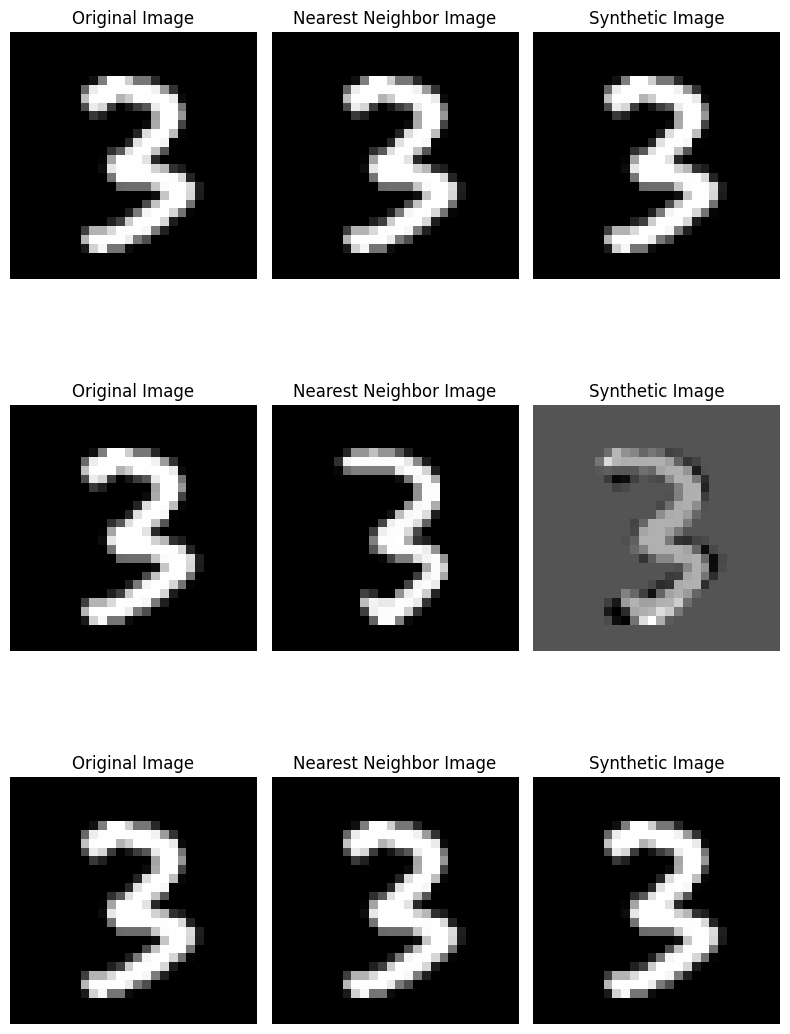

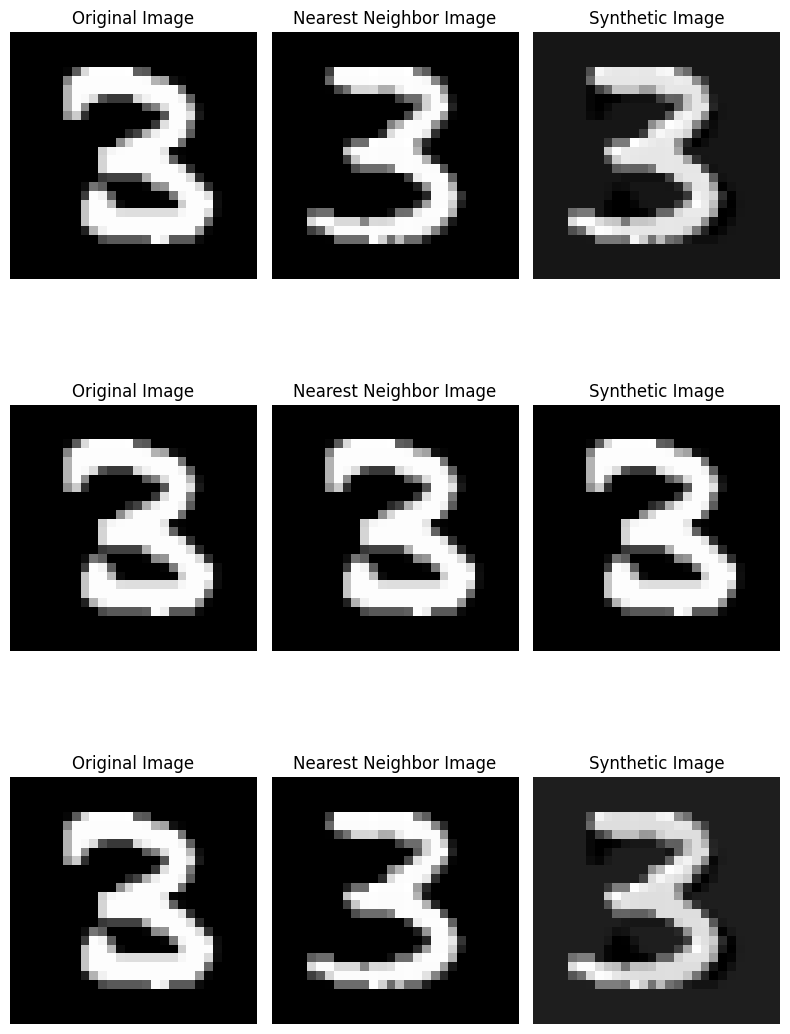

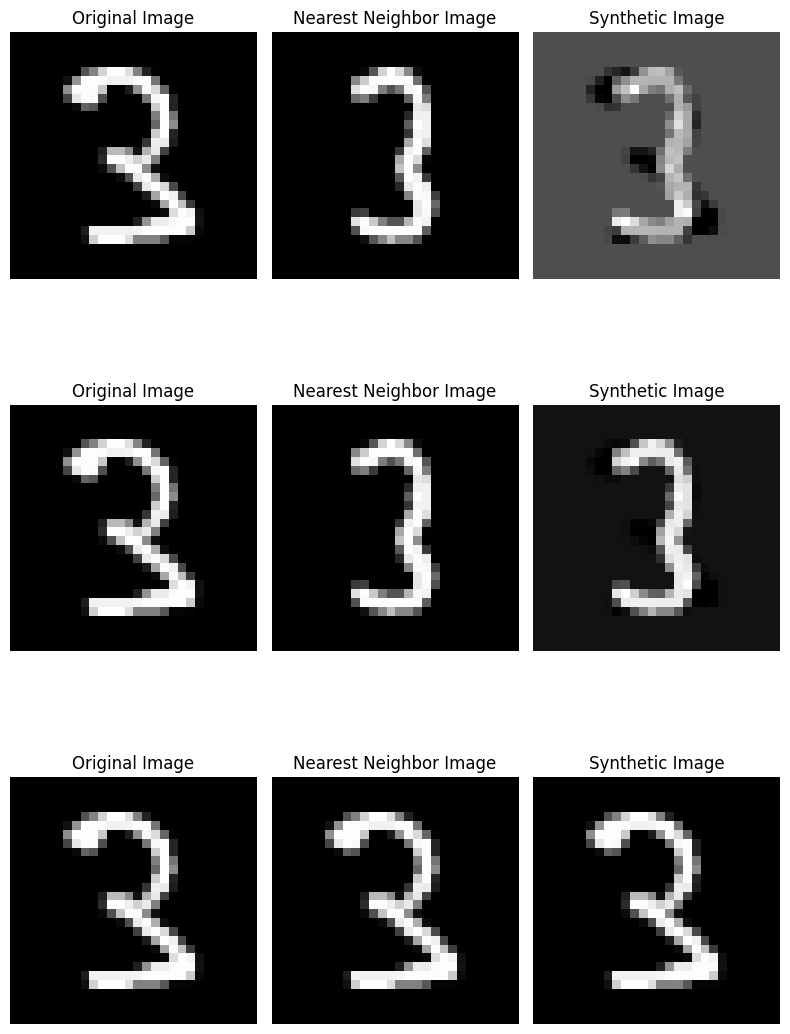

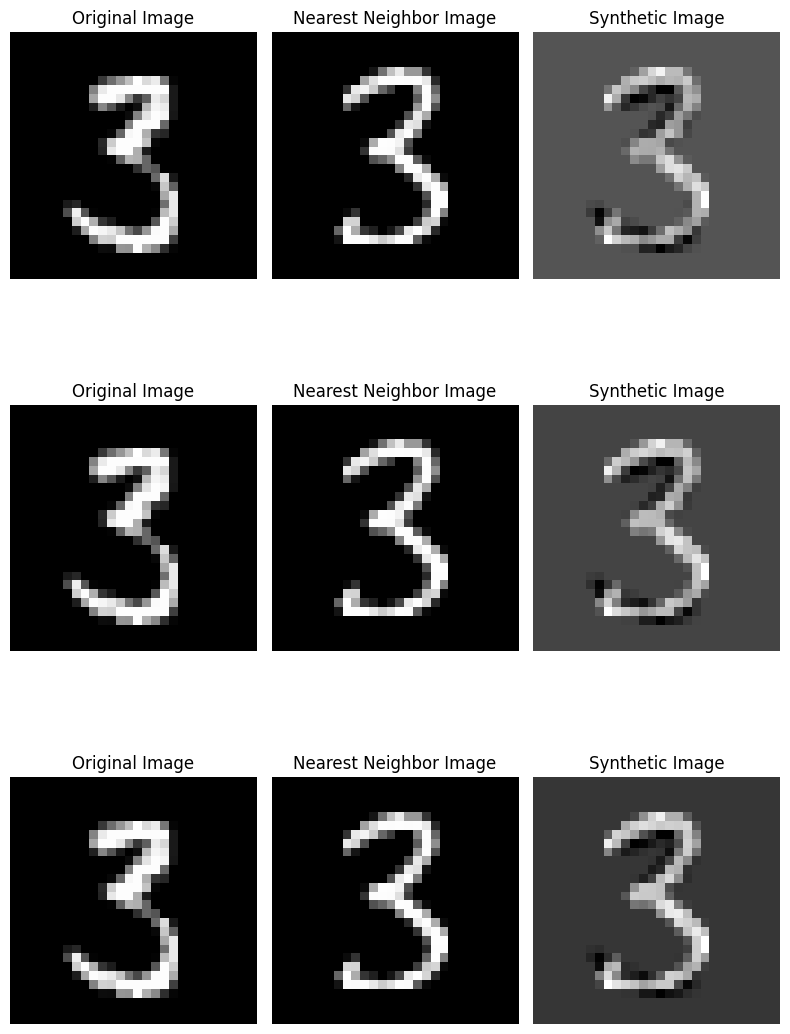

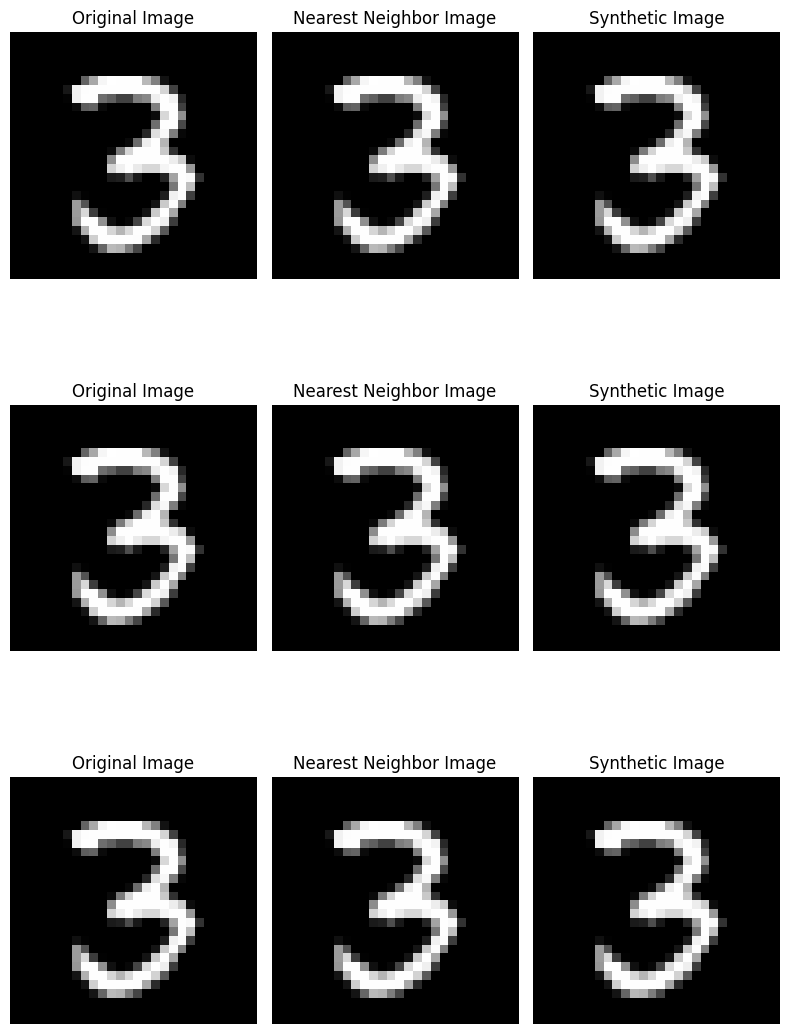

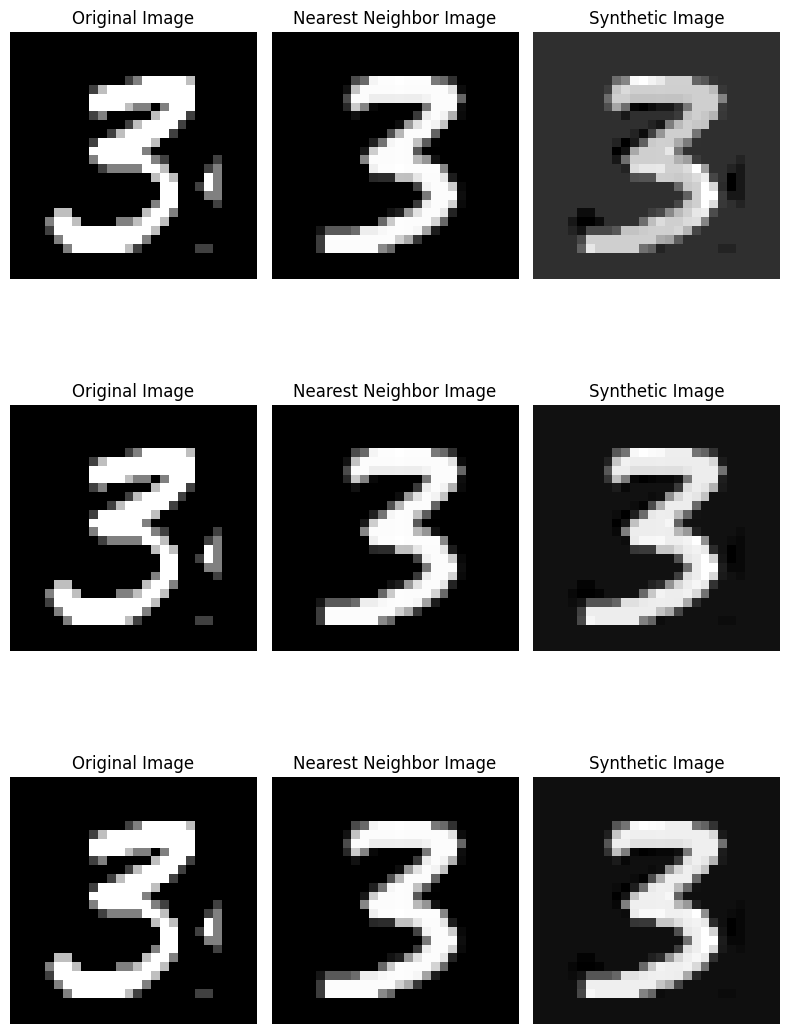

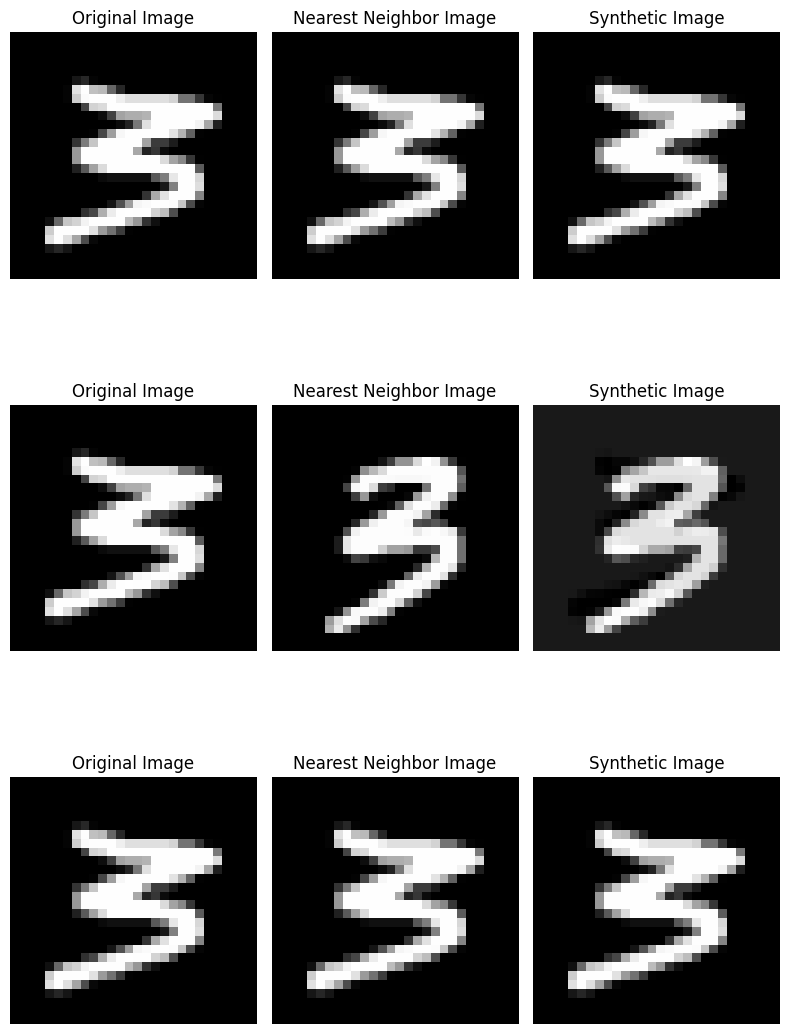

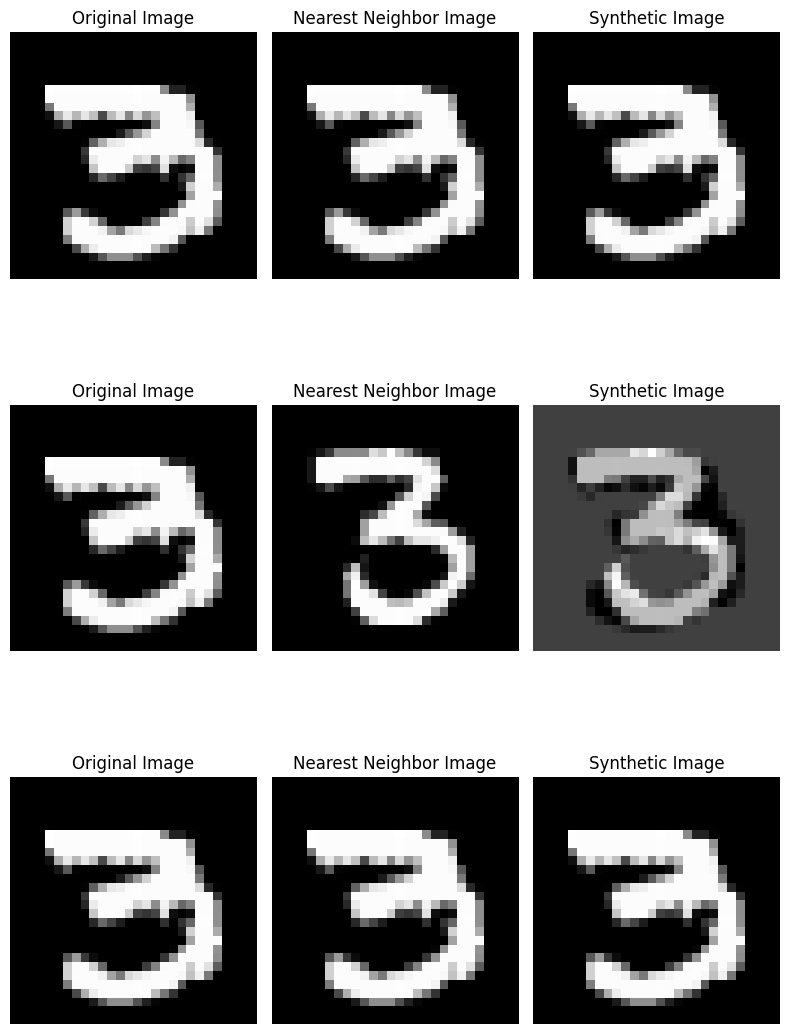

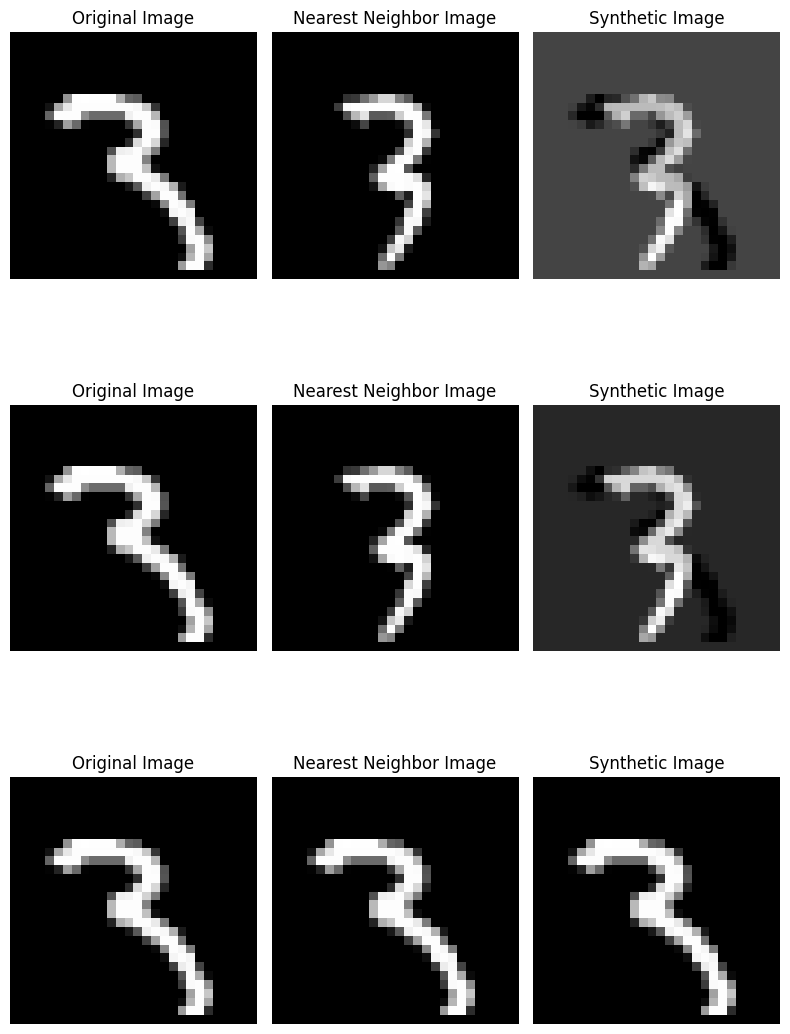

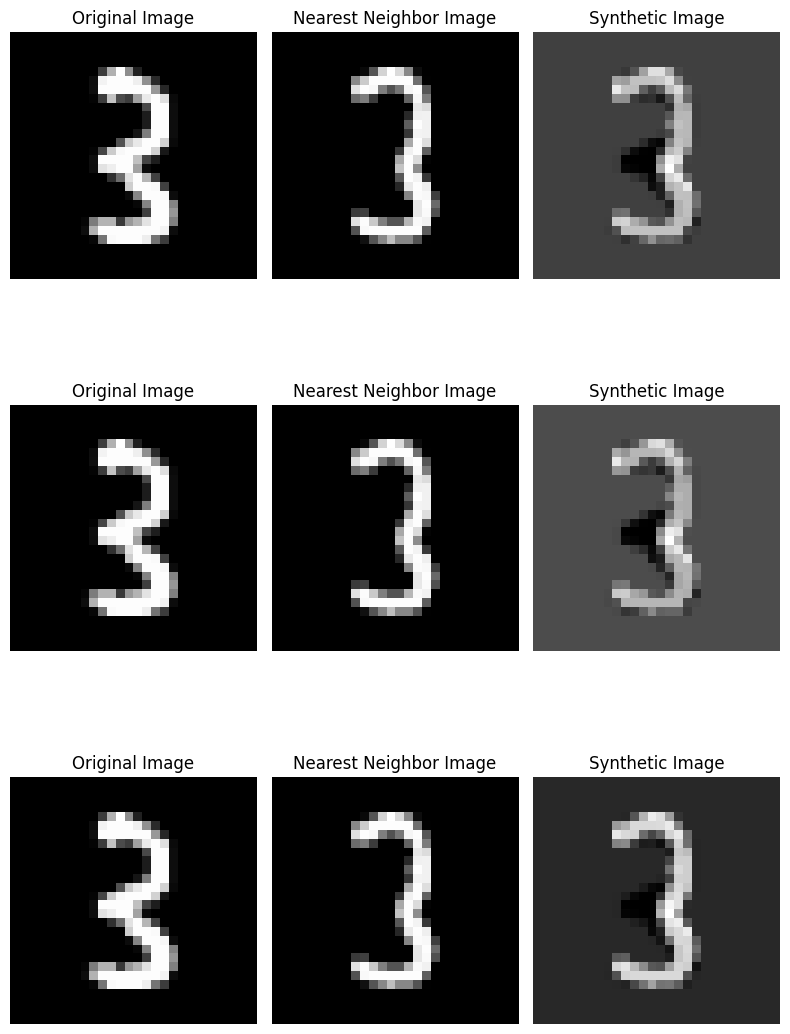

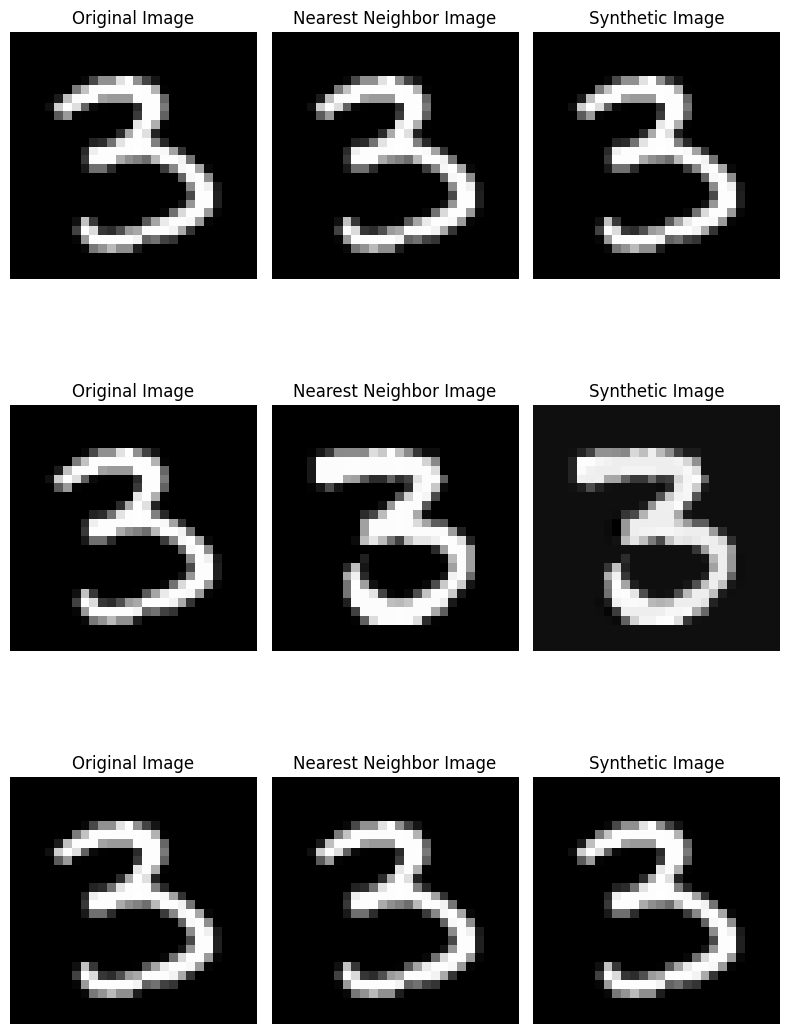

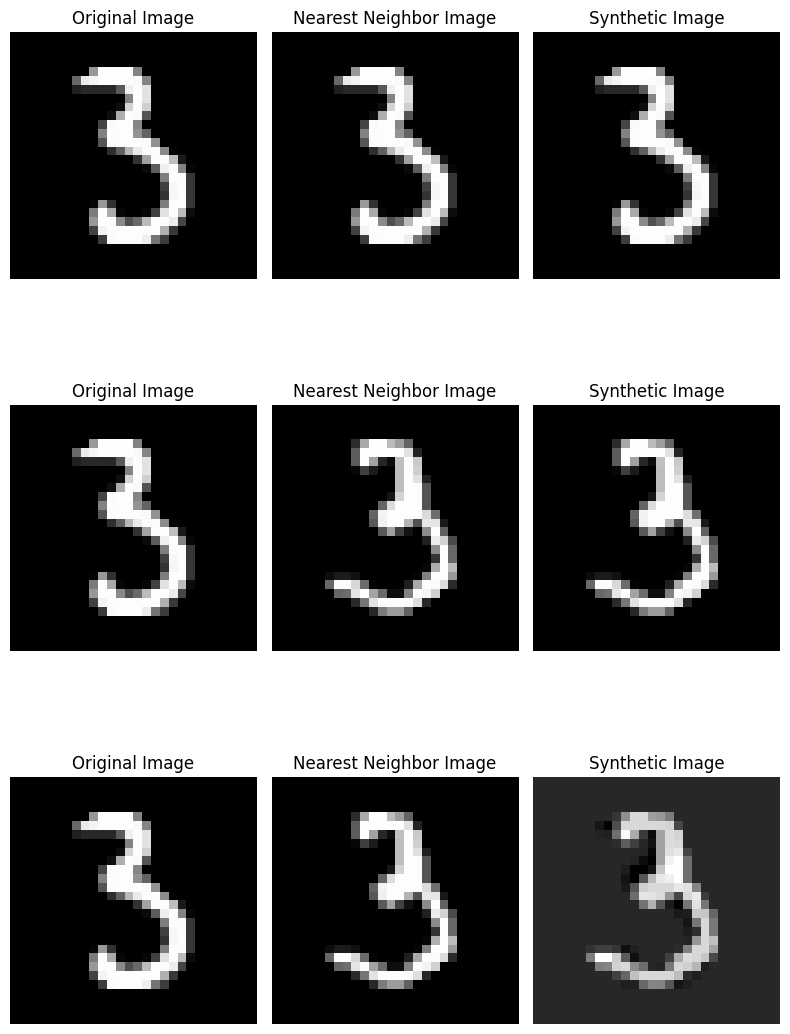

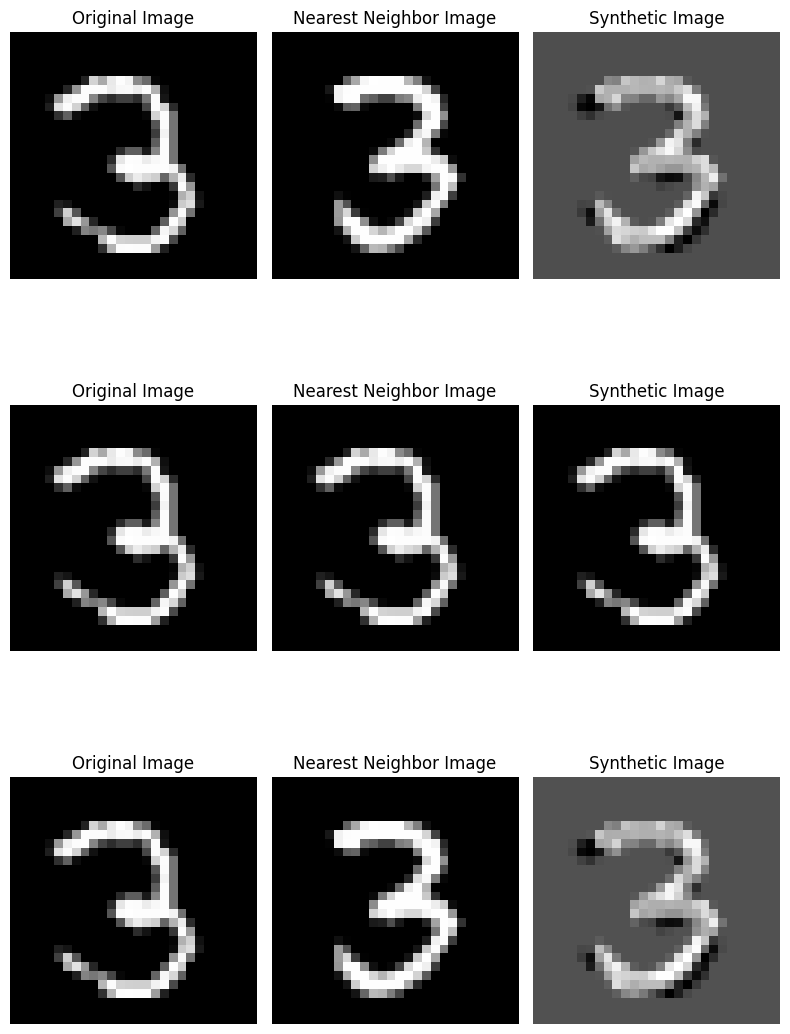

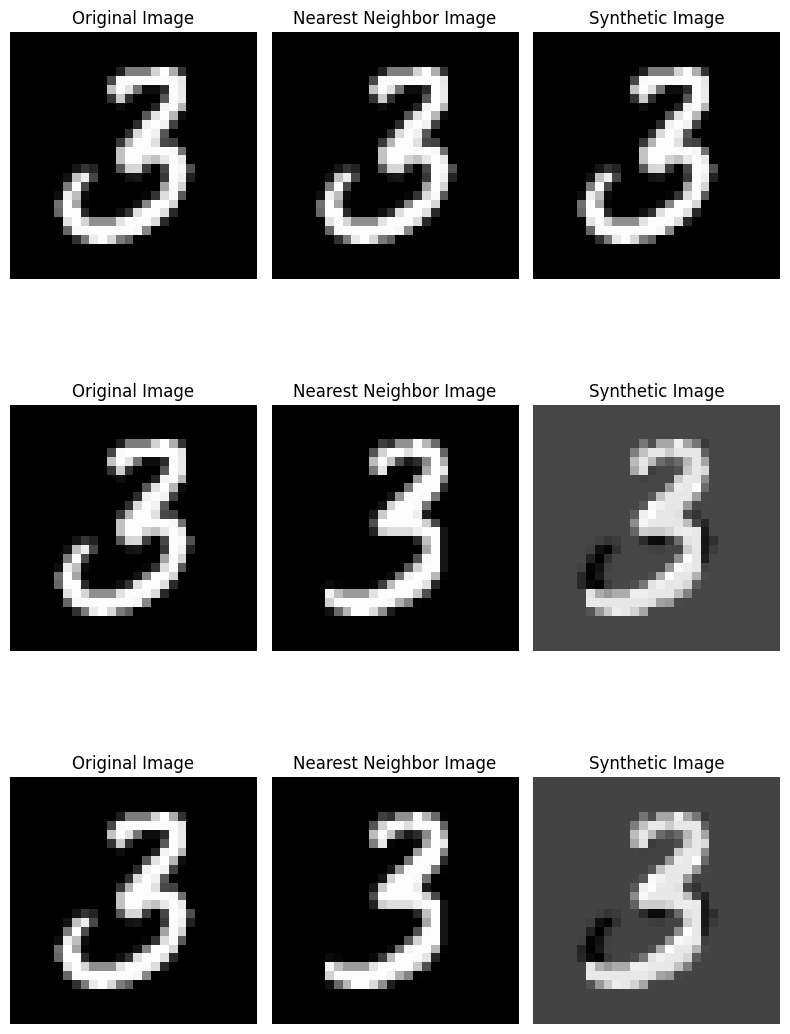

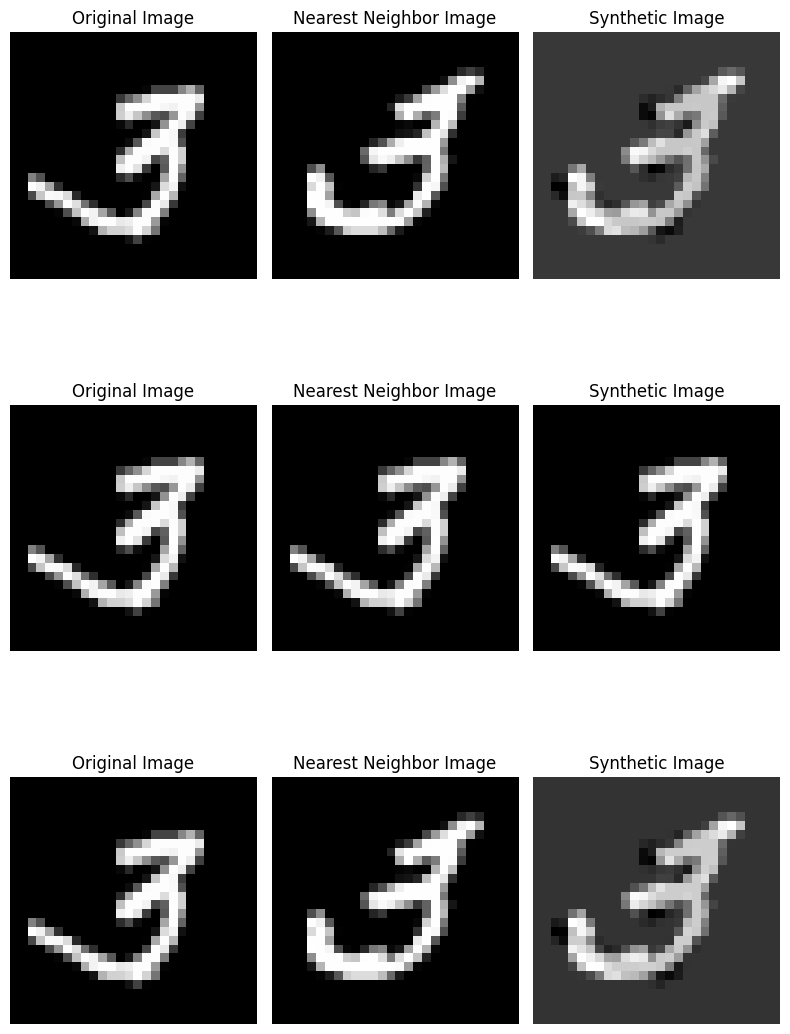

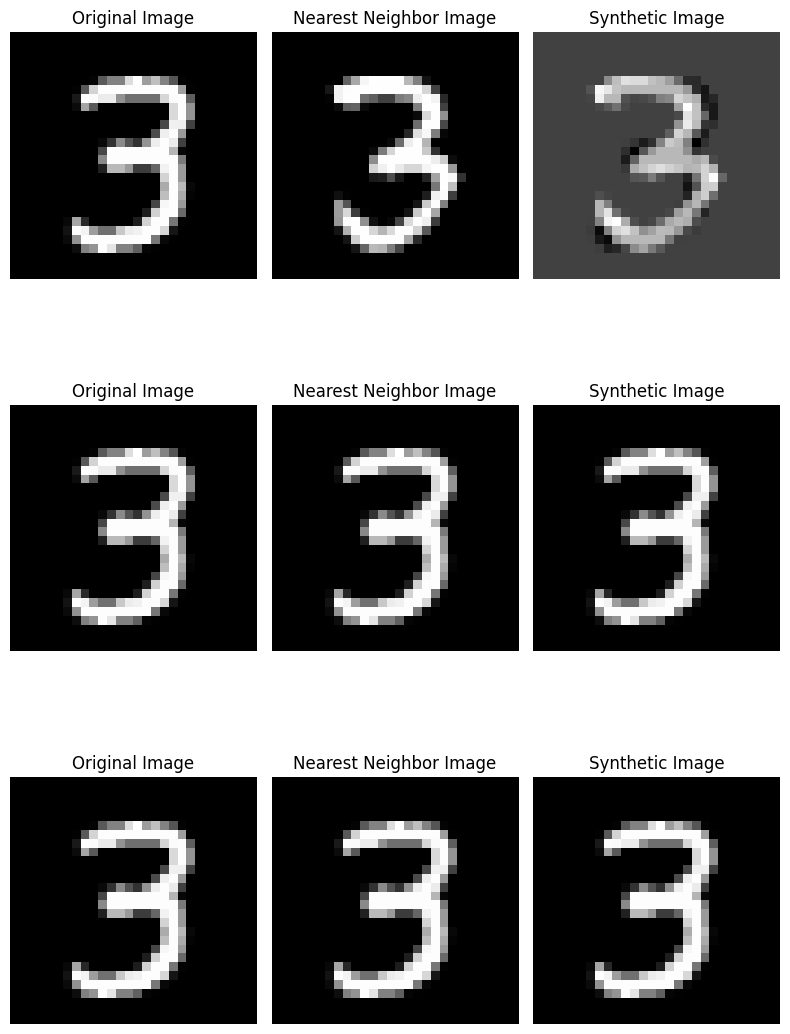

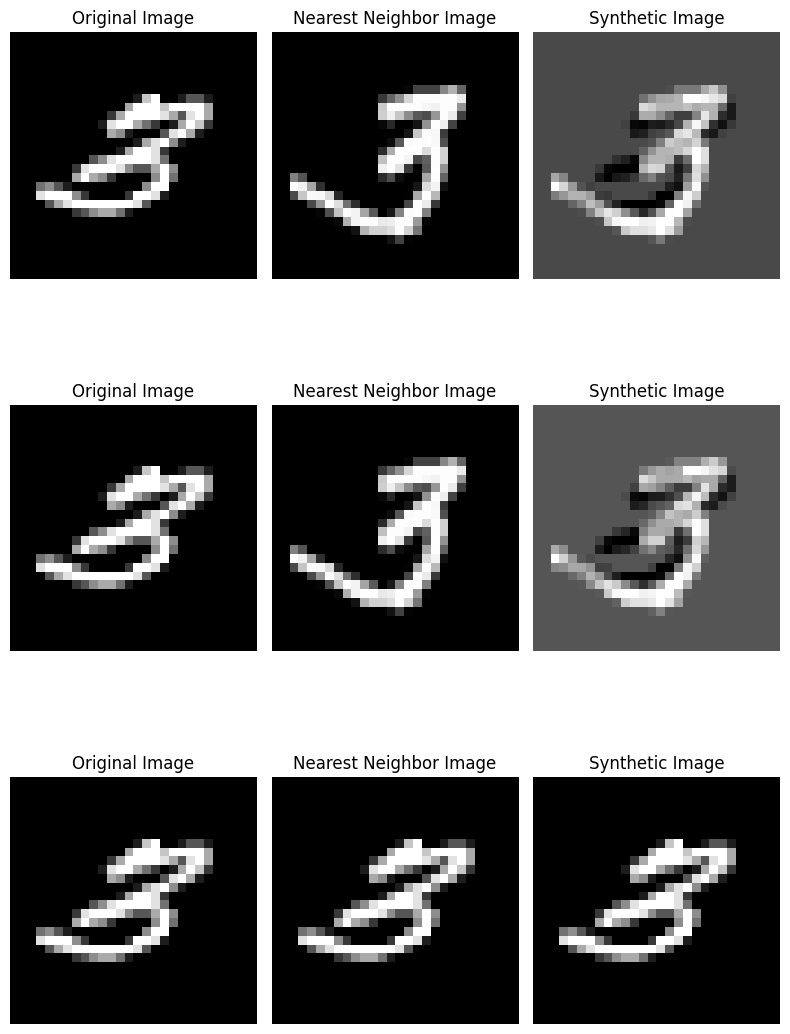

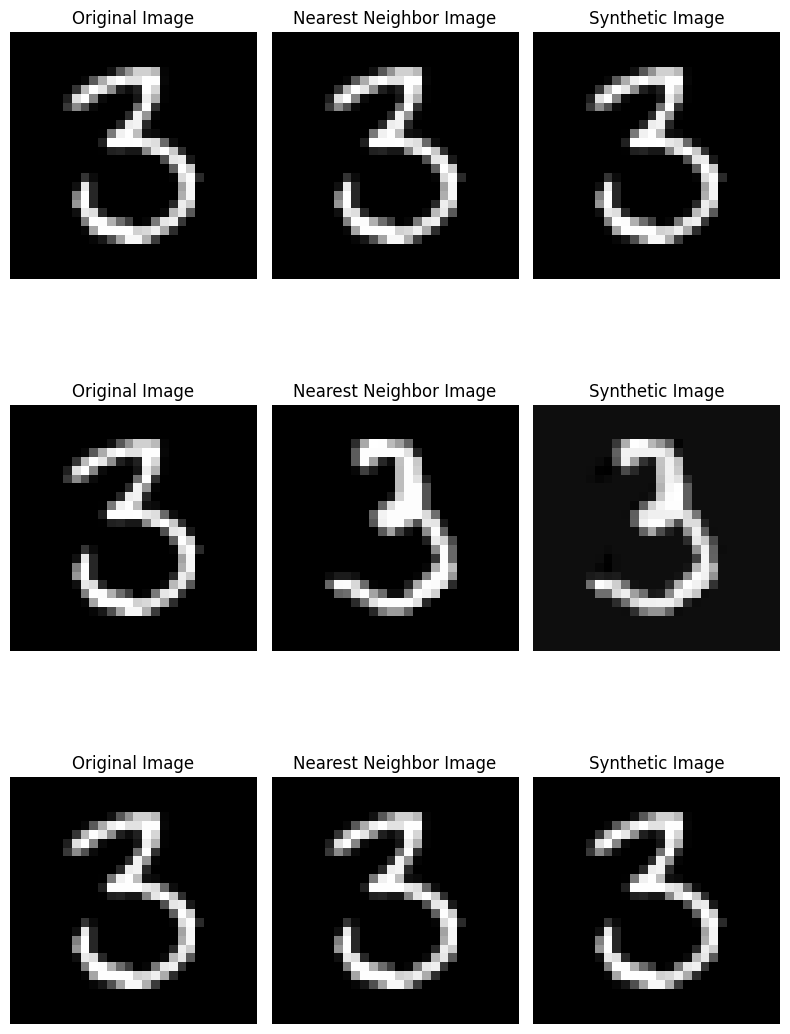

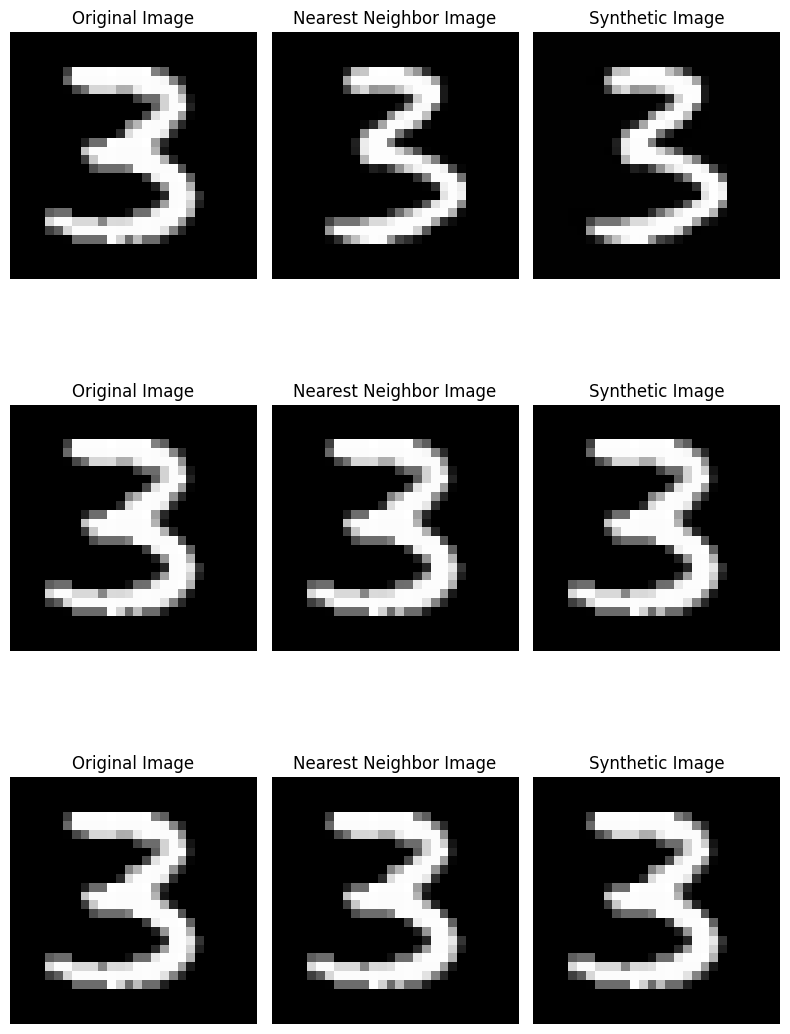

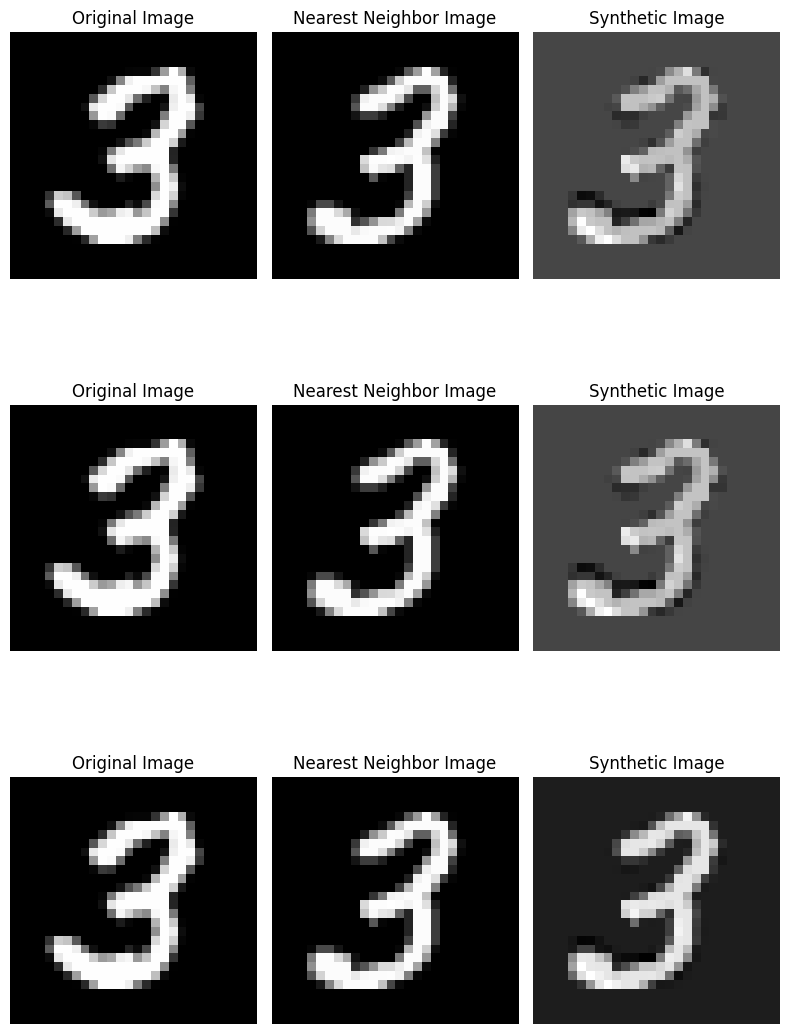

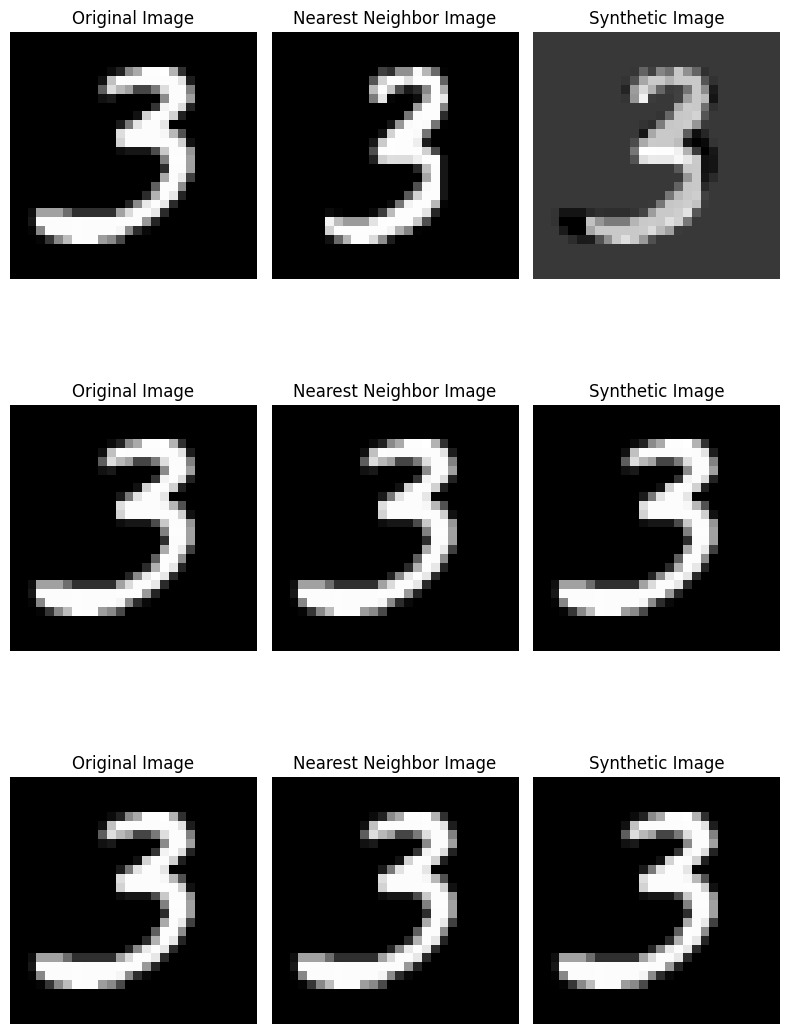

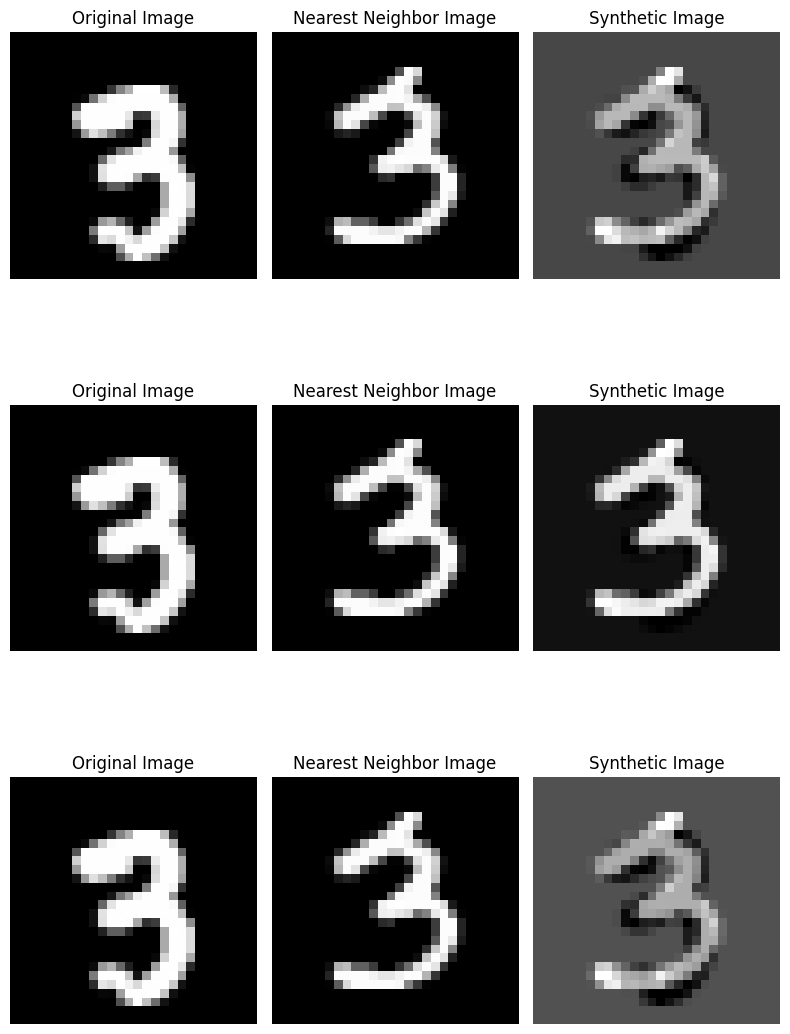

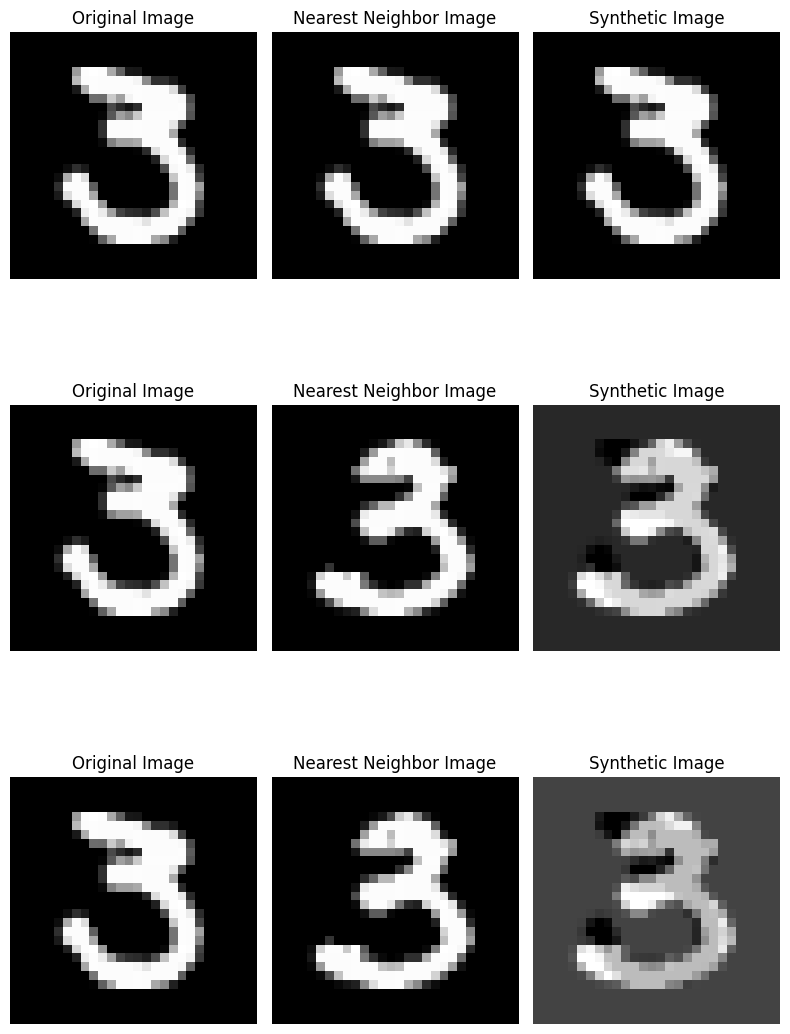

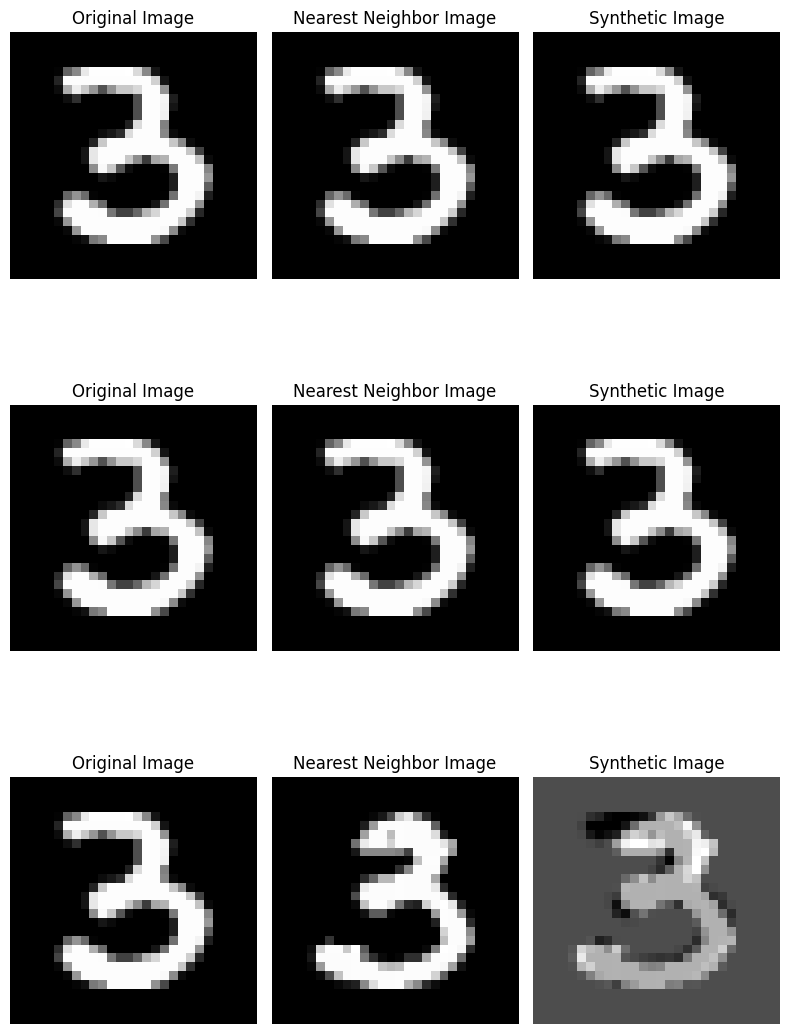

In [83]:

to_be_produced = 3 # Number of synthetic samples to produce for each original sample
k = 2 # Number of nearest neighbors to consider

# converting to numpy array after droping the label
sample = np.array(data_3.drop('label', axis=1))
populate_synthetic_data(sample = sample, k = k,  to_be_produced = to_be_produced)
